In [1]:
import warnings
warnings.filterwarnings('ignore')
from matplotlib import font_manager,rc
rc('font', family='AppleGothic')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [2]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [3]:
data=pd.read_csv("../final_dataset.csv")

In [4]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [5]:
data=data[['year','month','date','emd_nm','em_g','visit_ratio','frgn_ratio','youth_ratio','market_per_cnt','delivery_per_cnt']]

In [6]:
data['year']=data['year'].astype(str)
data['month']=data['month'].astype(str)
data['date']=data['date'].astype(str)
data['base_date']=data['year']+"-"+data['month']+"-"+data['date']
data['base_date']=pd.to_datetime(data['base_date'])

In [7]:
data.drop(['year','month','date'],axis=1,inplace=True)

In [8]:
data['base_date']=pd.to_datetime(data['base_date'])

In [12]:
data.set_index(['base_date'],inplace=True)

In [9]:
data.loc[data['emd_nm']=='일도1동']

,emd_nm,em_g,visit_ratio,frgn_ratio,youth_ratio,market_per_cnt,delivery_per_cnt,base_date
28,일도1동,718950,64.320507,0.038296,0.202727,0.280000,0.037037,2018-01-01
66,일도1동,678450,63.514535,0.039014,0.198005,0.340187,0.009346,2018-01-02
104,일도1동,657850,63.283522,0.042145,0.191258,0.339250,0.019724,2018-01-03
142,일도1동,693850,65.536687,0.042334,0.196583,0.341948,0.019881,2018-01-04
180,일도1동,682950,61.573506,0.032084,0.196884,0.259766,0.009766,2018-01-05
...,...,...,...,...,...,...,...,...
50213,일도1동,150900,60.323332,0.024694,0.196194,0.340395,0.049435,2021-06-14
50255,일도1동,35700,61.881148,0.034339,0.191249,0.224700,0.147513,2021-06-15
50297,일도1동,15650,61.666234,0.032508,0.191939,0.269044,0.081037,2021-06-16
50339,일도1동,26650,60.590933,0.032015,0.197987,0.292576,0.087336,2021-06-17


In [15]:
dates=pd.date_range('2021-07-01',periods=len(fore[0]))

In [16]:
dates

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04',
               '2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08',
               '2021-07-09', '2021-07-10', '2021-07-11', '2021-07-12',
               '2021-07-13', '2021-07-14', '2021-07-15', '2021-07-16',
               '2021-07-17', '2021-07-18', '2021-07-19', '2021-07-20',
               '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-24',
               '2021-07-25', '2021-07-26', '2021-07-27', '2021-07-28',
               '2021-07-29', '2021-07-30', '2021-07-31', '2021-08-01',
               '2021-08-02', '2021-08-03', '2021-08-04', '2021-08-05',
               '2021-08-06', '2021-08-07', '2021-08-08', '2021-08-09',
               '2021-08-10', '2021-08-11', '2021-08-12', '2021-08-13',
               '2021-08-14', '2021-08-15', '2021-08-16', '2021-08-17',
               '2021-08-18', '2021-08-19', '2021-08-20', '2021-08-21',
               '2021-08-22', '2021-08-23', '2021-08-24', '2021-08-25',
      

# visit ratio 예측 

In [17]:
test_df=pd.DataFrame(columns=['emd_nm'])

In [18]:
for region in data['emd_nm'].unique():
    data_visit = data.loc[data['emd_nm']==region,['visit_ratio']]
    data_visit = data_visit.astype('float32')
    
    model=ARIMA(data_visit,order=(2,1,2))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['visit_ratio_pred'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['visit_ratio_pred'],index=pd.date_range('2021-07-01',periods=len(fore[0])))

    forecast['emd_nm']=region
    test_df=pd.concat([test_df,forecast])    

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.95081D+00    |proj g|=  6.03155D-03

At iterate    1    f=  1.95081D+00    |proj g|=  1.65388D-03

At iterate    2    f=  1.95081D+00    |proj g|=  1.17313D-03

At iterate    3    f=  1.95080D+00    |proj g|=  1.70524D-03

At iterate    4    f=  1.95080D+00    |proj g|=  4.00031D-03

At iterate    5    f=  1.95079D+00    |proj g|=  5.28806D-03

At iterate    6    f=  1.95078D+00    |proj g|=  5.04938D-03

At iterate    7    f=  1.95075D+00    |proj g|=  7.74634D-03

At iterate    8    f=  1.95073D+00    |proj g|=  1.71905D-03

At iterate    9    f=  1.95073D+00    |proj g|=  4.54614D-04

At iterate   10    f=  1.95073D+00    |proj g|=  4.06097D-04

At iterate   11    f=  1.95073D+00    |proj g|=  4.83391D-04

At iterate   12    f=  1.95073D+00    |proj g|=  6.91647D-04

At iterate   13    f=  1.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    9    f=  2.47521D+00    |proj g|=  1.01341D-04

At iterate   10    f=  2.47521D+00    |proj g|=  1.02052D-04

At iterate   11    f=  2.47521D+00    |proj g|=  1.81544D-04

At iterate   12    f=  2.47521D+00    |proj g|=  2.00018D-04

At iterate   13    f=  2.47521D+00    |proj g|=  9.53015D-05

At iterate   14    f=  2.47521D+00    |proj g|=  2.22933D-05

At iterate   15    f=  2.47521D+00    |proj g|=  2.57572D-06

At iterate   16    f=  2.47521D+00    |proj g|=  1.77636D-07

At iterate   17    f=  2.47521D+00    |proj g|=  8.88178D-08

At iterate   18    f=  2.47521D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.78968D+00    |proj g|=  2.15232D-03

At iterate    1    f=  1.78968D+00    |proj g|=  2.14604D-03

At iterate    2    f=  1.78968D+00    |proj g|=  4.95293D-04

At iterate    3    f=  1.78968D+00    |proj g|=  4.81326D-04

At iterate    4    f=  1.78967D+00    |proj g|=  1.75702D-03

At iterate    5    f=  1.78967D+00    |proj g|=  2.55707D-03

At iterate    6    f=  1.78967D+00    |proj g|=  2.18685D-03

At iterate    7    f=  1.78967D+00    |proj g|=  1.71365D-03

At iterate    8    f=  1.78966D+00    |proj g|=  8.46656D-04

At iterate    9    f=  1.78966D+00    |proj g|=  1.17386D-03

At iterate   10    f=  1.78965D+00    |proj g|=  2.10254D-03

At iterate   11    f=  1.78964D+00    |proj g|=  2.74729D-03

At iterate   12    f=  1.78962D+00    |proj g|=  3.46398D-03

At iterate   13    f=  1.7

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate    1    f=  1.98344D+00    |proj g|=  9.19109D-04

At iterate    2    f=  1.98343D+00    |proj g|=  2.78286D-03

At iterate    3    f=  1.98342D+00    |proj g|=  4.71925D-03

At iterate    4    f=  1.98340D+00    |proj g|=  6.90632D-03

At iterate    5    f=  1.98337D+00    |proj g|=  7.58282D-03

At iterate    6    f=  1.98335D+00    |proj g|=  4.40767D-03

At iterate    7    f=  1.98334D+00    |proj g|=  2.45821D-03

At iterate    8    f=  1.98333D+00    |proj g|=  3.96394D-04

At iterate    9    f=  1.98333D+00    |proj g|=  2.04281D-05

At iterate   10    f=  1.98333D+00    |proj g|=  1.59206D-05

At iterate   11    f=  1.98333D+00    |proj g|=  1.34115D-05

At iterate   12    f=  1.98333D+00    |proj g|=  4.44311D-05

At iterate   13    f=  1.98333D+00    |proj g|=  7.10321D-05

At iterate   14    f=  1.98333D+00    |proj g|=  1.05294D-04

At iterate   15    f=  1.98333D+00    |proj g|=  7.78488D-05

At iterate   16    f=  1.98333D+00    |proj g|=  6.62137D-05

At itera

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.17490D+00    |proj g|=  2.93965D-03

At iterate    2    f=  2.17488D+00    |proj g|=  1.86176D-03

At iterate    3    f=  2.17481D+00    |proj g|=  4.22449D-03

At iterate    4    f=  2.17470D+00    |proj g|=  5.77751D-03

At iterate    5    f=  2.17452D+00    |proj g|=  4.83737D-03

At iterate    6    f=  2.17440D+00    |proj g|=  3.78457D-03

At iterate    7    f=  2.17438D+00    |proj g|=  1.55387D-03

At iterate    8    f=  2.17436D+00    |proj g|=  8.53895D-04

At iterate    9    f=  2.17435D+00    |proj g|=  3.01021D-03

At iterate   10    f=  2.17432D+00    |proj g|=  1.40794D-03

At iterate   11    f=  2.17430D+00    |proj g|=  3.17573D-03

At iterate   12    f=  2.17430D+00    |proj g|=  3.70326D-04

At iterate   13    f=  2.17430D+00    |proj g|=  8.52651D-05

At iterate   14    f=  2.17430D+00    |proj g|=  4.29434D-05

At iterate   15    f=  2.17430D+00    |proj g|=  3.06422D-06

At iterate   16    f=  2.17430D+00    |proj g|=  7.99361D-07

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.90467D+00    |proj g|=  2.69407D-04

At iterate    1    f=  1.90467D+00    |proj g|=  1.39289D-04

At iterate    2    f=  1.90467D+00    |proj g|=  1.34137D-04

At iterate    3    f=  1.90467D+00    |proj g|=  2.90323D-04

At iterate    4    f=  1.90467D+00    |proj g|=  1.64135D-04

At iterate    5    f=  1.90467D+00    |proj g|=  7.02993D-05

At iterate    6    f=  1.90467D+00    |proj g|=  1.24833D-04

At iterate    7    f=  1.90467D+00    |proj g|=  1.83742D-04

At iterate    8    f=  1.90467D+00    |proj g|=  2.07656D-04

At iterate    9    f=  1.90467D+00    |proj g|=  3.25895D-04

At iterate   10    f=  1.90467D+00    |proj g|=  3.13150D-04

At iterate   11    f=  1.90467D+00    |proj g|=  1.04774D-03

At iterate   12    f=  1.90467D+00    |proj g|=  5.55933D-04

At iterate   13    f=  1.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    9    f=  2.28232D+00    |proj g|=  2.07345D-04

At iterate   10    f=  2.28232D+00    |proj g|=  1.09246D-05

At iterate   11    f=  2.28232D+00    |proj g|=  3.46390D-06

At iterate   12    f=  2.28232D+00    |proj g|=  3.99680D-07

At iterate   13    f=  2.28232D+00    |proj g|=  8.88178D-08

At iterate   14    f=  2.28232D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     17      1     0     0   1.332D-07   2.282D+00
  F =   2.2823150245385575     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.85129D+00    |proj g|=  9.56724D-04

At iterate    1    f=  1.85129D+00    |proj g|=  2.87903D-04

At iterate    2    f=  1.85129D+00    |proj g|=  2.54552D-04

At iterate    3    f=  1.85129D+00    |proj g|=  1.23568D-04

At iterate    4    f=  1.85129D+00    |proj g|=  1.70930D-04

At iterate    5    f=  1.85129D+00    |proj g|=  3.17146D-04

At iterate    6    f=  1.85129D+00    |proj g|=  2.86926D-04

At iterate    7    f=  1.85129D+00    |proj g|=  1.78146D-04

At iterate    8    f=  1.85129D+00    |proj g|=  2.93543D-05

At iterate    9    f=  1.85129D+00    |proj g|=  3.53051D-06

At iterate   10    f=  1.85129D+00    |proj g|=  1.82077D-06

At iterate   11    f=  1.85129D+00    |proj g|=  1.88738D-06

At iterate   12    f=  1.85129D+00    |proj g|=  5.81757D-06

At iterate   13    f=  1.8

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.69429D+00    |proj g|=  1.19003D-03

At iterate    1    f=  2.69429D+00    |proj g|=  1.31397D-03

At iterate    2    f=  2.69429D+00    |proj g|=  3.29115D-04

At iterate    3    f=  2.69429D+00    |proj g|=  2.86704D-04

At iterate    4    f=  2.69429D+00    |proj g|=  2.16049D-04

At iterate    5    f=  2.69429D+00    |proj g|=  1.94733D-04

At iterate    6    f=  2.69429D+00    |proj g|=  2.16938D-04

At iterate    7    f=  2.69429D+00    |proj g|=  1.86118D-04

At iterate    8    f=  2.69429D+00    |proj g|=  6.22169D-05

At iterate    9    f=  2.69429D+00    |proj g|=  2.45581D-05

At iterate   10    f=  2.69429D+00    |proj g|=  3.50386D-05

At iterate   11    f=  2.69429D+00    |proj g|=  6.64357D-05

At iterate   12    f=  2.69429D+00    |proj g|=  8.52207D-05

At iterate   13    f=  2.6

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.99247D+00    |proj g|=  4.40727D-03

At iterate    1    f=  1.99247D+00    |proj g|=  4.76819D-04

At iterate    2    f=  1.99247D+00    |proj g|=  3.47855D-04

At iterate    3    f=  1.99247D+00    |proj g|=  4.30056D-04

At iterate    4    f=  1.99247D+00    |proj g|=  5.95834D-04

At iterate    5    f=  1.99247D+00    |proj g|=  3.00493D-04

At iterate    6    f=  1.99247D+00    |proj g|=  1.94444D-04

At iterate    7    f=  1.99247D+00    |proj g|=  5.49338D-05

At iterate    8    f=  1.99247D+00    |proj g|=  2.96208D-05

At iterate    9    f=  1.99247D+00    |proj g|=  5.71987D-05

At iterate   10    f=  1.99246D+00    |proj g|=  1.05316D-04

At iterate   11    f=  1.99246D+00    |proj g|=  1.44396D-04

At iterate   12    f=  1.99246D+00    |proj g|=  1.16440D-04

At iterate   13    f=  1.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.84688D+00    |proj g|=  2.16738D-03

At iterate    1    f=  1.84688D+00    |proj g|=  1.11195D-03

At iterate    2    f=  1.84688D+00    |proj g|=  3.69460D-04

At iterate    3    f=  1.84688D+00    |proj g|=  2.78733D-04

At iterate    4    f=  1.84688D+00    |proj g|=  2.79332D-04

At iterate    5    f=  1.84688D+00    |proj g|=  1.03451D-04

At iterate    6    f=  1.84688D+00    |proj g|=  1.60405D-04

At iterate    7    f=  1.84688D+00    |proj g|=  3.54805D-04

At iterate    8    f=  1.84688D+00    |proj g|=  6.04716D-04

At iterate    9    f=  1.84688D+00    |proj g|=  9.24927D-04

At iterate   10    f=  1.84688D+00    |proj g|=  1.39959D-03

At iterate   11    f=  1.84687D+00    |proj g|=  1.84710D-03

At iterate   12    f=  1.84687D+00    |proj g|=  1.72677D-03

At iterate   13    f=  1.8

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    4    f=  1.64973D+00    |proj g|=  3.84393D-03

At iterate    5    f=  1.64973D+00    |proj g|=  6.20171D-03

At iterate    6    f=  1.64972D+00    |proj g|=  6.63365D-03

At iterate    7    f=  1.64970D+00    |proj g|=  8.98297D-03

At iterate    8    f=  1.64967D+00    |proj g|=  7.74920D-03

At iterate    9    f=  1.64965D+00    |proj g|=  1.93867D-03

At iterate   10    f=  1.64965D+00    |proj g|=  1.37166D-03

At iterate   11    f=  1.64965D+00    |proj g|=  4.30855D-04

At iterate   12    f=  1.64965D+00    |proj g|=  5.55778D-04

At iterate   13    f=  1.64964D+00    |proj g|=  1.85063D-03

At iterate   14    f=  1.64964D+00    |proj g|=  3.61569D-03

At iterate   15    f=  1.64963D+00    |proj g|=  6.69580D-03

At iterate   16    f=  1.64962D+00    |proj g|=  1.09554D-02

At iterate   17    f=  1.64957D+00    |proj g|=  1.63062D-02

At iterate   18    f=  1.64949D+00    |proj g|=  2.56374D-02

At iterate   19    f=  1.64937D+00    |proj g|=  7.51976D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.27319D+00    |proj g|=  4.34945D-03

At iterate    7    f=  2.27317D+00    |proj g|=  4.57141D-03

At iterate    8    f=  2.27317D+00    |proj g|=  9.17044D-04

At iterate    9    f=  2.27317D+00    |proj g|=  3.54339D-04

At iterate   10    f=  2.27317D+00    |proj g|=  8.21121D-05

At iterate   11    f=  2.27317D+00    |proj g|=  2.42473D-05

At iterate   12    f=  2.27317D+00    |proj g|=  7.32747D-05

At iterate   13    f=  2.27317D+00    |proj g|=  1.54188D-04

At iterate   14    f=  2.27317D+00    |proj g|=  2.89369D-04

At iterate   15    f=  2.27317D+00    |proj g|=  4.38627D-04

At iterate   16    f=  2.27317D+00    |proj g|=  5.47073D-04

At iterate   17    f=  2.27317D+00    |proj g|=  4.46843D-04

At iterate   18    f=  2.27317D+00    |proj g|=  4.27169D-04

At iterate   19    f=  2.27317D+00    |proj g|=  1.95532D-04

At iterate   20    f=  2.27317D+00    |proj g|=  2.08722D-06

At iterate   21    f=  2.27317D+00    |proj g|=  1.24345D-06

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   14    f=  2.34685D+00    |proj g|=  6.97220D-06

At iterate   15    f=  2.34685D+00    |proj g|=  4.44089D-07

At iterate   16    f=  2.34685D+00    |proj g|=  4.44089D-08

At iterate   17    f=  2.34685D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   8.882D-08   2.347D+00
  F =   2.3468483582198321     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54008D+00    |proj g|=  1.34897D-02

At iterate    1    f=  2.54007D+00    |proj g|=  7.58571D-03

At iterate    2    f=  2.54007D+00    |proj g|=  2.69087D-03

At iterate    3    f=  2.54007D+00    |proj g|=  2.60005D-03

At iterate    4    f=  2.54006D+00    |proj g|=  6.99432D-03

At iterate    5    f=  2.54005D+00    |proj g|=  9.31748D-03

At iterate    6    f=  2.54003D+00    |proj g|=  7.59024D-03

At iterate    7    f=  2.53999D+00    |proj g|=  4.28950D-03

At iterate    8    f=  2.53992D+00    |proj g|=  4.06160D-03

At iterate    9    f=  2.53985D+00    |proj g|=  7.64282D-03

At iterate   10    f=  2.53978D+00    |proj g|=  5.16636D-03

At iterate   11    f=  2.53975D+00    |proj g|=  5.58011D-03

At iterate   12    f=  2.53975D+00    |proj g|=  7.52416D-03

At iterate   13    f=  2.5

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   12    f=  2.15882D+00    |proj g|=  3.55271D-07

At iterate   13    f=  2.15882D+00    |proj g|=  8.88178D-08

At iterate   14    f=  2.15882D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   4.441D-08   2.159D+00
  F =   2.1588229422251821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39841D+00    |proj g|=  2.15219D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   11    f=  2.39840D+00    |proj g|=  9.59233D-05

At iterate   12    f=  2.39840D+00    |proj g|=  1.70530D-05

At iterate   13    f=  2.39840D+00    |proj g|=  1.46549D-06

At iterate   14    f=  2.39840D+00    |proj g|=  1.33227D-07

At iterate   15    f=  2.39840D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     18      1     0     0   4.441D-08   2.398D+00
  F =   2.3983975749864919     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f=  2.15405D+00    |proj g|=  4.02167D-04

At iterate    3    f=  2.15405D+00    |proj g|=  3.69527D-04

At iterate    4    f=  2.15405D+00    |proj g|=  7.71916D-04

At iterate    5    f=  2.15405D+00    |proj g|=  8.48122D-04

At iterate    6    f=  2.15405D+00    |proj g|=  1.00688D-03

At iterate    7    f=  2.15405D+00    |proj g|=  8.13838D-04

At iterate    8    f=  2.15404D+00    |proj g|=  1.62310D-03

At iterate    9    f=  2.15404D+00    |proj g|=  2.73825D-04

At iterate   10    f=  2.15404D+00    |proj g|=  9.76552D-05

At iterate   11    f=  2.15404D+00    |proj g|=  9.00169D-05

At iterate   12    f=  2.15404D+00    |proj g|=  9.36584D-05

At iterate   13    f=  2.15404D+00    |proj g|=  9.29479D-05

At iterate   14    f=  2.15404D+00    |proj g|=  7.26086D-05

At iterate   15    f=  2.15404D+00    |proj g|=  2.07523D-04

At iterate   16    f=  2.15404D+00    |proj g|=  9.90319D-06

At iterate   17    f=  2.15404D+00    |proj g|=  1.59872D-06

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75900D+00    |proj g|=  7.93010D-04

At iterate    1    f=  1.75900D+00    |proj g|=  7.09166D-04

At iterate    2    f=  1.75900D+00    |proj g|=  1.89515D-04

At iterate    3    f=  1.75900D+00    |proj g|=  1.82765D-04

At iterate    4    f=  1.75900D+00    |proj g|=  5.19895D-04

At iterate    5    f=  1.75900D+00    |proj g|=  6.38223D-04

At iterate    6    f=  1.75900D+00    |proj g|=  4.80060D-04

At iterate    7    f=  1.75900D+00    |proj g|=  1.71529D-04

At iterate    8    f=  1.75900D+00    |proj g|=  4.61053D-04

At iterate    9    f=  1.75900D+00    |proj g|=  8.40905D-04

At iterate   10    f=  1.75900D+00    |proj g|=  8.69149D-04

At iterate   11    f=  1.75900D+00    |proj g|=  1.25098D-03

At iterate   12    f=  1.75899D+00    |proj g|=  1.34319D-03

At iterate   13    f=  1.7

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    8    f=  2.47092D+00    |proj g|=  1.63070D-04

At iterate    9    f=  2.47092D+00    |proj g|=  1.00675D-04

At iterate   10    f=  2.47092D+00    |proj g|=  6.59472D-05

At iterate   11    f=  2.47092D+00    |proj g|=  1.05915D-04

At iterate   12    f=  2.47092D+00    |proj g|=  2.26796D-04

At iterate   13    f=  2.47092D+00    |proj g|=  2.85993D-04

At iterate   14    f=  2.47092D+00    |proj g|=  1.37312D-04

At iterate   15    f=  2.47092D+00    |proj g|=  5.36460D-05

At iterate   16    f=  2.47092D+00    |proj g|=  2.57128D-05

At iterate   17    f=  2.47092D+00    |proj g|=  3.68594D-06

At iterate   18    f=  2.47092D+00    |proj g|=  1.77636D-07

At iterate   19    f=  2.47092D+00    |proj g|=  1.33227D-07

At iterate   20    f=  2.47092D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.07927D+00    |proj g|=  3.05356D-04

At iterate    2    f=  2.07927D+00    |proj g|=  1.95310D-04

At iterate    3    f=  2.07927D+00    |proj g|=  1.98286D-04

At iterate    4    f=  2.07927D+00    |proj g|=  3.18057D-04

At iterate    5    f=  2.07927D+00    |proj g|=  4.41913D-04

At iterate    6    f=  2.07927D+00    |proj g|=  2.92921D-04

At iterate    7    f=  2.07927D+00    |proj g|=  3.22009D-04

At iterate    8    f=  2.07927D+00    |proj g|=  4.24993D-05

At iterate    9    f=  2.07927D+00    |proj g|=  1.62537D-05

At iterate   10    f=  2.07927D+00    |proj g|=  1.16351D-05

At iterate   11    f=  2.07927D+00    |proj g|=  1.33671D-05

At iterate   12    f=  2.07927D+00    |proj g|=  1.76303D-05

At iterate   13    f=  2.07927D+00    |proj g|=  1.19460D-05

At iterate   14    f=  2.07927D+00    |proj g|=  1.33227D-05

At iterate   15    f=  2.07927D+00    |proj g|=  2.22045D-06

At iterate   16    f=  2.07927D+00    |proj g|=  1.33227D-07

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.06316D+00    |proj g|=  1.93867D-03

At iterate    1    f=  2.06316D+00    |proj g|=  1.92202D-03

At iterate    2    f=  2.06316D+00    |proj g|=  2.97229D-04

At iterate    3    f=  2.06316D+00    |proj g|=  2.87992D-04

At iterate    4    f=  2.06316D+00    |proj g|=  6.85940D-04

At iterate    5    f=  2.06316D+00    |proj g|=  4.06697D-04

At iterate    6    f=  2.06316D+00    |proj g|=  1.94245D-04

At iterate    7    f=  2.06316D+00    |proj g|=  3.67439D-04

At iterate    8    f=  2.06316D+00    |proj g|=  6.07736D-04

At iterate    9    f=  2.06316D+00    |proj g|=  6.40155D-04

At iterate   10    f=  2.06316D+00    |proj g|=  8.72591D-04

At iterate   11    f=  2.06316D+00    |proj g|=  7.32303D-05

At iterate   12    f=  2.06316D+00    |proj g|=  1.11022D-05

At iterate   13    f=  2.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.75802D+00    |proj g|=  1.05942D-02

At iterate    1    f=  1.75802D+00    |proj g|=  1.31652D-03

At iterate    2    f=  1.75799D+00    |proj g|=  1.55334D-03

At iterate    3    f=  1.75792D+00    |proj g|=  1.43636D-03

At iterate    4    f=  1.75790D+00    |proj g|=  2.44731D-03

At iterate    5    f=  1.75786D+00    |proj g|=  2.03493D-03

At iterate    6    f=  1.75778D+00    |proj g|=  1.98446D-03

At iterate    7    f=  1.75766D+00    |proj g|=  4.48326D-03

At iterate    8    f=  1.75746D+00    |proj g|=  6.21965D-03

At iterate    9    f=  1.75731D+00    |proj g|=  3.74156D-03

At iterate   10    f=  1.75723D+00    |proj g|=  1.71014D-03

At iterate   11    f=  1.75721D+00    |proj g|=  3.03224D-04

At iterate   12    f=  1.75721D+00    |proj g|=  9.02389D-05

At iterate   13    f=  1.7

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.03402D+00    |proj g|=  1.21885D-03

At iterate    2    f=  2.03402D+00    |proj g|=  3.37241D-04

At iterate    3    f=  2.03402D+00    |proj g|=  3.15081D-04

At iterate    4    f=  2.03402D+00    |proj g|=  1.20530D-03

At iterate    5    f=  2.03402D+00    |proj g|=  2.12483D-03

At iterate    6    f=  2.03402D+00    |proj g|=  2.33564D-03

At iterate    7    f=  2.03402D+00    |proj g|=  2.34368D-03

At iterate    8    f=  2.03401D+00    |proj g|=  2.68252D-03

At iterate    9    f=  2.03400D+00    |proj g|=  1.29252D-03

At iterate   10    f=  2.03399D+00    |proj g|=  1.95786D-03

At iterate   11    f=  2.03398D+00    |proj g|=  2.95759D-03

At iterate   12    f=  2.03398D+00    |proj g|=  1.70970D-03

At iterate   13    f=  2.03397D+00    |proj g|=  5.51692D-04

At iterate   14    f=  2.03397D+00    |proj g|=  1.07825D-03

At iterate   15    f=  2.03397D+00    |proj g|=  1.89608D-03

At iterate   16    f=  2.03396D+00    |proj g|=  6.42331D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.16766D+00    |proj g|=  2.64988D-04

At iterate    1    f=  2.16766D+00    |proj g|=  3.56692D-04

At iterate    2    f=  2.16766D+00    |proj g|=  4.08562D-05

At iterate    3    f=  2.16766D+00    |proj g|=  3.69482D-05

At iterate    4    f=  2.16766D+00    |proj g|=  3.62821D-05

At iterate    5    f=  2.16766D+00    |proj g|=  5.32463D-05

At iterate    6    f=  2.16766D+00    |proj g|=  1.36779D-05

At iterate    7    f=  2.16766D+00    |proj g|=  8.83738D-06

At iterate    8    f=  2.16766D+00    |proj g|=  1.70086D-05

At iterate    9    f=  2.16766D+00    |proj g|=  2.62901D-05

At iterate   10    f=  2.16766D+00    |proj g|=  1.91847D-05

At iterate   11    f=  2.16766D+00    |proj g|=  4.61853D-06

At iterate   12    f=  2.16766D+00    |proj g|=  1.50990D-06

At iterate   13    f=  2.1

 This problem is unconstrained.



At iterate   20    f=  2.16766D+00    |proj g|=  2.17604D-06

At iterate   21    f=  2.16766D+00    |proj g|=  3.10862D-07

At iterate   22    f=  2.16766D+00    |proj g|=  4.44089D-08

At iterate   23    f=  2.16766D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     26      1     0     0   8.882D-08   2.168D+00
  F =   2.1676579574190153     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate   13    f=  1.93305D+00    |proj g|=  2.93365D-04

At iterate   14    f=  1.93305D+00    |proj g|=  1.82010D-04

At iterate   15    f=  1.93305D+00    |proj g|=  2.19225D-04

At iterate   16    f=  1.93305D+00    |proj g|=  5.99965D-05

At iterate   17    f=  1.93305D+00    |proj g|=  5.41789D-06

At iterate   18    f=  1.93305D+00    |proj g|=  5.99520D-07

At iterate   19    f=  1.93305D+00    |proj g|=  4.44089D-08

At iterate   20    f=  1.93305D+00    |proj g|=  8.88178D-08

At iterate   21    f=  1.93305D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     26    

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.81139D+00    |proj g|=  1.02991D-03

At iterate    1    f=  1.81139D+00    |proj g|=  3.75699D-04

At iterate    2    f=  1.81139D+00    |proj g|=  3.41838D-04

At iterate    3    f=  1.81139D+00    |proj g|=  1.86673D-04

At iterate    4    f=  1.81139D+00    |proj g|=  2.57172D-04

At iterate    5    f=  1.81139D+00    |proj g|=  3.43969D-04

At iterate    6    f=  1.81139D+00    |proj g|=  1.24323D-04

At iterate    7    f=  1.81139D+00    |proj g|=  1.99840D-05

At iterate    8    f=  1.81139D+00    |proj g|=  1.97620D-05

At iterate    9    f=  1.81139D+00    |proj g|=  3.46612D-05

At iterate   10    f=  1.81139D+00    |proj g|=  5.41123D-05

At iterate   11    f=  1.81139D+00    |proj g|=  6.92779D-05

At iterate   12    f=  1.81139D+00    |proj g|=  5.06040D-05

At iterate   13    f=  1.81139D+00    |proj g|=  3.18856D-05

At iterat

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.12705D+00    |proj g|=  3.50449D-03

At iterate    1    f=  2.12704D+00    |proj g|=  8.33023D-04

At iterate    2    f=  2.12704D+00    |proj g|=  7.82130D-04

At iterate    3    f=  2.12704D+00    |proj g|=  8.87956D-04

At iterate    4    f=  2.12704D+00    |proj g|=  1.47451D-03

At iterate    5    f=  2.12704D+00    |proj g|=  1.70823D-03

At iterate    6    f=  2.12703D+00    |proj g|=  2.51177D-03

At iterate    7    f=  2.12702D+00    |proj g|=  1.85265D-03

At iterate    8    f=  2.12702D+00    |proj g|=  2.89297D-03

At iterate    9    f=  2.12701D+00    |proj g|=  5.07105D-04

At iterate   10    f=  2.12701D+00    |proj g|=  1.14939D-03

At iterate   11    f=  2.12701D+00    |proj g|=  1.95630D-03

At iterate   12    f=  2.12700D+00    |proj g|=  2.92930D-03

At iterate   13    f=  2.1

 This problem is unconstrained.



At iterate   22    f=  2.12692D+00    |proj g|=  1.77636D-07

At iterate   23    f=  2.12692D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   1.776D-07   2.127D+00
  F =   2.1269214419633569     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.10041D+00    |proj g|=  1.43823D-03


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.10041D+00    |proj g|=  1.04792D-03

At iterate    2    f=  2.10041D+00    |proj g|=  2.57705D-04

At iterate    3    f=  2.10041D+00    |proj g|=  2.33058D-04

At iterate    4    f=  2.10041D+00    |proj g|=  5.72875D-04

At iterate    5    f=  2.10041D+00    |proj g|=  4.43734D-04

At iterate    6    f=  2.10041D+00    |proj g|=  1.40421D-04

At iterate    7    f=  2.10041D+00    |proj g|=  1.03340D-04

At iterate    8    f=  2.10041D+00    |proj g|=  1.19371D-04

At iterate    9    f=  2.10041D+00    |proj g|=  8.26894D-05

At iterate   10    f=  2.10041D+00    |proj g|=  4.40981D-05

At iterate   11    f=  2.10041D+00    |proj g|=  1.82077D-05

At iterate   12    f=  2.10041D+00    |proj g|=  3.95239D-06

At iterate   13    f=  2.10041D+00    |proj g|=  6.48370D-06

At iterate   14    f=  2.10041D+00    |proj g|=  7.63833D-06

At iterate   15    f=  2.10041D+00    |proj g|=  2.61569D-05

At iterate   16    f=  2.10041D+00    |proj g|=  1.74083D-05

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.63715D+00    |proj g|=  1.98210D-03

At iterate    1    f=  1.63715D+00    |proj g|=  2.97340D-04

At iterate    2    f=  1.63715D+00    |proj g|=  2.78400D-04

At iterate    3    f=  1.63715D+00    |proj g|=  1.91602D-04

At iterate    4    f=  1.63715D+00    |proj g|=  2.41696D-04

At iterate    5    f=  1.63714D+00    |proj g|=  2.67053D-04

At iterate    6    f=  1.63714D+00    |proj g|=  2.30149D-04

At iterate    7    f=  1.63714D+00    |proj g|=  1.14331D-04

At iterate    8    f=  1.63714D+00    |proj g|=  8.26006D-05

At iterate    9    f=  1.63714D+00    |proj g|=  9.75442D-05

At iterate   10    f=  1.63714D+00    |proj g|=  1.76681D-04

At iterate   11    f=  1.63714D+00    |proj g|=  2.44826D-04

At iterate   12    f=  1.63714D+00    |proj g|=  1.47304D-04

At iterate   13    f=  1.6

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.14246D+00    |proj g|=  1.34701D-03

At iterate    7    f=  2.14246D+00    |proj g|=  6.75016D-04

At iterate    8    f=  2.14246D+00    |proj g|=  1.96199D-04

At iterate    9    f=  2.14246D+00    |proj g|=  2.92655D-05

At iterate   10    f=  2.14246D+00    |proj g|=  2.50466D-05

At iterate   11    f=  2.14246D+00    |proj g|=  2.93987D-05

At iterate   12    f=  2.14246D+00    |proj g|=  4.91607D-05

At iterate   13    f=  2.14246D+00    |proj g|=  6.45706D-05

At iterate   14    f=  2.14246D+00    |proj g|=  4.71179D-05

At iterate   15    f=  2.14246D+00    |proj g|=  3.86802D-05

At iterate   16    f=  2.14246D+00    |proj g|=  2.88658D-06

At iterate   17    f=  2.14246D+00    |proj g|=  8.88178D-07

At iterate   18    f=  2.14246D+00    |proj g|=  3.10862D-07

At iterate   19    f=  2.14246D+00    |proj g|=  4.44089D-08

At iterate   20    f=  2.14246D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.27437D+00    |proj g|=  4.17488D-04

At iterate    1    f=  2.27437D+00    |proj g|=  2.35412D-04

At iterate    2    f=  2.27437D+00    |proj g|=  1.57563D-04

At iterate    3    f=  2.27437D+00    |proj g|=  2.34923D-04

At iterate    4    f=  2.27437D+00    |proj g|=  2.82174D-04

At iterate    5    f=  2.27437D+00    |proj g|=  2.27418D-04

At iterate    6    f=  2.27437D+00    |proj g|=  8.94396D-05

At iterate    7    f=  2.27437D+00    |proj g|=  1.89626D-05

At iterate    8    f=  2.27437D+00    |proj g|=  9.28146D-06

At iterate    9    f=  2.27437D+00    |proj g|=  9.85878D-06

At iterate   10    f=  2.27437D+00    |proj g|=  1.08802D-05

At iterate   11    f=  2.27437D+00    |proj g|=  9.05942D-06

At iterate   12    f=  2.27437D+00    |proj g|=  1.24345D-06

At iterate   13    f=  2.27437D+00    |proj g|=  8.88178D-08

At iterat

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.01365D+00    |proj g|=  1.18336D-03

At iterate    1    f=  2.01365D+00    |proj g|=  9.81881D-04

At iterate    2    f=  2.01365D+00    |proj g|=  5.91038D-04

At iterate    3    f=  2.01364D+00    |proj g|=  6.34603D-04

At iterate    4    f=  2.01364D+00    |proj g|=  6.50813D-04

At iterate    5    f=  2.01363D+00    |proj g|=  9.62297D-04

At iterate    6    f=  2.01362D+00    |proj g|=  1.60409D-03

At iterate    7    f=  2.01362D+00    |proj g|=  3.95772D-04

At iterate    8    f=  2.01361D+00    |proj g|=  1.12257D-03

At iterate    9    f=  2.01361D+00    |proj g|=  1.39142D-03

At iterate   10    f=  2.01361D+00    |proj g|=  5.57776D-04

At iterate   11    f=  2.01361D+00    |proj g|=  9.39249D-05

At iterate   12    f=  2.01361D+00    |proj g|=  3.64153D-06

At iterate   13    f=  2.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09536D+00    |proj g|=  3.14047D-03

At iterate    1    f=  2.09536D+00    |proj g|=  1.65397D-03

At iterate    2    f=  2.09535D+00    |proj g|=  1.54032D-03

At iterate    3    f=  2.09535D+00    |proj g|=  3.32756D-03

At iterate    4    f=  2.09534D+00    |proj g|=  4.95248D-03

At iterate    5    f=  2.09532D+00    |proj g|=  5.21538D-03

At iterate    6    f=  2.09527D+00    |proj g|=  8.05627D-03

At iterate    7    f=  2.09525D+00    |proj g|=  1.37521D-03

At iterate    8    f=  2.09524D+00    |proj g|=  4.90141D-04

At iterate    9    f=  2.09524D+00    |proj g|=  1.82698D-04

At iterate   10    f=  2.09524D+00    |proj g|=  1.43618D-04

At iterate   11    f=  2.09524D+00    |proj g|=  1.51745D-04

At iterate   12    f=  2.09524D+00    |proj g|=  2.18492D-04

At iterate   13    f=  2.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so 


At iterate    2    f=  2.42962D+00    |proj g|=  3.49587D-04

At iterate    3    f=  2.42962D+00    |proj g|=  4.10028D-04

At iterate    4    f=  2.42962D+00    |proj g|=  5.37126D-04

At iterate    5    f=  2.42962D+00    |proj g|=  3.39684D-04

At iterate    6    f=  2.42962D+00    |proj g|=  4.94316D-04

At iterate    7    f=  2.42962D+00    |proj g|=  5.21094D-04

At iterate    8    f=  2.42962D+00    |proj g|=  3.39906D-04

At iterate    9    f=  2.42962D+00    |proj g|=  2.63967D-04

At iterate   10    f=  2.42962D+00    |proj g|=  6.43485D-05

At iterate   11    f=  2.42962D+00    |proj g|=  6.85230D-05

At iterate   12    f=  2.42962D+00    |proj g|=  6.77236D-05

At iterate   13    f=  2.42962D+00    |proj g|=  6.23945D-05

At iterate   14    f=  2.42962D+00    |proj g|=  1.56319D-05

At iterate   15    f=  2.42962D+00    |proj g|=  2.42917D-05

At iterate   16    f=  2.42962D+00    |proj g|=  1.99840D-06

At iterate   17    f=  2.42962D+00    |proj g|=  4.44089D-08

At iter

 This problem is unconstrained.



At iterate   12    f=  1.82378D+00    |proj g|=  2.43983D-04

At iterate   13    f=  1.82378D+00    |proj g|=  1.20748D-04

At iterate   14    f=  1.82378D+00    |proj g|=  5.52003D-05

At iterate   15    f=  1.82378D+00    |proj g|=  1.89071D-04

At iterate   16    f=  1.82378D+00    |proj g|=  3.80762D-04

At iterate   17    f=  1.82378D+00    |proj g|=  4.54170D-04

At iterate   18    f=  1.82378D+00    |proj g|=  4.11560D-04

At iterate   19    f=  1.82378D+00    |proj g|=  2.43761D-04

At iterate   20    f=  1.82378D+00    |proj g|=  5.15588D-05

At iterate   21    f=  1.82378D+00    |proj g|=  2.64233D-06

At iterate   22    f=  1.82378D+00    |proj g|=  3.55271D-07

At iterate   23    f=  1.82378D+00    |proj g|=  1.33227D-07

At iterate   24    f=  1.82378D+00    |proj g|=  8.88178D-08

At iterate   25    f=  1.82378D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.24781D+00    |proj g|=  9.00986D-03

At iterate    1    f=  2.24780D+00    |proj g|=  1.33213D-03

At iterate    2    f=  2.24780D+00    |proj g|=  1.01674D-03

At iterate    3    f=  2.24779D+00    |proj g|=  1.39968D-03

At iterate    4    f=  2.24777D+00    |proj g|=  1.56191D-03

At iterate    5    f=  2.24774D+00    |proj g|=  1.90590D-03

At iterate    6    f=  2.24774D+00    |proj g|=  1.24896D-03

At iterate    7    f=  2.24773D+00    |proj g|=  5.93170D-04

At iterate    8    f=  2.24773D+00    |proj g|=  3.32534D-04

At iterate    9    f=  2.24773D+00    |proj g|=  3.42393D-04

At iterate   10    f=  2.24772D+00    |proj g|=  6.44507D-04

At iterate   11    f=  2.24772D+00    |proj g|=  7.39186D-04

At iterate   12    f=  2.24772D+00    |proj g|=  1.23235D-04

At iterate   13    f=  2.2

 This problem is unconstrained.



At iterate   14    f=  2.24772D+00    |proj g|=  8.22009D-05

At iterate   15    f=  2.24772D+00    |proj g|=  1.42109D-06

At iterate   16    f=  2.24772D+00    |proj g|=  8.88178D-08

At iterate   17    f=  2.24772D+00    |proj g|=  8.88178D-08

At iterate   18    f=  2.24772D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     33      1     0     0   8.882D-08   2.248D+00
  F =   2.2477176040755404     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.80383D+00    |proj g|=  6.05960D-03

At iterate    1    f=  1.80383D+00    |proj g|=  3.61657D-03

At iterate    2    f=  1.80383D+00    |proj g|=  1.01683D-03

At iterate    3    f=  1.80383D+00    |proj g|=  9.94782D-04

At iterate    4    f=  1.80383D+00    |proj g|=  3.44655D-03

At iterate    5    f=  1.80382D+00    |proj g|=  5.59657D-03

At iterate    6    f=  1.80382D+00    |proj g|=  6.32019D-03

At iterate    7    f=  1.80380D+00    |proj g|=  7.98854D-03

At iterate    8    f=  1.80378D+00    |proj g|=  5.90281D-03

At iterate    9    f=  1.80377D+00    |proj g|=  1.88836D-03

At iterate   10    f=  1.80377D+00    |proj g|=  1.08620D-03

At iterate   11    f=  1.80376D+00    |proj g|=  1.26463D-03

At iterate   12    f=  1.80376D+00    |proj g|=  1.00662D-03

At iterate   13    f=  1.80375D+00    |proj g|=  9.2

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.30495D+00    |proj g|=  3.31233D-03

At iterate    1    f=  2.30494D+00    |proj g|=  1.71170D-03

At iterate    2    f=  2.30494D+00    |proj g|=  5.28733D-04

At iterate    3    f=  2.30494D+00    |proj g|=  2.94742D-04

At iterate    4    f=  2.30494D+00    |proj g|=  1.18705D-04

At iterate    5    f=  2.30494D+00    |proj g|=  8.50431D-05

At iterate    6    f=  2.30494D+00    |proj g|=  1.52944D-04

At iterate    7    f=  2.30494D+00    |proj g|=  1.20526D-04

At iterate    8    f=  2.30494D+00    |proj g|=  5.74651D-05

At iterate    9    f=  2.30494D+00    |proj g|=  7.01661D-06

At iterate   10    f=  2.30494D+00    |proj g|=  2.22045D-06

At iterate   11    f=  2.30494D+00    |proj g|=  1.73195D-06

At iterate   12    f=  2.30494D+00    |proj g|=  4.21885D-06

At iterate   13    f=  2.3

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.09648D+00    |proj g|=  7.65077D-04

At iterate    1    f=  2.09648D+00    |proj g|=  1.07394D-03

At iterate    2    f=  2.09648D+00    |proj g|=  3.02069D-04

At iterate    3    f=  2.09648D+00    |proj g|=  2.92921D-04

At iterate    4    f=  2.09647D+00    |proj g|=  1.81366D-04

At iterate    5    f=  2.09647D+00    |proj g|=  2.72626D-04

At iterate    6    f=  2.09647D+00    |proj g|=  5.58842D-04

At iterate    7    f=  2.09647D+00    |proj g|=  6.17817D-04

At iterate    8    f=  2.09647D+00    |proj g|=  3.68994D-04

At iterate    9    f=  2.09647D+00    |proj g|=  1.07825D-04

At iterate   10    f=  2.09647D+00    |proj g|=  2.14939D-05

At iterate   11    f=  2.09647D+00    |proj g|=  1.39444D-05

At iterate   12    f=  2.09647D+00    |proj g|=  1.73195D-05

At iterate   13    f=  2.0

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53197D+00    |proj g|=  1.87110D-02

At iterate    1    f=  2.53192D+00    |proj g|=  4.43698D-03

At iterate    2    f=  2.53181D+00    |proj g|=  7.77960D-03

At iterate    3    f=  2.53160D+00    |proj g|=  1.26750D-02

At iterate    4    f=  2.53137D+00    |proj g|=  1.94955D-02

At iterate    5    f=  2.53130D+00    |proj g|=  4.59637D-03

At iterate    6    f=  2.53129D+00    |proj g|=  1.69011D-03

At iterate    7    f=  2.53129D+00    |proj g|=  1.89786D-03

At iterate    8    f=  2.53127D+00    |proj g|=  2.62155D-03

At iterate    9    f=  2.53123D+00    |proj g|=  3.16192D-03

At iterate   10    f=  2.53118D+00    |proj g|=  2.42970D-03

At iterate   11    f=  2.53117D+00    |proj g|=  1.98397D-03

At iterate   12    f=  2.53116D+00    |proj g|=  3.36708D-04

At iterate   13    f=  2.5

 This problem is unconstrained.


In [27]:
test_df.loc[test_df['emd_nm']=='한경면']

,emd_nm,visit_ratio_pred
2021-07-01,한경면,35.029744
2021-07-02,한경면,35.936702
2021-07-03,한경면,36.322752
2021-07-04,한경면,36.433791
2021-07-05,한경면,36.461897
...,...,...
2021-09-14,한경면,36.899375
2021-09-15,한경면,36.905491
2021-09-16,한경면,36.911608
2021-09-17,한경면,36.917724


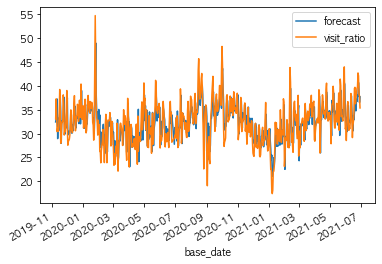

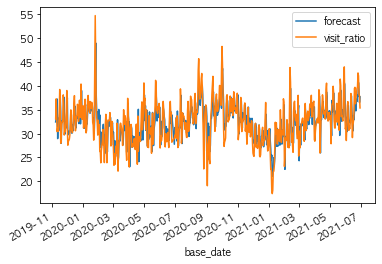

In [20]:
model_fit.plot_predict()

# frgn_ratio 예측

In [22]:
data['frgn_ratio'] = data['frgn_ratio']*100.

In [25]:
emd_list = data['emd_nm'].unique()
emd_list

array(['건입동', '남원읍', '노형동', '대륜동', '대정읍', '대천동', '도두동', '동홍동', '봉개동',
       '삼도1동', '삼도2동', '삼양동', '서홍동', '성산읍', '송산동', '아라동', '안덕면', '애월읍',
       '연동', '영천동', '예래동', '오라동', '외도동', '용담1동', '용담2동', '이도1동', '이도2동',
       '이호동', '일도1동', '일도2동', '정방동', '중문동', '중앙동', '천지동', '표선면', '화북동',
       '효돈동', '전체', '조천읍', '구좌읍', '한림읍', '한경면'], dtype=object)

In [26]:
test_frgn_ratio=pd.DataFrame(columns=['emd_nm'])
for region in emd_list[:-2]:
    data_frgn_ratio=data.loc[data['emd_nm']==region,['frgn_ratio']]
    print(region)
    
    model_arima= auto_arima(data_frgn_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_frgn_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    if region=='성산읍':
        arima_p=3;arima_q=1;arima_d=1
    model=ARIMA(data_frgn_ratio,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['frgn_ratio'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['frgn_ratio'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_frgn_ratio=pd.concat([test_frgn_ratio,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=13795.576, BIC=13805.878, Time=0.015 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=13792.228, BIC=13807.681, Time=0.069 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=13717.088, BIC=13737.691, Time=0.081 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=13660.184, BIC=13685.938, Time=0.180 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13633.703, BIC=13664.607, Time=0.459 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=13626.504, BIC=13662.559, Time=0.560 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=13794.607, BIC=13810.059, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=13671.495, BIC=13692.098, Time=0.207 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=13610.951, BIC=13636.705, Time=0.135 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=13612.791, BIC=13643.696, Time=0.266 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=13614.6

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   13    f=  5.33371D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     16      1     0     0   8.882D-08   5.334D+00
  F =   5.3337139743801032     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
남원읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=14469.141, BIC=14479.443, Time=0.010 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=14461.511, BIC=14476.964, Time=0.061 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=14204.315, BIC=14224.918, Time=0.103 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=14177.813, BIC=14203.566, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   13    f=  5.55460D+00    |proj g|=  8.88178D-08

At iterate   14    f=  5.55460D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     19      1     0     0   8.882D-08   5.555D+00
  F =   5.5545988900429020     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
노형동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=9770.658, BIC=9780.961, Time=0.021 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=9732.250, BIC=9747.704, Time=0.060 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=9673.336, BIC=9693.942, Time=0.074 seconds
Fit ARIMA(0,1,3)x(0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=11690.946, BIC=11706.398, Time=0.134 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=11651.498, BIC=11672.101, Time=0.070 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=11633.784, BIC=11659.537, Time=0.114 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=11579.024, BIC=11609.928, Time=0.436 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=11561.549, BIC=11597.604, Time=0.515 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=11690.963, BIC=11706.416, Time=0.041 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=11574.376, BIC=11594.979, Time=0.158 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=11556.713, BIC=11582.466, Time=0.153 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=11558.162, BIC=11589.066, Time=0.248 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=11552.345, BIC=11588.400, Time=0.519 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=11666.640, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  4.52490D+00    |proj g|=  9.87566D-04

At iterate    7    f=  4.52487D+00    |proj g|=  1.66427D-03

At iterate    8    f=  4.52486D+00    |proj g|=  1.93472D-03

At iterate    9    f=  4.52484D+00    |proj g|=  6.17462D-04

At iterate   10    f=  4.52484D+00    |proj g|=  1.14753D-04

At iterate   11    f=  4.52484D+00    |proj g|=  1.58096D-05

At iterate   12    f=  4.52484D+00    |proj g|=  4.08562D-06

At iterate   13    f=  4.52484D+00    |proj g|=  1.33227D-06

At iterate   14    f=  4.52484D+00    |proj g|=  8.88178D-08

At iterate   15    f=  4.52484D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=13095.481, BIC=13105.782, Time=0.049 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=13077.644, BIC=13093.096, Time=0.111 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=13056.674, BIC=13077.277, Time=0.075 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=13055.840, BIC=13081.594, Time=0.129 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13015.392, BIC=13046.296, Time=0.385 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=12986.291, BIC=13022.346, Time=0.581 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=13082.029, BIC=13097.481, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=13046.927, BIC=13067.530, Time=0.072 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=13048.196, BIC=13073.949, Time=0.192 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=12964.078, BIC=12994.982, Time=0.275 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=12934.955, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    7    f=  5.06705D+00    |proj g|=  2.06803D-03

At iterate    8    f=  5.06704D+00    |proj g|=  4.10871D-04

At iterate    9    f=  5.06704D+00    |proj g|=  1.06315D-04

At iterate   10    f=  5.06704D+00    |proj g|=  4.68958D-05

At iterate   11    f=  5.06704D+00    |proj g|=  2.78888D-05

At iterate   12    f=  5.06704D+00    |proj g|=  4.61853D-06

At iterate   13    f=  5.06704D+00    |proj g|=  5.32907D-07

At iterate   14    f=  5.06704D+00    |proj g|=  8.88178D-08

At iterate   15    f=  5.06704D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     15     20   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    8    f=  6.25465D+00    |proj g|=  3.99680D-06

At iterate    9    f=  6.25465D+00    |proj g|=  4.08562D-06

At iterate   10    f=  6.25465D+00    |proj g|=  8.97060D-06

At iterate   11    f=  6.25465D+00    |proj g|=  1.08358D-05

At iterate   12    f=  6.25465D+00    |proj g|=  1.81188D-05

At iterate   13    f=  6.25465D+00    |proj g|=  1.01252D-05

At iterate   14    f=  6.25465D+00    |proj g|=  2.66454D-07

At iterate   15    f=  6.25465D+00    |proj g|=  2.66454D-07

At iterate   16    f=  6.25465D+00    |proj g|=  2.66454D-07

At iterate   17    f=  6.25465D+00    |proj g|=  2.66454D-07

At iterate   18    f=  6.25465D+00    |proj g|=  2.66454D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    7    f=  3.95301D+00    |proj g|=  1.22569D-05

At iterate    8    f=  3.95301D+00    |proj g|=  8.43769D-07

At iterate    9    f=  3.95301D+00    |proj g|=  1.77636D-07

At iterate   10    f=  3.95301D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     10     13      1     0     0   8.882D-08   3.953D+00
  F =   3.9530128268039832     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
봉개동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=14552.127, BIC=14562.430, Time=0.009 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=14265.457, BIC=14280.911, Ti

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54460D+00    |proj g|=  1.61116D-04

At iterate    1    f=  5.54460D+00    |proj g|=  3.29514D-04

At iterate    2    f=  5.54460D+00    |proj g|=  1.12266D-04

At iterate    3    f=  5.54460D+00    |proj g|=  4.06786D-05

At iterate    4    f=  5.54460D+00    |proj g|=  2.95763D-05

At iterate    5    f=  5.54460D+00    |proj g|=  4.08562D-06

At iterate    6    f=  5.54460D+00    |proj g|=  1.77636D-07

At iterate    7    f=  5.54460D+00    |proj g|=  8.88178D-08

At iterate    8    f=  5.54460D+00    |proj g|=  1.77636D-07

At iterate    9    f=  5.54460D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=13841.891, BIC=13857.345, Time=0.138 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=13683.881, BIC=13704.487, Time=0.113 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=13644.535, BIC=13670.293, Time=0.153 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13631.717, BIC=13662.625, Time=0.453 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=13633.394, BIC=13669.455, Time=0.588 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=13841.964, BIC=13857.418, Time=0.018 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=13687.940, BIC=13708.546, Time=0.106 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=13628.484, BIC=13654.241, Time=0.151 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=13630.107, BIC=13661.016, Time=0.256 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=13631.075, BIC=13667.135, Time=0.795 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=13745.869, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


삼양동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=8697.134, BIC=8707.437, Time=0.036 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=8569.497, BIC=8584.952, Time=0.046 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=8424.280, BIC=8444.886, Time=0.061 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=8418.858, BIC=8444.616, Time=0.119 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=8419.213, BIC=8450.122, Time=0.353 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=8418.557, BIC=8454.617, Time=0.393 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=8647.080, BIC=8662.534, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=8425.727, BIC=8446.333, Time=0.086 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=8417.115, BIC=8442.872, Time=0.123 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=8415.585, BIC=8446.494, Time=0.381 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=8415.876, BIC=8451.936, Tim

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate   10    f=  3.29296D+00    |proj g|=  8.79874D-04

At iterate   11    f=  3.29296D+00    |proj g|=  1.38267D-03

At iterate   12    f=  3.29295D+00    |proj g|=  1.60760D-03

At iterate   13    f=  3.29294D+00    |proj g|=  1.17684D-03

At iterate   14    f=  3.29294D+00    |proj g|=  1.54796D-03

At iterate   15    f=  3.29294D+00    |proj g|=  4.13891D-05

At iterate   16    f=  3.29294D+00    |proj g|=  8.92619D-06

At iterate   17    f=  3.29294D+00    |proj g|=  1.95399D-06

At iterate   18    f=  3.29294D+00    |proj g|=  7.10543D-07

At iterate   19    f=  3.29294D+00    |proj g|=  1.33227D-07

At iterate   20    f=  3.29294D+00    |proj g|=  8.88178D-08

At iterate   21    f=  3.29294D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized C

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   11    f=  6.48607D+00    |proj g|=  6.82121D-05

At iterate   12    f=  6.48607D+00    |proj g|=  8.01137D-05

At iterate   13    f=  6.48607D+00    |proj g|=  4.30767D-05

At iterate   14    f=  6.48606D+00    |proj g|=  9.76996D-06

At iterate   15    f=  6.48606D+00    |proj g|=  1.15463D-06

At iterate   16    f=  6.48606D+00    |proj g|=  7.10543D-07

At iterate   17    f=  6.48606D+00    |proj g|=  4.44089D-07

At iterate   18    f=  6.48606D+00    |proj g|=  1.77636D-07

At iterate   19    f=  6.48606D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     23   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   12    f=  5.00697D+00    |proj g|=  8.88178D-08

At iterate   13    f=  5.00697D+00    |proj g|=  8.88178D-08

At iterate   14    f=  5.00697D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     14     16      1     0     0   8.882D-08   5.007D+00
  F =   5.0069743897419885     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
송산동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=17381.621, BIC=17391.923, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=17258.451, BIC=17273.903, Time=0.065 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    9    f=  6.60959D+00    |proj g|=  7.21645D-04

At iterate   10    f=  6.60959D+00    |proj g|=  4.27036D-04

At iterate   11    f=  6.60958D+00    |proj g|=  8.01137D-05

At iterate   12    f=  6.60958D+00    |proj g|=  9.52127D-05

At iterate   13    f=  6.60958D+00    |proj g|=  2.29861D-04

At iterate   14    f=  6.60958D+00    |proj g|=  4.40714D-04

At iterate   15    f=  6.60958D+00    |proj g|=  7.18625D-04

At iterate   16    f=  6.60958D+00    |proj g|=  8.19522D-04

At iterate   17    f=  6.60958D+00    |proj g|=  9.30367D-04

At iterate   18    f=  6.60958D+00    |proj g|=  6.03695D-04

At iterate   19    f=  6.60958D+00    |proj g|=  1.15641D-04

At iterate   20    f=  6.60958D+00    |proj g|=  1.88294D-05

At iterate   21    f=  6.60958D+00    |proj g|=  7.28306D-06

At iterate   22    f=  6.60958D+00    |proj g|=  4.97380D-06

At iterate   23    f=  6.60958D+00    |proj g|=  2.66454D-06

At iterate   24    f=  6.60958D+00    |proj g|=  1.68754D-06

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=13369.292, BIC=13389.895, Time=0.077 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=13337.301, BIC=13363.054, Time=0.119 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13337.924, BIC=13368.828, Time=0.387 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=13333.668, BIC=13369.723, Time=0.475 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=13443.504, BIC=13458.956, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=13404.921, BIC=13425.524, Time=0.091 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=13321.921, BIC=13347.675, Time=0.154 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=13319.452, BIC=13350.356, Time=0.330 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=13312.889, BIC=13348.944, Time=0.915 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=13359.277, BIC=13379.879, Time=0.033 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=13346.301, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    5    f=  5.21578D+00    |proj g|=  3.23181D-03

At iterate    6    f=  5.21564D+00    |proj g|=  3.40723D-03

At iterate    7    f=  5.21558D+00    |proj g|=  3.62901D-03

At iterate    8    f=  5.21550D+00    |proj g|=  1.48912D-03

At iterate    9    f=  5.21544D+00    |proj g|=  1.35953D-03

At iterate   10    f=  5.21541D+00    |proj g|=  1.84057D-03

At iterate   11    f=  5.21533D+00    |proj g|=  2.67208D-03

At iterate   12    f=  5.21525D+00    |proj g|=  1.76845D-03

At iterate   13    f=  5.21524D+00    |proj g|=  5.31308D-04

At iterate   14    f=  5.21524D+00    |proj g|=  7.14095D-05

At iterate   15    f=  5.21524D+00    |proj g|=  6.66134D-06

At iterate   16    f=  5.21524D+00    |proj g|=  4.08562D-06

At iterate   17    f=  5.21524D+00    |proj g|=  2.66454D-07

At iterate   18    f=  5.21524D+00    |proj g|=  1.77636D-07

At iterate   19    f=  5.21524D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total nu

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate   13    f=  5.14187D+00    |proj g|=  5.32907D-07

At iterate   14    f=  5.14187D+00    |proj g|=  3.55271D-07

At iterate   15    f=  5.14187D+00    |proj g|=  1.77636D-07

At iterate   16    f=  5.14187D+00    |proj g|=  3.55271D-07

At iterate   17    f=  5.14187D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     23      1     0     0   0.000D+00   5.142D+00
  F =   5.1418702015085351     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
연동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=11935.208, BIC=11945.511, Time=0.008 seconds
Fit ARIMA(0,1,1)x

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    8    f=  4.60134D+00    |proj g|=  7.34637D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      8     17      1     0     0   7.346D-02   4.601D+00
  F =   4.6013439758711829     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
영천동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=14755.753, BIC=14766.054, Time=0.028 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=14757.745, BIC=14773.197, Time=0.038 seconds


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:491: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=14548.454, BIC=14569.056, Time=0.115 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=14510.109, BIC=14535.862, Time=0.185 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=14502.982, BIC=14533.887, Time=0.499 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=14502.691, BIC=14538.746, Time=0.589 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=14757.749, BIC=14773.202, Time=0.011 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=14577.146, BIC=14597.748, Time=0.105 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=14499.569, BIC=14525.323, Time=0.161 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=14501.024, BIC=14531.928, Time=0.258 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=14502.836, BIC=14538.891, Time=0.649 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=14638.668, BIC=14659.271, Time=0.033 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=14515.410, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    5    f=  5.68218D+00    |proj g|=  7.09655D-05

At iterate    6    f=  5.68218D+00    |proj g|=  6.90115D-05

At iterate    7    f=  5.68218D+00    |proj g|=  9.88543D-05

At iterate    8    f=  5.68218D+00    |proj g|=  1.00009D-04

At iterate    9    f=  5.68218D+00    |proj g|=  1.59872D-06

At iterate   10    f=  5.68218D+00    |proj g|=  1.77636D-07

At iterate   11    f=  5.68218D+00    |proj g|=  8.88178D-08

At iterate   12    f=  5.68218D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     20      1     0     0   0.000D+00   5.682D+00
  F =   5.68217834925

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  5.46215D+00    |proj g|=  2.69207D-04

At iterate    7    f=  5.46215D+00    |proj g|=  3.32356D-04

At iterate    8    f=  5.46214D+00    |proj g|=  4.04565D-04

At iterate    9    f=  5.46214D+00    |proj g|=  2.35723D-04

At iterate   10    f=  5.46214D+00    |proj g|=  8.38440D-05

At iterate   11    f=  5.46214D+00    |proj g|=  1.73195D-05

At iterate   12    f=  5.46214D+00    |proj g|=  2.23821D-05

At iterate   13    f=  5.46214D+00    |proj g|=  4.19220D-05

At iterate   14    f=  5.46214D+00    |proj g|=  7.87814D-05

At iterate   15    f=  5.46214D+00    |proj g|=  1.31006D-04

At iterate   16    f=  5.46214D+00    |proj g|=  2.16982D-04

At iterate   17    f=  5.46214D+00    |proj g|=  3.21076D-04

At iterate   18    f=  5.46214D+00    |proj g|=  3.92575D-04

At iterate   19    f=  5.46214D+00    |proj g|=  2.94698D-04

At iterate   20    f=  5.46214D+00    |proj g|=  2.94698D-04

At iterate   21    f=  5.46214D+00    |proj g|=  6.13731D-05

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=10232.665, BIC=10248.119, Time=0.157 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=10113.071, BIC=10133.677, Time=0.071 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=10100.463, BIC=10126.220, Time=0.114 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=10100.706, BIC=10131.615, Time=0.371 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=10100.384, BIC=10136.444, Time=0.445 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=10283.794, BIC=10299.248, Time=0.041 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=10101.549, BIC=10122.155, Time=0.096 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=10097.812, BIC=10123.570, Time=0.097 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=10099.651, BIC=10130.560, Time=0.219 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=10097.891, BIC=10133.951, Time=0.863 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=10214.666, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=10094.126, BIC=10109.578, Time=0.127 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=10020.516, BIC=10041.119, Time=0.068 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=10014.713, BIC=10040.466, Time=0.120 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=10011.650, BIC=10042.554, Time=0.366 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=10012.835, BIC=10048.890, Time=0.439 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=10263.384, BIC=10278.836, Time=0.024 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=10008.643, BIC=10029.245, Time=0.096 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=10010.275, BIC=10036.029, Time=0.145 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=10010.733, BIC=10041.637, Time=0.286 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=10012.687, BIC=10048.742, Time=0.852 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=10176.903, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


용담2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=14193.503, BIC=14203.806, Time=0.028 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=14153.024, BIC=14168.478, Time=0.070 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=14007.437, BIC=14028.043, Time=0.108 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=14005.664, BIC=14031.421, Time=0.167 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13999.246, BIC=14030.155, Time=0.418 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=14001.046, BIC=14037.106, Time=0.577 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=14177.556, BIC=14193.010, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=14028.534, BIC=14049.140, Time=0.105 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=14003.629, BIC=14029.386, Time=0.099 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=14003.246, BIC=14034.155, Time=0.309 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=13991.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate   16    f=  5.47693D+00    |proj g|=  8.88178D-08

At iterate   17    f=  5.47693D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     17     20      1     0     0   0.000D+00   5.477D+00
  F =   5.4769294652647522     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
이도1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=10891.145, BIC=10901.448, Time=0.015 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=10785.190, BIC=10800.644, Time=0.072 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=10649.111, BIC=10669.717, Time=0.086 seconds
Fit ARIMA(0,1

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   13    f=  4.14704D+00    |proj g|=  3.65041D-05

At iterate   14    f=  4.14704D+00    |proj g|=  6.12843D-06

At iterate   15    f=  4.14704D+00    |proj g|=  3.55271D-07

At iterate   16    f=  4.14704D+00    |proj g|=  1.77636D-07

At iterate   17    f=  4.14704D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     22      1     0     0   1.776D-07   4.147D+00
  F =   4.1470393564280998     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
이도2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=7916.889, BIC=7927.192, Time=0.009 seconds
Fit ARIMA(0,1,1)

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate    6    f=  2.99878D+00    |proj g|=  2.19629D-03

At iterate    7    f=  2.99874D+00    |proj g|=  1.77205D-03

At iterate    8    f=  2.99867D+00    |proj g|=  2.60703D-03

At iterate    9    f=  2.99848D+00    |proj g|=  1.28342D-02

At iterate   10    f=  2.99822D+00    |proj g|=  2.06385D-02

At iterate   11    f=  2.99729D+00    |proj g|=  3.74500D-02

At iterate   12    f=  2.99690D+00    |proj g|=  1.59819D-02

At iterate   13    f=  2.99650D+00    |proj g|=  1.56833D-02

At iterate   14    f=  2.99642D+00    |proj g|=  3.40328D-03

At iterate   15    f=  2.99637D+00    |proj g|=  1.84657D-03

At iterate   16    f=  2.99636D+00    |proj g|=  1.33875D-03

At iterate   17    f=  2.99635D+00    |proj g|=  9.49907D-05

At iterate   18    f=  2.99635D+00    |proj g|=  7.23421D-05

At iterate   19    f=  2.99635D+00    |proj g|=  1.50990D-06

At iterate   20    f=  2.99635D+00    |proj g|=  1.77636D-07

At iterate   21    f=  2.99635D+00    |proj g|=  8.88178D-08

At itera

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=13949.507, BIC=13964.931, Time=0.160 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=13847.387, BIC=13867.952, Time=0.110 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=13756.069, BIC=13781.775, Time=0.150 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=13729.784, BIC=13760.632, Time=0.477 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=13731.031, BIC=13767.019, Time=0.614 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=13951.112, BIC=13966.536, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=13749.897, BIC=13770.462, Time=0.161 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=13723.859, BIC=13749.566, Time=0.171 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=13725.637, BIC=13756.485, Time=0.272 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=13731.652, BIC=13767.641, Time=0.616 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=13902.224, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   12    f=  5.42658D+00    |proj g|=  2.94520D-04

At iterate   13    f=  5.42658D+00    |proj g|=  1.92024D-04

At iterate   14    f=  5.42658D+00    |proj g|=  1.05072D-04

At iterate   15    f=  5.42658D+00    |proj g|=  2.09610D-05

At iterate   16    f=  5.42658D+00    |proj g|=  3.10862D-06

At iterate   17    f=  5.42658D+00    |proj g|=  9.76996D-07

At iterate   18    f=  5.42658D+00    |proj g|=  3.55271D-07

At iterate   19    f=  5.42658D+00    |proj g|=  2.66454D-07

At iterate   20    f=  5.42658D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     20     34   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


정방동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=16160.654, BIC=16170.955, Time=0.024 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=16057.271, BIC=16072.723, Time=0.120 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=15853.060, BIC=15873.663, Time=0.148 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=15719.691, BIC=15745.444, Time=0.170 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=15709.921, BIC=15740.825, Time=0.482 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=15710.106, BIC=15746.160, Time=0.709 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=16126.498, BIC=16141.951, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=16022.550, BIC=16043.153, Time=0.100 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=15722.260, BIC=15748.013, Time=0.182 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=15712.184, BIC=15743.088, Time=0.254 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=15710.4

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    8    f=  6.15572D+00    |proj g|=  3.56337D-04

At iterate    9    f=  6.15572D+00    |proj g|=  2.56239D-04

At iterate   10    f=  6.15572D+00    |proj g|=  1.11910D-04

At iterate   11    f=  6.15572D+00    |proj g|=  7.46070D-06

At iterate   12    f=  6.15572D+00    |proj g|=  1.86517D-06

At iterate   13    f=  6.15572D+00    |proj g|=  3.55271D-07

At iterate   14    f=  6.15572D+00    |proj g|=  8.88178D-08

At iterate   15    f=  6.15572D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     20      1     0     0   0.000D+00   6.156D+00
  F =   6.15572080272

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    7    f=  5.52325D+00    |proj g|=  1.49658D-04

At iterate    8    f=  5.52325D+00    |proj g|=  4.89386D-05

At iterate    9    f=  5.52325D+00    |proj g|=  1.07470D-05

At iterate   10    f=  5.52325D+00    |proj g|=  1.15463D-06

At iterate   11    f=  5.52325D+00    |proj g|=  8.88178D-07

At iterate   12    f=  5.52325D+00    |proj g|=  6.21725D-07

At iterate   13    f=  5.52325D+00    |proj g|=  2.66454D-07

At iterate   14    f=  5.52325D+00    |proj g|=  2.66454D-07

At iterate   15    f=  5.52325D+00    |proj g|=  8.88178D-08

At iterate   16    f=  5.52325D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   12    f=  4.73357D+00    |proj g|=  2.02505D-05

At iterate   13    f=  4.73357D+00    |proj g|=  2.93099D-06

At iterate   14    f=  4.73357D+00    |proj g|=  1.77636D-07

At iterate   15    f=  4.73357D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     15     19      1     0     0   1.776D-07   4.734D+00
  F =   4.7335691313399666     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
천지동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=15212.969, BIC=15223.271, Time=0.015 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=15179.525, BIC=15194.977, Ti

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    5    f=  5.85688D+00    |proj g|=  2.85905D-04

At iterate    6    f=  5.85688D+00    |proj g|=  3.00115D-04

At iterate    7    f=  5.85687D+00    |proj g|=  4.95248D-04

At iterate    8    f=  5.85686D+00    |proj g|=  9.30456D-04

At iterate    9    f=  5.85686D+00    |proj g|=  1.21041D-03

At iterate   10    f=  5.85685D+00    |proj g|=  3.60867D-04

At iterate   11    f=  5.85685D+00    |proj g|=  1.50990D-04

At iterate   12    f=  5.85685D+00    |proj g|=  4.83169D-05

At iterate   13    f=  5.85685D+00    |proj g|=  6.57252D-06

At iterate   14    f=  5.85685D+00    |proj g|=  1.06581D-06

At iterate   15    f=  5.85685D+00    |proj g|=  1.77636D-07

At iterate   16    f=  5.85685D+00    |proj g|=  1.77636D-07

At iterate   17    f=  5.85685D+00    |proj g|=  1.77636D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


표선면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=12329.762, BIC=12340.063, Time=0.012 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=12264.864, BIC=12280.316, Time=0.183 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=12093.509, BIC=12114.112, Time=0.133 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=12078.702, BIC=12104.455, Time=0.156 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=12077.080, BIC=12107.984, Time=0.425 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=12077.205, BIC=12113.260, Time=0.503 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=12305.183, BIC=12320.636, Time=0.051 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=12092.458, BIC=12113.061, Time=0.107 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=12074.310, BIC=12100.063, Time=0.158 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=12074.097, BIC=12105.002, Time=0.327 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=12075.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


화북동
At iterate   13    f=  4.73021D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     13     17      1     0     0   0.000D+00   4.730D+00
  F =   4.7302134769472808     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            

Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=8909.245, BIC=8919.548, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=8714.128, BIC=8729.582, Time=0.045 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=8596.631, BIC=8617.237, Time=0.065 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=8592.669, BIC=8618.427, Time=0.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   13    f=  3.35643D+00    |proj g|=  1.33227D-07

At iterate   14    f=  3.35643D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     14     21      1     0     0   1.332D-07   3.356D+00
  F =   3.3564295659762937     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
효돈동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=11755.335, BIC=11765.637, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=11545.210, BIC=11560.662, Time=0.054 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=11429.247, BIC=11449.850, Time=0.079 seconds
Fit ARIMA(0,1

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate    8    f=  4.47286D+00    |proj g|=  1.50990D-06

At iterate    9    f=  4.47286D+00    |proj g|=  7.99361D-07

At iterate   10    f=  4.47286D+00    |proj g|=  1.77636D-07

At iterate   11    f=  4.47286D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     11     14      1     0     0   0.000D+00   4.473D+00
  F =   4.4728561006455596     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
전체
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=8757.496, BIC=8767.799, Time=0.025 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=8728.270, BIC=8743.725, Time=0.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    9    f=  3.39480D+00    |proj g|=  5.06262D-06

At iterate   10    f=  3.39480D+00    |proj g|=  1.55431D-06

At iterate   11    f=  3.39480D+00    |proj g|=  2.22045D-07

At iterate   12    f=  3.39480D+00    |proj g|=  8.88178D-08

At iterate   13    f=  3.39480D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     13     18      1     0     0   8.882D-08   3.395D+00
  F =   3.3948047273108108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
조천읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=5431.166, BIC=5439.973, Time=0.005 seconds
Fit ARIMA(0,1,1)x

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    4    f=  4.38832D+00    |proj g|=  2.47802D-04

At iterate    5    f=  4.38832D+00    |proj g|=  6.19949D-05

At iterate    6    f=  4.38832D+00    |proj g|=  3.03757D-05

At iterate    7    f=  4.38832D+00    |proj g|=  8.88178D-08

At iterate    8    f=  4.38832D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      8     13      1     0     0   8.882D-08   4.388D+00
  F =   4.3883229058606972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
구좌읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=5187.817, BIC=5196.608, Time=0.018 seconds
Fit ARIMA(0,1,1)x

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


In [30]:
for region in emd_list[-2:]:
    data_frgn_ratio=data.loc[data['emd_nm']==region,['frgn_ratio']]
    print(region)
    
    model_arima= auto_arima(data_frgn_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_frgn_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    if region=='한림읍':
        arima_p=0;arima_q=1;arima_d=4
    model=ARIMA(data_frgn_ratio,order=(arima_p,arima_q,arima_d))
    
#     model=ARIMA(data_frgn_ratio,order=(2,1,3),start_ar_lags=2 * max(arima_p, arima_q))
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['frgn_ratio'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['frgn_ratio'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_frgn_ratio=pd.concat([test_frgn_ratio,forecast])

한림읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=6684.412, BIC=6693.199, Time=0.012 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6594.045, BIC=6607.226, Time=0.050 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6576.447, BIC=6594.022, Time=0.067 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6499.440, BIC=6521.408, Time=0.096 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6470.933, BIC=6497.295, Time=0.134 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6471.918, BIC=6502.673, Time=0.335 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6639.997, BIC=6653.178, Time=0.009 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6588.049, BIC=6605.623, Time=0.052 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6479.065, BIC=6501.033, Time=0.126 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6475.966, BIC=6502.327, Time=0.137 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6472.160, BIC=6502.915, Tim

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6211.237, BIC=6233.188, Time=0.093 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6207.026, BIC=6233.368, Time=0.124 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6208.969, BIC=6239.700, Time=0.193 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6296.221, BIC=6309.391, Time=0.010 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6219.853, BIC=6237.414, Time=0.059 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6205.260, BIC=6227.211, Time=0.067 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6206.363, BIC=6232.704, Time=0.147 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6208.274, BIC=6239.006, Time=0.246 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=6270.360, BIC=6287.921, Time=0.018 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=6204.827, BIC=6226.778, Time=0.073 seconds
Fit ARIMA(2,1,2)x(0,0,0,1) [intercept=True]; AIC=6206.650, BIC=6232.992, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


In [31]:
test_frgn_ratio

,emd_nm,frgn_ratio
2021-07-01,건입동,236.016494
2021-07-02,건입동,236.059062
2021-07-03,건입동,236.061215
2021-07-04,건입동,236.039390
2021-07-05,건입동,236.003339
...,...,...
2021-09-14,한경면,490.557616
2021-09-15,한경면,490.649012
2021-09-16,한경면,490.740409
2021-09-17,한경면,490.831805


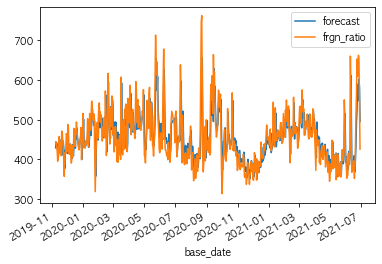

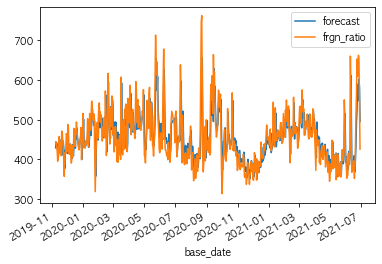

In [32]:
model_fit.plot_predict()

# youth_ratio 예측

In [33]:
data['youth_ratio'] = data['youth_ratio']*100.

In [35]:
test_youth_ratio=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_youth_ratio=data.loc[data['emd_nm']==region,['youth_ratio']]
    print(region)
    
    model_arima= auto_arima(data_youth_ratio,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_youth_ratio)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_youth_ratio,order=(arima_p,arima_q,arima_d))
    
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['youth_ratio'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['youth_ratio'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_youth_ratio=pd.concat([test_youth_ratio,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=891.495, BIC=901.796, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=806.176, BIC=821.629, Time=0.051 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=692.851, BIC=713.454, Time=0.089 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=680.095, BIC=705.849, Time=0.167 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=679.671, BIC=710.575, Time=0.526 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=673.877, BIC=709.932, Time=0.638 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=849.700, BIC=865.152, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=679.711, BIC=700.314, Time=0.163 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=675.892, BIC=701.646, Time=0.190 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=676.938, BIC=707.843, Time=0.416 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=678.881, BIC=714.936, Time=0.825 seconds
Fit AR

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f=  2.58509D-01    |proj g|=  3.24052D-04

At iterate    3    f=  2.58509D-01    |proj g|=  2.38587D-04

At iterate    4    f=  2.58509D-01    |proj g|=  4.69730D-04

At iterate    5    f=  2.58508D-01    |proj g|=  4.63218D-04

At iterate    6    f=  2.58507D-01    |proj g|=  2.38621D-03

At iterate    7    f=  2.58499D-01    |proj g|=  6.56573D-03

At iterate    8    f=  2.58497D-01    |proj g|=  2.68021D-03

At iterate    9    f=  2.58495D-01    |proj g|=  8.70887D-03

At iterate   10    f=  2.58493D-01    |proj g|=  1.21061D-02

At iterate   11    f=  2.58490D-01    |proj g|=  1.11367D-02

At iterate   12    f=  2.58488D-01    |proj g|=  5.04720D-03

At iterate   13    f=  2.58487D-01    |proj g|=  3.33563D-03

At iterate   14    f=  2.58487D-01    |proj g|=  3.06803D-03

At iterate   15    f=  2.58487D-01    |proj g|=  6.67216D-03

At iterate   16    f=  2.58486D-01    |proj g|=  4.11202D-03

At iterate   17    f=  2.58486D-01    |proj g|=  1.33515D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-330.779, BIC=-310.173, Time=0.134 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-328.802, BIC=-303.045, Time=0.272 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-331.858, BIC=-300.949, Time=0.598 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-330.616, BIC=-294.556, Time=0.886 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-28.441, BIC=-12.987, Time=0.042 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-257.826, BIC=-237.220, Time=0.216 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-328.798, BIC=-303.041, Time=0.201 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-326.798, BIC=-295.889, Time=0.190 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-331.572, BIC=-295.511, Time=0.859 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-209.113, BIC=-188.507, Time=0.062 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=-322.165, BIC=-296.408, Time=0.15

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=997.781, BIC=1018.384, Time=0.087 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=881.059, BIC=906.812, Time=0.169 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=855.267, BIC=886.172, Time=0.495 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=856.532, BIC=892.587, Time=0.701 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1101.549, BIC=1117.001, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1077.511, BIC=1098.114, Time=0.163 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=893.419, BIC=919.172, Time=0.223 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=867.700, BIC=898.604, Time=0.464 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=869.217, BIC=905.272, Time=0.848 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1023.948, BIC=1044.550, Time=0.038 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=817.901, BIC=843.654, Time=0.501 seconds
Fit

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.70581D-01    |proj g|=  4.63088D-03

At iterate    1    f=  2.70579D-01    |proj g|=  6.18539D-03

At iterate    2    f=  2.70576D-01    |proj g|=  3.30317D-03

At iterate    3    f=  2.70573D-01    |proj g|=  3.27782D-03

At iterate    4    f=  2.70567D-01    |proj g|=  5.11451D-03

At iterate    5    f=  2.70555D-01    |proj g|=  9.22474D-03

At iterate    6    f=  2.70541D-01    |proj g|=  8.51565D-03

At iterate    7    f=  2.70526D-01    |proj g|=  3.54364D-03

At iterate    8    f=  2.70521D-01    |proj g|=  1.33921D-03

At iterate    9    f=  2.70520D-01    |proj g|=  1.58659D-03

At iterate   10    f=  2.70518D-01    |proj g|=  1.75365D-03

At iterate   11    f=  2.70509D-01    |proj g|=  2.58336D-03

At iterate   12    f=  2.70485D-01    |proj g|=  3.46124D-03

At iterate   13    f=  2.7

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f= -6.12917D-03    |proj g|=  1.06357D-04

At iterate    4    f= -6.12923D-03    |proj g|=  6.46454D-05

At iterate    5    f= -6.12929D-03    |proj g|=  4.17655D-05

At iterate    6    f= -6.12929D-03    |proj g|=  3.16897D-05

At iterate    7    f= -6.12930D-03    |proj g|=  4.22648D-06

At iterate    8    f= -6.12930D-03    |proj g|=  3.81630D-06

At iterate    9    f= -6.12930D-03    |proj g|=  4.10158D-06

At iterate   10    f= -6.12930D-03    |proj g|=  8.47074D-06

At iterate   11    f= -6.12930D-03    |proj g|=  1.63531D-05

At iterate   12    f= -6.12930D-03    |proj g|=  2.33080D-05

At iterate   13    f= -6.12930D-03    |proj g|=  2.20775D-05

At iterate   14    f= -6.12930D-03    |proj g|=  3.21711D-05

At iterate   15    f= -6.12931D-03    |proj g|=  1.12349D-05

At iterate   16    f= -6.12931D-03    |proj g|=  8.13195D-06

At iterate   17    f= -6.12931D-03    |proj g|=  1.06998D-06

At iterate   18    f= -6.12931D-03    |proj g|=  1.24813D-07

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f=  3.48492D-01    |proj g|=  2.27249D-03

At iterate    3    f=  3.48471D-01    |proj g|=  1.31347D-03

At iterate    4    f=  3.48463D-01    |proj g|=  1.84598D-03

At iterate    5    f=  3.48448D-01    |proj g|=  2.18623D-03

At iterate    6    f=  3.48421D-01    |proj g|=  1.67484D-03

At iterate    7    f=  3.48361D-01    |proj g|=  6.31544D-03

At iterate    8    f=  3.48358D-01    |proj g|=  5.18635D-03

At iterate    9    f=  3.48351D-01    |proj g|=  1.16152D-04

At iterate   10    f=  3.48351D-01    |proj g|=  7.54008D-05

At iterate   11    f=  3.48351D-01    |proj g|=  1.72085D-05

At iterate   12    f=  3.48351D-01    |proj g|=  1.05471D-06

At iterate   13    f=  3.48351D-01    |proj g|=  7.21645D-08

At iterate   14    f=  3.48351D-01    |proj g|=  5.32907D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    3    f=  1.29071D+00    |proj g|=  5.50027D-04

At iterate    4    f=  1.29071D+00    |proj g|=  1.03717D-03

At iterate    5    f=  1.29071D+00    |proj g|=  8.26783D-04

At iterate    6    f=  1.29071D+00    |proj g|=  2.54041D-04

At iterate    7    f=  1.29071D+00    |proj g|=  1.01674D-04

At iterate    8    f=  1.29071D+00    |proj g|=  7.54952D-06

At iterate    9    f=  1.29071D+00    |proj g|=  6.03961D-06

At iterate   10    f=  1.29071D+00    |proj g|=  9.88098D-06

At iterate   11    f=  1.29071D+00    |proj g|=  1.77636D-05

At iterate   12    f=  1.29071D+00    |proj g|=  1.88738D-05

At iterate   13    f=  1.29071D+00    |proj g|=  1.09246D-05

At iterate   14    f=  1.29071D+00    |proj g|=  2.84217D-06

At iterate   15    f=  1.29071D+00    |proj g|=  4.28546D-06

At iterate   16    f=  1.29071D+00    |proj g|=  8.65974D-06

At iterate   17    f=  1.29071D+00    |proj g|=  1.31228D-05

At iterate   18    f=  1.29071D+00    |proj g|=  1.29674D-05

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f= -2.01906D-02    |proj g|=  1.36638D-04

At iterate    3    f= -2.01907D-02    |proj g|=  1.70662D-05

At iterate    4    f= -2.01907D-02    |proj g|=  1.65316D-05

At iterate    5    f= -2.01907D-02    |proj g|=  3.58446D-05

At iterate    6    f= -2.01907D-02    |proj g|=  4.31745D-05

At iterate    7    f= -2.01908D-02    |proj g|=  3.83235D-05

At iterate    8    f= -2.01908D-02    |proj g|=  8.41723D-06

At iterate    9    f= -2.01908D-02    |proj g|=  7.14706D-08

At iterate   10    f= -2.01908D-02    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     17   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


삼도1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=436.428, BIC=446.731, Time=0.048 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=222.712, BIC=238.166, Time=0.070 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=151.133, BIC=171.739, Time=0.111 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=151.710, BIC=177.467, Time=0.169 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=153.678, BIC=184.587, Time=0.516 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=153.176, BIC=189.237, Time=0.737 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=339.894, BIC=355.348, Time=0.041 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=153.276, BIC=173.882, Time=0.212 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=151.599, BIC=177.356, Time=0.192 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=153.685, BIC=184.594, Time=0.215 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=155.703, BIC=191.764, Time=0.491 seconds
Fit A

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


e   14    f=  5.54854D-02    |proj g|=  1.42726D-05

At iterate   15    f=  5.54854D-02    |proj g|=  1.12438D-05

At iterate   16    f=  5.54854D-02    |proj g|=  3.56659D-07

At iterate   17    f=  5.54854D-02    |proj g|=  3.20577D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     26      1     0     0   3.206D-07   5.549D-02
  F =   5.5485407165644887E-002

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
삼도2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=1276.602, BIC=1286.905, Time=0.045 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=1134.373, BIC=1149.828, Time=0.040 seco

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.69962D-01    |proj g|=  2.45546D-02

At iterate    1    f=  3.69958D-01    |proj g|=  3.51464D-03

At iterate    2    f=  3.69932D-01    |proj g|=  3.34660D-03

At iterate    3    f=  3.69864D-01    |proj g|=  3.54104D-03

At iterate    4    f=  3.69825D-01    |proj g|=  2.62567D-03

At iterate    5    f=  3.69812D-01    |proj g|=  2.27600D-03

At iterate    6    f=  3.69778D-01    |proj g|=  2.30821D-03

At iterate    7    f=  3.69745D-01    |proj g|=  2.27450D-03

At iterate    8    f=  3.69580D-01    |proj g|=  6.76743D-03

At iterate    9    f=  3.69324D-01    |proj g|=  1.58124D-02

At iterate   10    f=  3.69084D-01    |proj g|=  2.29312D-02

At iterate   11    f=  3.68905D-01    |proj g|=  8.85870D-03

At iterate   12    f=  3.68855D-01    |proj g|=  2.95933D-03

At iterate   13    f=  3.68851D-01    |proj g|=  1.10706D-03

At iterat

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1295.729, BIC=1316.332, Time=0.171 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1278.335, BIC=1304.089, Time=0.296 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1279.286, BIC=1310.190, Time=0.507 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1277.777, BIC=1313.832, Time=0.651 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1522.203, BIC=1537.656, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1288.950, BIC=1309.553, Time=0.246 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1275.951, BIC=1301.705, Time=0.248 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1277.705, BIC=1308.609, Time=0.419 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1279.687, BIC=1315.742, Time=0.871 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1432.552, BIC=1453.155, Time=0.048 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1277.759, BIC=1303.512, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.96463D-01    |proj g|=  3.16475D-02

At iterate    1    f=  4.96461D-01    |proj g|=  3.66951D-04

At iterate    2    f=  4.96461D-01    |proj g|=  1.39986D-03

At iterate    3    f=  4.96460D-01    |proj g|=  8.13370D-03

At iterate    4    f=  4.96460D-01    |proj g|=  8.30723D-03

At iterate    5    f=  4.96459D-01    |proj g|=  1.04057D-02

At iterate    6    f=  4.96455D-01    |proj g|=  1.25433D-02

At iterate    7    f=  4.96453D-01    |proj g|=  7.36408D-03

At iterate    8    f=  4.96453D-01    |proj g|=  6.50985D-04

At iterate    9    f=  4.96453D-01    |proj g|=  8.42071D-04

At iterate   10    f=  4.96453D-01    |proj g|=  1.33755D-03

At iterate   11    f=  4.96453D-01    |proj g|=  2.20174D-03

At iterate   12    f=  4.96453D-01    |proj g|=  3.32697D-03

At iterate   13    f=  4.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


e   14    f=  5.87759D-01    |proj g|=  2.95319D-06

At iterate   15    f=  5.87759D-01    |proj g|=  7.77156D-07

At iterate   16    f=  5.87759D-01    |proj g|=  5.55112D-08

At iterate   17    f=  5.87759D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     17     23      1     0     0   3.331D-08   5.878D-01
  F =  0.58775881274063224     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
송산동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=3168.749, BIC=3179.050, Time=0.026 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=3170.508, BIC=3185.960, Time=0.032 secon

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11963D+00    |proj g|=  1.98691D-02

At iterate    1    f=  1.11963D+00    |proj g|=  1.86451D-03

At iterate    2    f=  1.11962D+00    |proj g|=  1.67988D-03

At iterate    3    f=  1.11958D+00    |proj g|=  1.52762D-03

At iterate    4    f=  1.11955D+00    |proj g|=  1.25964D-03

At iterate    5    f=  1.11955D+00    |proj g|=  1.00673D-03

At iterate    6    f=  1.11955D+00    |proj g|=  9.45688D-05

At iterate    7    f=  1.11955D+00    |proj g|=  1.89404D-05

At iterate    8    f=  1.11955D+00    |proj g|=  3.55271D-06

At iterate    9    f=  1.11955D+00    |proj g|=  4.88498D-07

At iterate   10    f=  1.11955D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.34854D-01    |proj g|=  2.14978D-02

At iterate    1    f=  1.34840D-01    |proj g|=  2.07889D-02

At iterate    2    f=  1.34788D-01    |proj g|=  1.21595D-02

At iterate    3    f=  1.34721D-01    |proj g|=  1.26114D-02

At iterate    4    f=  1.34653D-01    |proj g|=  1.86514D-02

At iterate    5    f=  1.34522D-01    |proj g|=  1.73534D-02

At iterate    6    f=  1.34390D-01    |proj g|=  6.14800D-03

At iterate    7    f=  1.34279D-01    |proj g|=  1.33087D-02

At iterate    8    f=  1.34193D-01    |proj g|=  2.18456D-02

At iterate    9    f=  1.34012D-01    |proj g|=  2.74137D-02

At iterate   10    f=  1.33810D-01    |proj g|=  1.64933D-02

At iterate   11    f=  1.33603D-01    |proj g|=  8.10897D-03

At iterate   12    f=  1.33453D-01    |proj g|=  2.72918D-02

At iterate   13    f=  1.3

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


proj g|=  6.21753D-04

At iterate   15    f=  4.41520D-01    |proj g|=  3.64458D-04

At iterate   16    f=  4.41520D-01    |proj g|=  8.02819D-04

At iterate   17    f=  4.41519D-01    |proj g|=  1.72895D-04

At iterate   18    f=  4.41519D-01    |proj g|=  8.21954D-05

At iterate   19    f=  4.41519D-01    |proj g|=  1.47554D-04

At iterate   20    f=  4.41519D-01    |proj g|=  4.59632D-06

At iterate   21    f=  4.41519D-01    |proj g|=  2.81442D-06

At iterate   22    f=  4.41519D-01    |proj g|=  1.67644D-06

At iterate   23    f=  4.41519D-01    |proj g|=  3.38618D-07

At iterate   24    f=  4.41519D-01    |proj g|=  1.60982D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * *

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f=  4.65795D-02    |proj g|=  8.54010D-04

At iterate    4    f=  4.65788D-02    |proj g|=  4.64847D-04

At iterate    5    f=  4.65781D-02    |proj g|=  9.61119D-04

At iterate    6    f=  4.65775D-02    |proj g|=  7.02677D-04

At iterate    7    f=  4.65768D-02    |proj g|=  2.90277D-04

At iterate    8    f=  4.65766D-02    |proj g|=  1.55587D-04

At iterate    9    f=  4.65765D-02    |proj g|=  1.94876D-04

At iterate   10    f=  4.65763D-02    |proj g|=  2.24174D-04

At iterate   11    f=  4.65757D-02    |proj g|=  5.15774D-04

At iterate   12    f=  4.65747D-02    |proj g|=  7.11436D-04

At iterate   13    f=  4.65734D-02    |proj g|=  8.68775D-04

At iterate   14    f=  4.65727D-02    |proj g|=  3.55307D-04

At iterate   15    f=  4.65727D-02    |proj g|=  8.73583D-04

At iterate   16    f=  4.65726D-02    |proj g|=  1.61449D-04

At iterate   17    f=  4.65726D-02    |proj g|=  3.49817D-05

At iterate   18    f=  4.65726D-02    |proj g|=  1.30486D-05

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01395D-01    |proj g|=  1.68521D-02

At iterate    1    f= -1.01398D-01    |proj g|=  8.87303D-03

At iterate    2    f= -1.01405D-01    |proj g|=  6.55180D-03

At iterate    3    f= -1.01413D-01    |proj g|=  6.01598D-03

At iterate    4    f= -1.01415D-01    |proj g|=  3.04914D-03

At iterate    5    f= -1.01416D-01    |proj g|=  6.01074D-03

At iterate    6    f= -1.01423D-01    |proj g|=  1.48043D-02

At iterate    7    f= -1.01437D-01    |proj g|=  2.47140D-02

At iterate    8    f= -1.01466D-01    |proj g|=  3.48817D-02

At iterate    9    f= -1.01506D-01    |proj g|=  3.34949D-02

At iterate   10    f= -1.01565D-01    |proj g|=  2.72930D-02

At iterate   11    f= -1.01615D-01    |proj g|=  3.37506D-02

At iterate   12    f= -1.01641D-01    |proj g|=  1.69052D-02

At iterate   13    f= -1.01657D-01    |proj g|=  9.27745D-03

At iterate   14    f= -1.01669D-01    |

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    4    f=  6.39341D-01    |proj g|=  2.06202D-04

At iterate    5    f=  6.39340D-01    |proj g|=  2.17015D-04

At iterate    6    f=  6.39340D-01    |proj g|=  3.39184D-04

At iterate    7    f=  6.39339D-01    |proj g|=  1.06726D-04

At iterate    8    f=  6.39339D-01    |proj g|=  2.47913D-05

At iterate    9    f=  6.39339D-01    |proj g|=  1.13243D-06

At iterate   10    f=  6.39339D-01    |proj g|=  3.66374D-07

At iterate   11    f=  6.39339D-01    |proj g|=  2.22045D-08

At iterate   12    f=  6.39339D-01    |proj g|=  1.11022D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     18   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f=  9.57221D-01    |proj g|=  3.97360D-04

At iterate    4    f=  9.57221D-01    |proj g|=  3.12295D-04

At iterate    5    f=  9.57221D-01    |proj g|=  1.11000D-04

At iterate    6    f=  9.57221D-01    |proj g|=  7.39742D-05

At iterate    7    f=  9.57221D-01    |proj g|=  5.20362D-05

At iterate    8    f=  9.57221D-01    |proj g|=  5.10925D-05

At iterate    9    f=  9.57221D-01    |proj g|=  3.14304D-05

At iterate   10    f=  9.57221D-01    |proj g|=  2.12053D-06

At iterate   11    f=  9.57221D-01    |proj g|=  1.35447D-06

At iterate   12    f=  9.57221D-01    |proj g|=  1.46549D-06

At iterate   13    f=  9.57221D-01    |proj g|=  1.48770D-06

At iterate   14    f=  9.57221D-01    |proj g|=  2.17604D-06

At iterate   15    f=  9.57221D-01    |proj g|=  5.32907D-07

At iterate   16    f=  9.57221D-01    |proj g|=  1.44329D-07

At iterate   17    f=  9.57221D-01    |proj g|=  3.33067D-08

At iterate   18    f=  9.57221D-01    |proj g|=  5.55112D-08

       

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=758.212, BIC=773.666, Time=0.060 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=584.176, BIC=604.782, Time=0.119 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=585.193, BIC=610.950, Time=0.281 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=584.635, BIC=615.544, Time=0.488 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=585.571, BIC=621.632, Time=0.851 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=914.424, BIC=929.879, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=630.775, BIC=651.380, Time=0.137 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=585.324, BIC=611.082, Time=0.274 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=587.213, BIC=618.122, Time=0.173 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=581.704, BIC=617.765, Time=0.899 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=750.706, BIC=771.312, Time=0.062 seconds
Fit ARIMA(

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=278.361, BIC=298.964, Time=0.117 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=271.713, BIC=297.467, Time=0.224 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=273.257, BIC=304.162, Time=0.449 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=274.640, BIC=310.695, Time=0.545 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=441.791, BIC=457.243, Time=0.045 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=271.235, BIC=291.837, Time=0.129 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=271.470, BIC=297.223, Time=0.219 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=273.078, BIC=303.982, Time=0.368 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=275.077, BIC=311.132, Time=0.828 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=385.528, BIC=406.131, Time=0.058 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=271.235, BIC=296.988, Time=0.211 seconds
Fit ARIMA(

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=2689.291, BIC=2704.746, Time=0.125 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=2506.592, BIC=2527.198, Time=0.173 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=2423.660, BIC=2449.417, Time=0.151 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=2421.971, BIC=2452.880, Time=0.471 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=2404.830, BIC=2440.890, Time=0.598 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=2692.560, BIC=2708.015, Time=0.024 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=2485.071, BIC=2505.677, Time=0.144 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=2461.546, BIC=2487.303, Time=0.177 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=2424.586, BIC=2455.495, Time=0.342 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=2409.903, BIC=2445.964, Time=0.765 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=2678.434, BIC=2699.040, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.93034D-01    |proj g|=  9.51453D-03

At iterate    1    f=  7.93031D-01    |proj g|=  5.44728D-03

At iterate    2    f=  7.93023D-01    |proj g|=  5.15574D-03

At iterate    3    f=  7.93001D-01    |proj g|=  1.87229D-02

At iterate    4    f=  7.92982D-01    |proj g|=  8.96347D-03

At iterate    5    f=  7.92945D-01    |proj g|=  8.62608D-03

At iterate    6    f=  7.92830D-01    |proj g|=  4.19789D-03

At iterate    7    f=  7.92818D-01    |proj g|=  1.41227D-03

At iterate    8    f=  7.92811D-01    |proj g|=  3.83149D-04

At iterate    9    f=  7.92811D-01    |proj g|=  1.24775D-03

At iterate   10    f=  7.92810D-01    |proj g|=  3.00814D-03

At iterate   11    f=  7.92808D-01    |proj g|=  4.46206D-03

At iterate   12    f=  7.92807D-01    |proj g|=  3.34478D-03

At iterate   13    f=  7.92807D-01    |proj g|=  1.04369D-03

At iterate   14    f=  7.92807D-01    |

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   11    f=  3.14321D-01    |proj g|=  1.32784D-02

At iterate   12    f=  3.14153D-01    |proj g|=  9.09569D-03

At iterate   13    f=  3.14019D-01    |proj g|=  5.36313D-03

At iterate   14    f=  3.14008D-01    |proj g|=  1.72000D-02

At iterate   15    f=  3.14001D-01    |proj g|=  2.46461D-02

At iterate   16    f=  3.13978D-01    |proj g|=  1.72886D-03

At iterate   17    f=  3.13978D-01    |proj g|=  8.28509D-04

At iterate   18    f=  3.13974D-01    |proj g|=  1.62284D-03

At iterate   19    f=  3.13963D-01    |proj g|=  2.28969D-03

At iterate   20    f=  3.13963D-01    |proj g|=  2.94196D-03

At iterate   21    f=  3.13963D-01    |proj g|=  1.97975D-04

At iterate   22    f=  3.13963D-01    |proj g|=  5.91749D-06

At iterate   23    f=  3.13963D-01    |proj g|=  1.40998D-06

At iterate   24    f=  3.13963D-01    |proj g|=  7.32747D-07

At iterate   25    f=  3.13963D-01    |proj g|=  7.21645D-08

At iterate   26    f=  3.13963D-01    |proj g|=  7.21645D-08

       

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    3    f= -1.05671D-01    |proj g|=  2.02890D-02

At iterate    4    f= -1.05673D-01    |proj g|=  2.49745D-02

At iterate    5    f= -1.05674D-01    |proj g|=  1.42330D-02

At iterate    6    f= -1.05674D-01    |proj g|=  2.68436D-03

At iterate    7    f= -1.05674D-01    |proj g|=  9.05753D-04

At iterate    8    f= -1.05674D-01    |proj g|=  1.41360D-03

At iterate    9    f= -1.05674D-01    |proj g|=  2.69440D-03

At iterate   10    f= -1.05674D-01    |proj g|=  4.75594D-03

At iterate   11    f= -1.05674D-01    |proj g|=  8.06893D-03

At iterate   12    f= -1.05675D-01    |proj g|=  1.31625D-02

At iterate   13    f= -1.05676D-01    |proj g|=  2.04335D-02

At iterate   14    f= -1.05677D-01    |proj g|=  2.86767D-02

At iterate   15    f= -1.05680D-01    |proj g|=  3.26036D-02

At iterate   16    f= -1.05683D-01    |proj g|=  2.36223D-02

At iterate   17    f= -1.05685D-01    |proj g|=  6.86572D-03

At iterate   18    f= -1.05685D-01    |proj g|=  1.48144D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  5.83911D-01    |proj g|=  1.77520D-03

At iterate    2    f=  5.83910D-01    |proj g|=  1.57224D-03

At iterate    3    f=  5.83902D-01    |proj g|=  9.86289D-04

At iterate    4    f=  5.83897D-01    |proj g|=  1.51174D-03

At iterate    5    f=  5.83872D-01    |proj g|=  2.87240D-03

At iterate    6    f=  5.83838D-01    |proj g|=  3.51690D-03

At iterate    7    f=  5.83810D-01    |proj g|=  2.78271D-03

At iterate    8    f=  5.83790D-01    |proj g|=  2.25212D-03

At iterate    9    f=  5.83782D-01    |proj g|=  7.95941D-04

At iterate   10    f=  5.83781D-01    |proj g|=  1.52955D-04

At iterate   11    f=  5.83781D-01    |proj g|=  1.21814D-04

At iterate   12    f=  5.83781D-01    |proj g|=  1.00642D-04

At iterate   13    f=  5.83780D-01    |proj g|=  1.36191D-04

At iterate   14    f=  5.83780D-01    |proj g|=  1.71413D-03

At iterate   15    f=  5.83780D-01    |proj g|=  1.28050D-03

At iterate   16    f=  5.83780D-01    |proj g|=  1.57530D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   10    f=  7.94537D-01    |proj g|=  5.72806D-03

At iterate   11    f=  7.94535D-01    |proj g|=  1.05029D-02

At iterate   12    f=  7.94533D-01    |proj g|=  1.29092D-02

At iterate   13    f=  7.94530D-01    |proj g|=  8.25837D-03

At iterate   14    f=  7.94529D-01    |proj g|=  2.97118D-04

At iterate   15    f=  7.94529D-01    |proj g|=  9.34797D-04

At iterate   16    f=  7.94529D-01    |proj g|=  8.02225D-04

At iterate   17    f=  7.94529D-01    |proj g|=  6.39333D-04

At iterate   18    f=  7.94529D-01    |proj g|=  2.94809D-04

At iterate   19    f=  7.94529D-01    |proj g|=  6.73650D-04

At iterate   20    f=  7.94527D-01    |proj g|=  2.98378D-03

At iterate   21    f=  7.94523D-01    |proj g|=  6.11747D-03

At iterate   22    f=  7.94511D-01    |proj g|=  1.10287D-02

At iterate   23    f=  7.94486D-01    |proj g|=  1.68314D-02

At iterate   24    f=  7.94099D-01    |proj g|=  5.65902D-02

At iterate   25    f=  7.94085D-01    |proj g|=  5.89911D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-293.387, BIC=-277.932, Time=0.115 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-384.338, BIC=-363.732, Time=0.098 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-401.472, BIC=-375.714, Time=0.194 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-408.086, BIC=-377.177, Time=0.540 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-410.140, BIC=-374.079, Time=0.719 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-279.205, BIC=-263.750, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-412.488, BIC=-391.882, Time=0.320 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-416.111, BIC=-390.353, Time=0.265 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-418.039, BIC=-387.130, Time=0.480 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-416.138, BIC=-380.077, Time=0.922 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-332.960, BIC=-312.354, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    2    f= -1.70864D-01    |proj g|=  2.58087D-03

At iterate    3    f= -1.70865D-01    |proj g|=  1.80039D-02

At iterate    4    f= -1.70867D-01    |proj g|=  3.72591D-02

At iterate    5    f= -1.70872D-01    |proj g|=  6.36471D-02

At iterate    6    f= -1.70880D-01    |proj g|=  8.29244D-02

At iterate    7    f= -1.70890D-01    |proj g|=  7.14065D-02

At iterate    8    f= -1.70896D-01    |proj g|=  3.13415D-02

At iterate    9    f= -1.70897D-01    |proj g|=  2.41777D-03

At iterate   10    f= -1.70897D-01    |proj g|=  3.65717D-03

At iterate   11    f= -1.70897D-01    |proj g|=  5.03524D-03

At iterate   12    f= -1.70898D-01    |proj g|=  8.42952D-03

At iterate   13    f= -1.70898D-01    |proj g|=  1.38284D-02

At iterate   14    f= -1.70900D-01    |proj g|=  2.21395D-02

At iterate   15    f= -1.70904D-01    |proj g|=  3.34413D-02

At iterate   16    f= -1.70912D-01    |proj g|=  4.46361D-02

At iterate   17    f= -1.70924D-01    |proj g|=  4.58306D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    7    f=  9.73824D-01    |proj g|=  7.45737D-05

At iterate    8    f=  9.73824D-01    |proj g|=  2.84317D-04

At iterate    9    f=  9.73824D-01    |proj g|=  4.88809D-04

At iterate   10    f=  9.73824D-01    |proj g|=  8.01426D-04

At iterate   11    f=  9.73823D-01    |proj g|=  1.01064D-03

At iterate   12    f=  9.73823D-01    |proj g|=  8.73046D-04

At iterate   13    f=  9.73823D-01    |proj g|=  4.73155D-04

At iterate   14    f=  9.73823D-01    |proj g|=  7.15983D-05

At iterate   15    f=  9.73823D-01    |proj g|=  1.68532D-05

At iterate   16    f=  9.73823D-01    |proj g|=  1.82077D-05

At iterate   17    f=  9.73823D-01    |proj g|=  1.11577D-05

At iterate   18    f=  9.73823D-01    |proj g|=  7.43849D-06

At iterate   19    f=  9.73823D-01    |proj g|=  4.85167D-06

At iterate   20    f=  9.73823D-01    |proj g|=  2.10942D-06

At iterate   21    f=  9.73823D-01    |proj g|=  1.58762D-06

At iterate   22    f=  9.73823D-01    |proj g|=  1.88738D-07

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1478.075, BIC=1498.678, Time=0.100 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1466.190, BIC=1491.944, Time=0.167 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1467.714, BIC=1498.618, Time=0.814 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1469.692, BIC=1505.747, Time=0.584 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1696.652, BIC=1712.104, Time=0.038 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1470.967, BIC=1491.570, Time=0.400 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1468.693, BIC=1494.446, Time=0.134 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1467.800, BIC=1498.705, Time=0.236 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1469.311, BIC=1505.366, Time=0.883 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1636.214, BIC=1656.817, Time=0.053 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1467.480, BIC=1493.233, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  5.70185D-01    |proj g|=  2.36574D-03

At iterate    2    f=  5.70179D-01    |proj g|=  1.93900D-03

At iterate    3    f=  5.70167D-01    |proj g|=  6.26998D-04

At iterate    4    f=  5.70165D-01    |proj g|=  5.80680D-04

At iterate    5    f=  5.70153D-01    |proj g|=  7.55240D-04

At iterate    6    f=  5.70152D-01    |proj g|=  4.46931D-04

At iterate    7    f=  5.70152D-01    |proj g|=  1.39244D-04

At iterate    8    f=  5.70152D-01    |proj g|=  1.94289D-06

At iterate    9    f=  5.70152D-01    |proj g|=  2.33147D-07

At iterate   10    f=  5.70152D-01    |proj g|=  3.33067D-08

At iterate   11    f=  5.70152D-01    |proj g|=  2.22045D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.12100D+00    |proj g|=  4.60409D-03

At iterate    1    f=  1.12100D+00    |proj g|=  4.80394D-04

At iterate    2    f=  1.12100D+00    |proj g|=  4.61409D-04

At iterate    3    f=  1.12100D+00    |proj g|=  6.70708D-04

At iterate    4    f=  1.12099D+00    |proj g|=  7.16471D-04

At iterate    5    f=  1.12099D+00    |proj g|=  8.48766D-04

At iterate    6    f=  1.12099D+00    |proj g|=  9.68847D-04

At iterate    7    f=  1.12098D+00    |proj g|=  1.21636D-04

At iterate    8    f=  1.12098D+00    |proj g|=  3.28848D-05

At iterate    9    f=  1.12098D+00    |proj g|=  1.66533D-06

At iterate   10    f=  1.12098D+00    |proj g|=  5.55112D-07

At iterate   11    f=  1.12098D+00    |proj g|=  2.22045D-08

At iterate   12    f=  1.12098D+00    |proj g|=  2.22045D-08

           * * *

Tit   = 

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44504D-01    |proj g|=  2.52642D-03

At iterate    1    f=  3.44504D-01    |proj g|=  1.61490D-03

At iterate    2    f=  3.44503D-01    |proj g|=  1.21116D-03

At iterate    3    f=  3.44502D-01    |proj g|=  1.45897D-03

At iterate    4    f=  3.44501D-01    |proj g|=  2.49776D-03

At iterate    5    f=  3.44498D-01    |proj g|=  3.56270D-03

At iterate    6    f=  3.44495D-01    |proj g|=  2.31687D-03

At iterate    7    f=  3.44494D-01    |proj g|=  4.06547D-04

At iterate    8    f=  3.44494D-01    |proj g|=  2.00573D-04

At iterate    9    f=  3.44494D-01    |proj g|=  2.87342D-04

At iterate   10    f=  3.44494D-01    |proj g|=  2.38570D-04

At iterate   11    f=  3.44494D-01    |proj g|=  1.08552D-04

At iterate   12    f=  3.44494D-01    |proj g|=  2.02904D-04

At iterate   13    f=  3.4

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=1386.137, BIC=1406.740, Time=0.081 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=1337.157, BIC=1362.910, Time=0.180 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=1338.415, BIC=1369.320, Time=0.510 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=1337.650, BIC=1373.704, Time=0.529 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=1562.359, BIC=1577.811, Time=0.058 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=1375.623, BIC=1396.226, Time=0.190 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=1338.425, BIC=1364.179, Time=0.258 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=1337.856, BIC=1368.760, Time=0.194 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=1339.732, BIC=1375.787, Time=0.833 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=1490.193, BIC=1510.796, Time=0.038 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=1335.493, BIC=1361.247, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate    2    f=  5.19802D-01    |proj g|=  3.52995D-04

At iterate    3    f=  5.19801D-01    |proj g|=  5.61551D-05

At iterate    4    f=  5.19801D-01    |proj g|=  4.05231D-05

At iterate    5    f=  5.19801D-01    |proj g|=  7.95919D-05

At iterate    6    f=  5.19801D-01    |proj g|=  2.15827D-05

At iterate    7    f=  5.19801D-01    |proj g|=  4.77396D-07

At iterate    8    f=  5.19801D-01    |proj g|=  5.55112D-08

At iterate    9    f=  5.19801D-01    |proj g|=  3.33067D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      9     17      1     0     0   3.331D-08   5.198D-01
  F =  0.5198013470610

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -5.51381D-01    |proj g|=  3.97209D-03

At iterate    1    f= -5.51381D-01    |proj g|=  7.70506D-04

At iterate    2    f= -5.51381D-01    |proj g|=  6.94955D-04

At iterate    3    f= -5.51381D-01    |proj g|=  1.03231D-03

At iterate    4    f= -5.51382D-01    |proj g|=  1.73598D-03

At iterate    5    f= -5.51383D-01    |proj g|=  1.76432D-03

At iterate    6    f= -5.51384D-01    |proj g|=  1.39706D-03

At iterate    7    f= -5.51386D-01    |proj g|=  2.11975D-04

At iterate    8    f= -5.51386D-01    |proj g|=  2.12230D-04

At iterate    9    f= -5.51386D-01    |proj g|=  1.37990D-04

At iterate   10    f= -5.51386D-01    |proj g|=  3.16647D-04

At iterate   11    f= -5.51386D-01    |proj g|=  4.93339D-04

At iterate   12    f= -5.51387D-01    |proj g|=  6.14941D-04

At iterate   13    f= -5.5

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate    1    f=  1.35764D-01    |proj g|=  1.82810D-02

At iterate    2    f=  1.35750D-01    |proj g|=  4.15254D-03

At iterate    3    f=  1.35748D-01    |proj g|=  4.11844D-03

At iterate    4    f=  1.35729D-01    |proj g|=  8.59478D-03

At iterate    5    f=  1.35715D-01    |proj g|=  8.60026D-03

At iterate    6    f=  1.35665D-01    |proj g|=  1.83542D-02

At iterate    7    f=  1.35623D-01    |proj g|=  3.78325D-02

At iterate    8    f=  1.35544D-01    |proj g|=  1.06960D-02

At iterate    9    f=  1.35521D-01    |proj g|=  5.95320D-03

At iterate   10    f=  1.35515D-01    |proj g|=  1.99494D-03

At iterate   11    f=  1.35514D-01    |proj g|=  1.89644D-03

At iterate   12    f=  1.35511D-01    |proj g|=  2.26028D-03

At iterate   13    f=  1.35508D-01    |proj g|=  4.23286D-03

At iterate   14    f=  1.35503D-01    |proj g|=  4.60550D-03

At iterate   15    f=  1.35501D-01    |proj g|=  6.80538D-03

At iterate   16    f=  1.35499D-01    |proj g|=  1.42394D-03

At itera


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=665.261, BIC=682.842, Time=0.048 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=603.177, BIC=625.153, Time=0.126 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=591.852, BIC=618.223, Time=0.128 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=593.157, BIC=623.924, Time=0.208 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=702.030, BIC=715.216, Time=0.020 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=680.475, BIC=698.056, Time=0.047 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=608.220, BIC=630.197, Time=0.106 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=596.491, BIC=622.863, Time=0.216 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=584.552, BIC=615.319, Time=0.280 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=649.407, BIC=666.988, Time=0.028 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=574.383, BIC=596.359, Time=0.156 seconds
Fit ARIMA(

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    5    f=  4.29824D-01    |proj g|=  1.91989D-02

At iterate    6    f=  4.29738D-01    |proj g|=  1.15092D-02

At iterate    7    f=  4.29651D-01    |proj g|=  5.09027D-03

At iterate    8    f=  4.29643D-01    |proj g|=  6.77203D-04

At iterate    9    f=  4.29643D-01    |proj g|=  3.86818D-04

At iterate   10    f=  4.29643D-01    |proj g|=  4.13031D-04

At iterate   11    f=  4.29642D-01    |proj g|=  7.32492D-04

At iterate   12    f=  4.29641D-01    |proj g|=  8.76998D-04

At iterate   13    f=  4.29639D-01    |proj g|=  7.93132D-04

At iterate   14    f=  4.29632D-01    |proj g|=  1.08599D-03

At iterate   15    f=  4.29632D-01    |proj g|=  9.76530D-04

At iterate   16    f=  4.29627D-01    |proj g|=  7.01994D-04

At iterate   17    f=  4.29625D-01    |proj g|=  2.61347D-04

At iterate   18    f=  4.29625D-01    |proj g|=  4.64806D-04

At iterate   19    f=  4.29625D-01    |proj g|=  6.14564D-05

At iterate   20    f=  4.29625D-01    |proj g|=  4.37483D-05

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=657.740, BIC=675.315, Time=0.056 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=597.812, BIC=619.780, Time=0.094 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=593.756, BIC=620.117, Time=0.124 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=595.631, BIC=626.386, Time=0.305 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=728.474, BIC=741.655, Time=0.021 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=707.575, BIC=725.149, Time=0.042 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=600.996, BIC=622.964, Time=0.190 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=594.820, BIC=621.181, Time=0.199 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=595.697, BIC=626.452, Time=0.331 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=675.795, BIC=693.369, Time=0.036 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=580.813, BIC=602.781, Time=0.082 seconds
Fit ARIMA(

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


한경면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=649.341, BIC=658.121, Time=0.018 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=649.708, BIC=662.879, Time=0.022 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=601.972, BIC=619.533, Time=0.048 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=591.997, BIC=613.949, Time=0.082 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=577.988, BIC=604.329, Time=0.135 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=577.407, BIC=608.138, Time=0.190 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=650.354, BIC=663.524, Time=0.017 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=592.381, BIC=609.942, Time=0.074 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=582.040, BIC=603.992, Time=0.140 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=583.906, BIC=610.247, Time=0.312 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=578.799, BIC=609.531, Time=0.255 seconds
Fit AR

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


In [36]:
test_youth_ratio

,emd_nm,youth_ratio
2021-07-01,건입동,19.934298
2021-07-02,건입동,19.945065
2021-07-03,건입동,19.989422
2021-07-04,건입동,20.010041
2021-07-05,건입동,20.015113
...,...,...
2021-09-14,한경면,18.152167
2021-09-15,한경면,18.157740
2021-09-16,한경면,18.163314
2021-09-17,한경면,18.168888


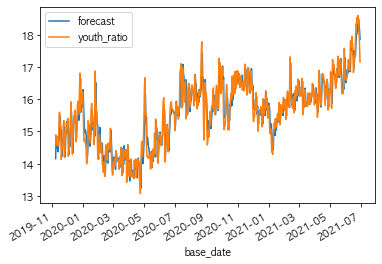

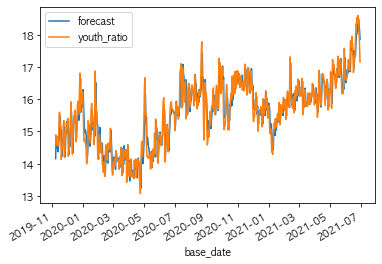

In [37]:
model_fit.plot_predict()

# market_per_cnt 예측

In [40]:
data['market_per_cnt'] = data['market_per_cnt']*100.

In [41]:
test_market_per_cnt=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_market_per_cnt=data.loc[data['emd_nm']==region,['market_per_cnt']]
    print(region)
    #읍면동 별로 auto_arima로 최적의 p,q,d 구한다.
    model_arima= auto_arima(data_market_per_cnt,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_market_per_cnt)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_market_per_cnt,order=(arima_p,arima_q,arima_d))
    
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['market_per_cnt'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['market_per_cnt'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_market_per_cnt=pd.concat([test_market_per_cnt,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=7149.704, BIC=7160.006, Time=0.014 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6487.013, BIC=6502.465, Time=0.087 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6471.847, BIC=6492.450, Time=0.094 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6468.290, BIC=6494.044, Time=0.148 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6467.341, BIC=6498.245, Time=0.533 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6490.705, BIC=6526.759, Time=0.966 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6919.019, BIC=6934.471, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6474.210, BIC=6494.813, Time=0.103 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6465.797, BIC=6491.550, Time=0.203 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6467.794, BIC=6498.698, Time=0.294 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6471.700, BIC=6507.755, Tim

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.53115D+00    |proj g|=  4.46351D-02

At iterate    7    f=  2.53099D+00    |proj g|=  3.55027D-02

At iterate    8    f=  2.53076D+00    |proj g|=  9.51852D-03

At iterate    9    f=  2.53051D+00    |proj g|=  4.01117D-02

At iterate   10    f=  2.53029D+00    |proj g|=  6.12927D-02

At iterate   11    f=  2.52989D+00    |proj g|=  4.86870D-02

At iterate   12    f=  2.52976D+00    |proj g|=  4.16702D-03

At iterate   13    f=  2.52974D+00    |proj g|=  9.75446D-03

At iterate   14    f=  2.52973D+00    |proj g|=  1.08902D-02

At iterate   15    f=  2.52973D+00    |proj g|=  1.91638D-03

At iterate   16    f=  2.52972D+00    |proj g|=  6.10889D-04

At iterate   17    f=  2.52972D+00    |proj g|=  5.13278D-04

At iterate   18    f=  2.52972D+00    |proj g|=  1.68514D-03

At iterate   19    f=  2.52972D+00    |proj g|=  8.87246D-04

At iterate   20    f=  2.52972D+00    |proj g|=  2.59348D-05

At iterate   21    f=  2.52972D+00    |proj g|=  2.07834D-05

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68144D+00    |proj g|=  4.44694D-02

At iterate    1    f=  2.68143D+00    |proj g|=  3.54521D-03

At iterate    2    f=  2.68143D+00    |proj g|=  3.03073D-03

At iterate    3    f=  2.68143D+00    |proj g|=  2.30691D-03

At iterate    4    f=  2.68143D+00    |proj g|=  3.41314D-03

At iterate    5    f=  2.68142D+00    |proj g|=  4.94320D-03

At iterate    6    f=  2.68141D+00    |proj g|=  3.65792D-03

At iterate    7    f=  2.68141D+00    |proj g|=  9.98490D-04

At iterate    8    f=  2.68140D+00    |proj g|=  1.79678D-03

At iterate    9    f=  2.68140D+00    |proj g|=  3.35465D-03

At iterate   10    f=  2.68139D+00    |proj g|=  5.63580D-03

At iterate   11    f=  2.68138D+00    |proj g|=  6.34506D-03

At iterate   12    f=  2.68137D+00    |proj g|=  3.12226D-03

At iterate   13    f=  2.6

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.37211D+00    |proj g|=  1.31354D-02

At iterate    2    f=  2.37210D+00    |proj g|=  1.22167D-02

At iterate    3    f=  2.37206D+00    |proj g|=  1.93892D-02

At iterate    4    f=  2.37204D+00    |proj g|=  3.53764D-02

At iterate    5    f=  2.37202D+00    |proj g|=  1.59790D-02

At iterate    6    f=  2.37196D+00    |proj g|=  1.22594D-02

At iterate    7    f=  2.37181D+00    |proj g|=  5.84602D-02

At iterate    8    f=  2.37150D+00    |proj g|=  1.18868D-01

At iterate    9    f=  2.37092D+00    |proj g|=  1.78121D-01

At iterate   10    f=  2.37012D+00    |proj g|=  1.72683D-01

At iterate   11    f=  2.36938D+00    |proj g|=  3.87114D-02

At iterate   12    f=  2.36927D+00    |proj g|=  1.24582D-02

At iterate   13    f=  2.36926D+00    |proj g|=  9.04850D-03

At iterate   14    f=  2.36926D+00    |proj g|=  8.04738D-03

At iterate   15    f=  2.36925D+00    |proj g|=  4.83626D-03

At iterate   16    f=  2.36925D+00    |proj g|=  1.02867D-02

At iter

ARIMA(order=(2, 1, 3), seasonal_order=(0, 0, 0, 1), suppress_warnings=True)


/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.88500D+00    |proj g|=  1.37099D-03

At iterate    1    f=  2.88500D+00    |proj g|=  7.21911D-04

At iterate    2    f=  2.88500D+00    |proj g|=  6.01119D-04

At iterate    3    f=  2.88500D+00    |proj g|=  3.08198D-04

At iterate    4    f=  2.88500D+00    |proj g|=  3.46301D-04

At iterate    5    f=  2.88500D+00    |proj g|=  2.00595D-04

At iterate    6    f=  2.88500D+00    |proj g|=  1.07070D-04

At iterate    7    f=  2.88500D+00    |proj g|=  6.44818D-05

At iterate    8    f=  2.88500D+00    |proj g|=  2.12941D-04

At iterate    9    f=  2.88500D+00    |proj g|=  3.40128D-04

At iterate   10    f=  2.88500D+00    |proj g|=  4.50129D-04

At iterate   11    f=  2.88499D+00    |proj g|=  3.71081D-04

At iterate   12    f=  2.88499D+00    |proj g|=  1.70042D-04

At iterate   13    f=  2.8

 This problem is unconstrained.


Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6377.307, BIC=6397.910, Time=0.087 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6379.139, BIC=6404.892, Time=0.109 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6380.876, BIC=6411.780, Time=0.444 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6376.512, BIC=6412.567, Time=0.497 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6703.872, BIC=6719.324, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6381.091, BIC=6401.694, Time=0.086 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6379.127, BIC=6404.880, Time=0.128 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6381.126, BIC=6412.030, Time=0.261 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6381.912, BIC=6417.967, Time=0.684 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=6605.834, BIC=6626.437, Time=0.052 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=6378.767, BIC=6404.521, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.45515D+00    |proj g|=  1.48168D-02

At iterate    7    f=  2.45509D+00    |proj g|=  7.03904D-03

At iterate    8    f=  2.45499D+00    |proj g|=  1.19837D-02

At iterate    9    f=  2.45468D+00    |proj g|=  3.38719D-02

At iterate   10    f=  2.45411D+00    |proj g|=  6.58131D-02

At iterate   11    f=  2.45295D+00    |proj g|=  1.00913D-01

At iterate   12    f=  2.45092D+00    |proj g|=  7.26113D-02

At iterate   13    f=  2.45007D+00    |proj g|=  4.76687D-02

At iterate   14    f=  2.44917D+00    |proj g|=  9.03615D-02

At iterate   15    f=  2.44893D+00    |proj g|=  5.06453D-02

At iterate   16    f=  2.44880D+00    |proj g|=  2.07755D-02

At iterate   17    f=  2.44870D+00    |proj g|=  2.39095D-02

At iterate   18    f=  2.44862D+00    |proj g|=  2.00219D-02

At iterate   19    f=  2.44858D+00    |proj g|=  6.87068D-03

At iterate   20    f=  2.44857D+00    |proj g|=  6.69838D-03

At iterate   21    f=  2.44856D+00    |proj g|=  2.42841D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.81385D+00    |proj g|=  5.21272D-04

At iterate    2    f=  2.81385D+00    |proj g|=  4.46443D-04

At iterate    3    f=  2.81385D+00    |proj g|=  1.96421D-04

At iterate    4    f=  2.81385D+00    |proj g|=  1.79812D-04

At iterate    5    f=  2.81384D+00    |proj g|=  3.88889D-04

At iterate    6    f=  2.81384D+00    |proj g|=  2.08722D-04

At iterate    7    f=  2.81384D+00    |proj g|=  2.80664D-05

At iterate    8    f=  2.81384D+00    |proj g|=  1.59872D-06

At iterate    9    f=  2.81384D+00    |proj g|=  4.44089D-08

At iterate   10    f=  2.81384D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.99285D+00    |proj g|=  1.17479D-02

At iterate    1    f=  2.99284D+00    |proj g|=  4.75708D-04

At iterate    2    f=  2.99284D+00    |proj g|=  4.58789D-04

At iterate    3    f=  2.99284D+00    |proj g|=  3.84448D-04

At iterate    4    f=  2.99284D+00    |proj g|=  6.20393D-04

At iterate    5    f=  2.99284D+00    |proj g|=  7.35456D-04

At iterate    6    f=  2.99283D+00    |proj g|=  9.70557D-04

At iterate    7    f=  2.99283D+00    |proj g|=  6.48903D-04

At iterate    8    f=  2.99283D+00    |proj g|=  4.16112D-04

At iterate    9    f=  2.99283D+00    |proj g|=  9.93428D-04

At iterate   10    f=  2.99282D+00    |proj g|=  1.98952D-03

At iterate   11    f=  2.99279D+00    |proj g|=  3.75913D-03

At iterate   12    f=  2.99273D+00    |proj g|=  7.67173D-03

At iterate   13    f=  2.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.64332D+00    |proj g|=  3.25643D+00

At iterate    1    f=  2.64287D+00    |proj g|=  1.73599D-01

At iterate    2    f=  2.64286D+00    |proj g|=  2.16448D-01

At iterate    3    f=  2.64284D+00    |proj g|=  4.75294D-01

At iterate    4    f=  2.64278D+00    |proj g|=  6.28831D-01

At iterate    5    f=  2.64275D+00    |proj g|=  3.00288D-01

At iterate    6    f=  2.64274D+00    |proj g|=  3.69966D-02

At iterate    7    f=  2.64274D+00    |proj g|=  3.36307D-02

At iterate    8    f=  2.64274D+00    |proj g|=  6.09861D-02

At iterate    9    f=  2.64274D+00    |proj g|=  1.24414D-01

At iterate   10    f=  2.64274D+00    |proj g|=  1.98431D-01

At iterate   11    f=  2.64273D+00    |proj g|=  3.28181D-01

At iterate   12    f=  2.64272D+00    |proj g|=  4.25853D-01

At iterate   13    f=  2.6


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   69    f=  2.64104D+00    |proj g|=  8.44021D-02

At iterate   70    f=  2.64104D+00    |proj g|=  3.07983D-02

At iterate   71    f=  2.64103D+00    |proj g|=  6.89799D-02

At iterate   72    f=  2.64103D+00    |proj g|=  9.00610D-02

At iterate   73    f=  2.64103D+00    |proj g|=  7.18874D-02

At iterate   74    f=  2.64103D+00    |proj g|=  5.59578D-02

At iterate   75    f=  2.64103D+00    |proj g|=  8.45914D-02

At iterate   76    f=  2.64103D+00    |proj g|=  3.84068D-02

At iterate   77    f=  2.64103D+00    |proj g|=  2.06297D-02

At iterate   78    f=  2.64103D+00    |proj g|=  1.20117D-02

At iterate   79    f=  2.64103D+00    |proj g|=  2.35452D-03

At iterate   80    f=  2.64103D+00    |proj g|=  1.26170D-03

At iterate   81    f=  2.64103D+00    |proj g|=  1.34222D-03

At iterate   82    f=  2.64103D+00    |proj g|=  7.29807D-03

At iterate   83    f=  2.64103D+00    |proj g|=  5.10516D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   84    f=  2.64103D+00    |proj g|=  2.01806D-02

At iterate   85    f=  2.64103D+00    |proj g|=  3.01295D-02

At iterate   86    f=  2.64103D+00    |proj g|=  7.19584D-03

At iterate   87    f=  2.64103D+00    |proj g|=  1.82612D-02

At iterate   88    f=  2.64103D+00    |proj g|=  4.92286D-03

At iterate   89    f=  2.64103D+00    |proj g|=  1.80311D-02

At iterate   90    f=  2.64103D+00    |proj g|=  2.29133D-02

At iterate   91    f=  2.64103D+00    |proj g|=  8.45151D-03

At iterate   92    f=  2.64103D+00    |proj g|=  3.19249D-02

At iterate   93    f=  2.64103D+00    |proj g|=  1.60113D-02

At iterate   94    f=  2.64103D+00    |proj g|=  5.47344D-03

At iterate   95    f=  2.64103D+00    |proj g|=  6.66551D-03

At iterate   96    f=  2.64103D+00    |proj g|=  4.11805D-02

At iterate   97    f=  2.64103D+00    |proj g|=  8.44831D-02

At iterate   98    f=  2.64103D+00    |proj g|=  1.26379D-01

At iterate   99    f=  2.64103D+00    |proj g|=  8.78247D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  124    f=  2.64066D+00    |proj g|=  1.16680D-03

At iterate  125    f=  2.64066D+00    |proj g|=  3.59144D-03

At iterate  126    f=  2.64066D+00    |proj g|=  3.05405D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    127    348      5     0     0   3.054D-03   2.641D+00
  F =   2.6406632418815308     

ABNORMAL_TERMINATION_IN_LNSRCH                              



 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:491: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:511: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


봉개동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=7796.880, BIC=7807.183, Time=0.009 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=7375.679, BIC=7391.134, Time=0.043 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=7317.434, BIC=7338.040, Time=0.087 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=7301.735, BIC=7327.493, Time=0.135 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=7296.318, BIC=7327.227, Time=0.449 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=7294.309, BIC=7330.369, Time=0.993 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=7581.266, BIC=7596.720, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=7299.700, BIC=7320.306, Time=0.125 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=7288.062, BIC=7313.820, Time=0.416 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=7289.264, BIC=7320.173, Time=0.484 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=7289.716, BIC=7325.777, Tim

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.85351D+00    |proj g|=  2.07629D-03

At iterate    2    f=  2.85350D+00    |proj g|=  1.64659D-03

At iterate    3    f=  2.85346D+00    |proj g|=  3.23306D-03

At iterate    4    f=  2.85340D+00    |proj g|=  4.59934D-03

At iterate    5    f=  2.85331D+00    |proj g|=  2.74416D-03

At iterate    6    f=  2.85328D+00    |proj g|=  2.82103D-03

At iterate    7    f=  2.85321D+00    |proj g|=  4.83205D-03

At iterate    8    f=  2.85313D+00    |proj g|=  6.17022D-03

At iterate    9    f=  2.85293D+00    |proj g|=  4.20157D-02

At iterate   10    f=  2.85280D+00    |proj g|=  1.23723D-01

At iterate   11    f=  2.85261D+00    |proj g|=  5.14090D-01

At iterate   12    f=  2.85225D+00    |proj g|=  3.00719D-01

At iterate   13    f=  2.85211D+00    |proj g|=  3.25365D-02

At iterate   14    f=  2.85205D+00    |proj g|=  3.50277D-02

At iterate   15    f=  2.85201D+00    |proj g|=  6.38528D-02

At iterate   16    f=  2.85195D+00    |proj g|=  2.17050D-02

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6586.569, BIC=6602.023, Time=0.050 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6480.098, BIC=6500.704, Time=0.083 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6481.297, BIC=6507.054, Time=0.146 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6481.483, BIC=6512.392, Time=0.452 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6483.437, BIC=6519.497, Time=0.525 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6903.125, BIC=6918.579, Time=0.028 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6498.081, BIC=6518.687, Time=0.169 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6481.440, BIC=6507.197, Time=0.144 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6481.292, BIC=6512.200, Time=0.389 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6482.652, BIC=6518.713, Time=0.762 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=6759.654, BIC=6780.260, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.53370D+00    |proj g|=  2.99791D-03

At iterate    1    f=  2.53370D+00    |proj g|=  6.17373D-04

At iterate    2    f=  2.53370D+00    |proj g|=  4.30189D-04

At iterate    3    f=  2.53370D+00    |proj g|=  1.17817D-04

At iterate    4    f=  2.53370D+00    |proj g|=  1.04716D-04

At iterate    5    f=  2.53370D+00    |proj g|=  1.67377D-04

At iterate    6    f=  2.53370D+00    |proj g|=  1.16973D-04

At iterate    7    f=  2.53370D+00    |proj g|=  4.88498D-05

At iterate    8    f=  2.53370D+00    |proj g|=  8.88178D-07

At iterate    9    f=  2.53370D+00    |proj g|=  8.88178D-08

At iterate   10    f=  2.53370D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    2    f=  2.60545D+00    |proj g|=  1.20198D-02

At iterate    3    f=  2.60540D+00    |proj g|=  1.56194D-02

At iterate    4    f=  2.60535D+00    |proj g|=  1.49103D-02

At iterate    5    f=  2.60520D+00    |proj g|=  2.43432D-02

At iterate    6    f=  2.60475D+00    |proj g|=  5.23513D-02

At iterate    7    f=  2.60403D+00    |proj g|=  6.99032D-02

At iterate    8    f=  2.60307D+00    |proj g|=  5.55418D-02

At iterate    9    f=  2.60267D+00    |proj g|=  3.25599D-02

At iterate   10    f=  2.60265D+00    |proj g|=  8.85239D-03

At iterate   11    f=  2.60265D+00    |proj g|=  3.86642D-03

At iterate   12    f=  2.60265D+00    |proj g|=  3.87326D-03

At iterate   13    f=  2.60265D+00    |proj g|=  4.08025D-03

At iterate   14    f=  2.60263D+00    |proj g|=  1.34936D-02

At iterate   15    f=  2.60258D+00    |proj g|=  2.23414D-02

At iterate   16    f=  2.60246D+00    |proj g|=  5.38802D-02

At iterate   17    f=  2.60222D+00    |proj g|=  6.84556D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:491: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


삼양동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=6410.285, BIC=6420.588, Time=0.009 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6007.097, BIC=6022.551, Time=0.055 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=5916.773, BIC=5937.379, Time=0.087 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=5918.105, BIC=5943.862, Time=0.160 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=5918.535, BIC=5949.444, Time=0.519 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=5920.260, BIC=5956.320, Time=0.499 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=6284.716, BIC=6300.171, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=5922.459, BIC=5943.065, Time=0.096 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=5918.237, BIC=5943.994, Time=0.118 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=5917.865, BIC=5948.774, Time=0.504 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=5918.293, BIC=5954.354, Tim

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    3    f=  2.31016D+00    |proj g|=  2.79337D-03

At iterate    4    f=  2.31015D+00    |proj g|=  7.85003D-03

At iterate    5    f=  2.31014D+00    |proj g|=  9.68541D-03

At iterate    6    f=  2.31013D+00    |proj g|=  4.04969D-03

At iterate    7    f=  2.31013D+00    |proj g|=  1.12954D-03

At iterate    8    f=  2.31013D+00    |proj g|=  3.62776D-03

At iterate    9    f=  2.31013D+00    |proj g|=  6.67559D-03

At iterate   10    f=  2.31012D+00    |proj g|=  8.27982D-03

At iterate   11    f=  2.31011D+00    |proj g|=  7.04179D-03

At iterate   12    f=  2.31010D+00    |proj g|=  4.02305D-03

At iterate   13    f=  2.31008D+00    |proj g|=  1.87104D-03

At iterate   14    f=  2.31007D+00    |proj g|=  4.56204D-03

At iterate   15    f=  2.31007D+00    |proj g|=  2.47700D-03

At iterate   16    f=  2.31007D+00    |proj g|=  6.29674D-04

At iterate   17    f=  2.31007D+00    |proj g|=  3.03224D-04

At iterate   18    f=  2.31007D+00    |proj g|=  5.04619D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  3.13716D+00    |proj g|=  6.52048D-02

At iterate    2    f=  3.13706D+00    |proj g|=  3.14953D-02

At iterate    3    f=  3.13705D+00    |proj g|=  1.44569D-03

At iterate    4    f=  3.13705D+00    |proj g|=  1.44222D-03

At iterate    5    f=  3.13705D+00    |proj g|=  1.43716D-03

At iterate    6    f=  3.13705D+00    |proj g|=  2.83733D-03

At iterate    7    f=  3.13704D+00    |proj g|=  6.01474D-03

At iterate    8    f=  3.13704D+00    |proj g|=  1.11206D-02

At iterate    9    f=  3.13702D+00    |proj g|=  2.08534D-02

At iterate   10    f=  3.13699D+00    |proj g|=  3.24197D-02

At iterate   11    f=  3.13688D+00    |proj g|=  5.02107D-02

At iterate   12    f=  3.13667D+00    |proj g|=  6.80321D-02

At iterate   13    f=  3.13659D+00    |proj g|=  6.90949D-02

At iterate   14    f=  3.13647D+00    |proj g|=  6.92359D-02

At iterate   15    f=  3.13633D+00    |proj g|=  6.40714D-02

At iterate   16    f=  3.13605D+00    |proj g|=  5.88253D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f=  2.60095D+00    |proj g|=  1.39977D-02

At iterate    3    f=  2.59982D+00    |proj g|=  1.18603D-02

At iterate    4    f=  2.59963D+00    |proj g|=  2.86591D-02

At iterate    5    f=  2.59958D+00    |proj g|=  6.82867D-02

At iterate    6    f=  2.59955D+00    |proj g|=  1.77165D-02

At iterate    7    f=  2.59955D+00    |proj g|=  2.13429D-04

At iterate    8    f=  2.59955D+00    |proj g|=  8.18901D-05

At iterate    9    f=  2.59955D+00    |proj g|=  1.77636D-06

At iterate   10    f=  2.59955D+00    |proj g|=  6.66134D-07

At iterate   11    f=  2.59955D+00    |proj g|=  4.44089D-07

At iterate   12    f=  2.59955D+00    |proj g|=  3.55271D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F   

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.98340D+00    |proj g|=  1.30926D-03

At iterate    2    f=  2.98340D+00    |proj g|=  2.26832D-03

At iterate    3    f=  2.98339D+00    |proj g|=  1.94782D-03

At iterate    4    f=  2.98338D+00    |proj g|=  7.55382D-03

At iterate    5    f=  2.98331D+00    |proj g|=  1.81280D-02

At iterate    6    f=  2.98331D+00    |proj g|=  4.80624D-03

At iterate    7    f=  2.98330D+00    |proj g|=  4.56750D-03

At iterate    8    f=  2.98330D+00    |proj g|=  6.85905D-03

At iterate    9    f=  2.98330D+00    |proj g|=  1.83878D-02

At iterate   10    f=  2.98330D+00    |proj g|=  3.10226D-02

At iterate   11    f=  2.98328D+00    |proj g|=  5.04967D-02

At iterate   12    f=  2.98325D+00    |proj g|=  6.65394D-02

At iterate   13    f=  2.98321D+00    |proj g|=  6.41947D-02

At iterate   14    f=  2.98321D+00    |proj g|=  6.05571D-02

At iterate   15    f=  2.98319D+00    |proj g|=  4.18084D-02

At iterate   16    f=  2.98317D+00    |proj g|=  8.97136D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=7450.024, BIC=7460.326, Time=0.023 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6672.524, BIC=6687.976, Time=0.080 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6671.748, BIC=6692.350, Time=0.101 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6672.908, BIC=6698.662, Time=0.230 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6673.216, BIC=6704.120, Time=0.418 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6675.207, BIC=6711.262, Time=0.860 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=7110.486, BIC=7125.938, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6671.619, BIC=6692.222, Time=0.116 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6675.118, BIC=6700.872, Time=0.128 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6673.488, BIC=6704.392, Time=0.176 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6675.144, BIC=6711.199, Time=0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.61322D+00    |proj g|=  4.03855D-03

At iterate    7    f=  2.61319D+00    |proj g|=  6.17755D-03

At iterate    8    f=  2.61318D+00    |proj g|=  8.15494D-03

At iterate    9    f=  2.61318D+00    |proj g|=  9.64162D-04

At iterate   10    f=  2.61318D+00    |proj g|=  5.83089D-05

At iterate   11    f=  2.61318D+00    |proj g|=  6.43929D-06

At iterate   12    f=  2.61318D+00    |proj g|=  1.77636D-07

At iterate   13    f=  2.61318D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     20      1     0     0   8.882D-08   2.613D+00
  F =   2.61318411144

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.26966D+00    |proj g|=  2.40771D-02

At iterate    1    f=  2.26965D+00    |proj g|=  1.71769D-03

At iterate    2    f=  2.26965D+00    |proj g|=  1.07594D-03

At iterate    3    f=  2.26965D+00    |proj g|=  2.48246D-04

At iterate    4    f=  2.26964D+00    |proj g|=  3.04468D-04

At iterate    5    f=  2.26964D+00    |proj g|=  2.91589D-04

At iterate    6    f=  2.26964D+00    |proj g|=  1.09512D-04

At iterate    7    f=  2.26964D+00    |proj g|=  6.43929D-06

At iterate    8    f=  2.26964D+00    |proj g|=  1.33227D-07

At iterate    9    f=  2.26964D+00    |proj g|=  1.15463D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Ca

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.24516D+00    |proj g|=  4.78106D-04

At iterate    2    f=  2.24516D+00    |proj g|=  3.11173D-04

At iterate    3    f=  2.24515D+00    |proj g|=  3.42260D-04

At iterate    4    f=  2.24515D+00    |proj g|=  3.06910D-04

At iterate    5    f=  2.24515D+00    |proj g|=  3.79252D-04

At iterate    6    f=  2.24515D+00    |proj g|=  2.27818D-04

At iterate    7    f=  2.24515D+00    |proj g|=  2.64366D-04

At iterate    8    f=  2.24515D+00    |proj g|=  8.63265D-04

At iterate    9    f=  2.24515D+00    |proj g|=  1.31388D-03

At iterate   10    f=  2.24515D+00    |proj g|=  1.46954D-03

At iterate   11    f=  2.24514D+00    |proj g|=  1.04943D-03

At iterate   12    f=  2.24514D+00    |proj g|=  3.40217D-04

At iterate   13    f=  2.24513D+00    |proj g|=  5.98632D-04

At iterate   14    f=  2.24512D+00    |proj g|=  2.16001D-03

At iterate   15    f=  2.24512D+00    |proj g|=  3.29234D-03

At iterate   16    f=  2.24501D+00    |proj g|=  4.11190D-02

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate   33    f=  2.23854D+00    |proj g|=  8.08081D-02

At iterate   34    f=  2.23616D+00    |proj g|=  9.12815D-02

At iterate   35    f=  2.23475D+00    |proj g|=  6.91524D-02

At iterate   36    f=  2.23354D+00    |proj g|=  2.44802D-02

At iterate   37    f=  2.23283D+00    |proj g|=  6.42547D-02

At iterate   38    f=  2.23252D+00    |proj g|=  2.99294D-02

At iterate   39    f=  2.23212D+00    |proj g|=  2.20921D-02

At iterate   40    f=  2.23177D+00    |proj g|=  7.05788D-02

At iterate   41    f=  2.23072D+00    |proj g|=  1.48981D-02

At iterate   42    f=  2.22978D+00    |proj g|=  1.94890D-01

At iterate   43    f=  2.22886D+00    |proj g|=  1.22805D-02

At iterate   44    f=  2.22825D+00    |proj g|=  7.66684D-02

At iterate   45    f=  2.22789D+00    |proj g|=  1.00667D-01

At iterate   46    f=  2.22674D+00    |proj g|=  1.80849D-01

At iterate   47    f=  2.22577D+00    |proj g|=  2.04311D-01

At iterate   48    f=  2.22384D+00    |proj g|=  1.66012D-01

At iter

Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=7438.780, BIC=7474.835, Time=0.466 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=7753.691, BIC=7769.143, Time=0.031 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=7443.472, BIC=7464.075, Time=0.091 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=7437.074, BIC=7462.828, Time=0.276 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=7435.336, BIC=7466.240, Time=0.460 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=7449.450, BIC=7485.505, Time=0.406 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=7642.857, BIC=7663.459, Time=0.047 seconds
Fit ARIMA(2,1,1)x(0,0,0,1) [intercept=True]; AIC=7441.846, BIC=7467.600, Time=0.131 seconds
Fit ARIMA(2,1,2)x(0,0,0,1) [intercept=True]; AIC=7445.137, BIC=7476.041, Time=0.224 seconds
Fit ARIMA(2,1,3)x(0,0,0,1) [intercept=True]; AIC=7441.069, BIC=7477.124, Time=0.439 seconds
Fit ARIMA(3,1,0)x(0,0,0,1) [intercept=True]; AIC=7575.551, BIC=7601.304, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.91666D+00    |proj g|=  7.30696D-03

At iterate    1    f=  2.91665D+00    |proj g|=  3.32063D-03

At iterate    2    f=  2.91664D+00    |proj g|=  3.20868D-03

At iterate    3    f=  2.91661D+00    |proj g|=  1.06119D-02

At iterate    4    f=  2.91656D+00    |proj g|=  1.63449D-02

At iterate    5    f=  2.91648D+00    |proj g|=  1.55626D-02

At iterate    6    f=  2.91633D+00    |proj g|=  1.68718D-02

At iterate    7    f=  2.91628D+00    |proj g|=  4.90559D-03

At iterate    8    f=  2.91624D+00    |proj g|=  7.82885D-04

At iterate    9    f=  2.91624D+00    |proj g|=  4.77618D-04

At iterate   10    f=  2.91624D+00    |proj g|=  1.13465D-04

At iterate   11    f=  2.91624D+00    |proj g|=  1.11511D-04

At iterate   12    f=  2.91624D+00    |proj g|=  1.36380D-04

At iterate   13    f=  2.9

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



e   14    f=  2.98053D+00    |proj g|=  1.14708D-04

At iterate   15    f=  2.98053D+00    |proj g|=  1.43885D-05

At iterate   16    f=  2.98053D+00    |proj g|=  8.65974D-06

At iterate   17    f=  2.98053D+00    |proj g|=  4.52971D-06

At iterate   18    f=  2.98053D+00    |proj g|=  4.44089D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     29      1     0     0   4.441D-06   2.981D+00
  F =   2.9805329900022981     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6396.451, BIC=6411.906, Time=0.112 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [in

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.47591D+00    |proj g|=  6.44995D-04

At iterate    2    f=  2.47591D+00    |proj g|=  4.75886D-04

At iterate    3    f=  2.47591D+00    |proj g|=  2.54641D-04

At iterate    4    f=  2.47591D+00    |proj g|=  2.44382D-04

At iterate    5    f=  2.47590D+00    |proj g|=  3.68061D-04

At iterate    6    f=  2.47590D+00    |proj g|=  2.80398D-04

At iterate    7    f=  2.47590D+00    |proj g|=  2.97051D-04

At iterate    8    f=  2.47590D+00    |proj g|=  2.89546D-05

At iterate    9    f=  2.47590D+00    |proj g|=  4.08562D-06

At iterate   10    f=  2.47590D+00    |proj g|=  1.77636D-07

At iterate   11    f=  2.47590D+00    |proj g|=  4.44089D-08

At iterate   12    f=  2.47590D+00    |proj g|=  8.88178D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f=  2.45327D+00    |proj g|=  1.30984D-03

At iterate    6    f=  2.45326D+00    |proj g|=  1.60814D-03

At iterate    7    f=  2.45326D+00    |proj g|=  6.42242D-04

At iterate    8    f=  2.45326D+00    |proj g|=  5.57332D-05

At iterate    9    f=  2.45326D+00    |proj g|=  4.08562D-06

At iterate   10    f=  2.45326D+00    |proj g|=  3.10862D-07

At iterate   11    f=  2.45326D+00    |proj g|=  1.77636D-07

At iterate   12    f=  2.45326D+00    |proj g|=  1.33227D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     12     18      1     0     0   1.332D-07   2.453D+00
  F =   2.45325511064

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    4    f=  2.70665D+00    |proj g|=  7.76934D-04

At iterate    5    f=  2.70665D+00    |proj g|=  1.51603D-03

At iterate    6    f=  2.70663D+00    |proj g|=  2.79758D-03

At iterate    7    f=  2.70660D+00    |proj g|=  4.50111D-03

At iterate    8    f=  2.70655D+00    |proj g|=  5.34262D-03

At iterate    9    f=  2.70648D+00    |proj g|=  4.18661D-03

At iterate   10    f=  2.70645D+00    |proj g|=  2.53384D-03

At iterate   11    f=  2.70645D+00    |proj g|=  1.67297D-03

At iterate   12    f=  2.70644D+00    |proj g|=  6.34293D-04

At iterate   13    f=  2.70644D+00    |proj g|=  5.35749D-04

At iterate   14    f=  2.70644D+00    |proj g|=  2.72165D-03

At iterate   15    f=  2.70644D+00    |proj g|=  1.73923D-03

At iterate   16    f=  2.70644D+00    |proj g|=  9.34941D-04

At iterate   17    f=  2.70643D+00    |proj g|=  9.97957D-04

At iterate   18    f=  2.70641D+00    |proj g|=  2.69740D-03

At iterate   19    f=  2.70622D+00    |proj g|=  7.32570D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  143    f=  2.69636D+00    |proj g|=  7.98472D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    143    220      1     0     0   7.985D-05   2.696D+00
  F =   2.6963606883195870     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
용담2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=7086.873, BIC=7097.176, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6606.142, BIC=6621.597, Time=0.054 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6528.511, BIC=6549.117, Time=0.085 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6529.880, BIC=6555.637, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.54627D+00    |proj g|=  5.95484D-03

At iterate    1    f=  2.54627D+00    |proj g|=  1.61315D-03

At iterate    2    f=  2.54626D+00    |proj g|=  1.42877D-03

At iterate    3    f=  2.54626D+00    |proj g|=  3.71481D-04

At iterate    4    f=  2.54626D+00    |proj g|=  3.45590D-04

At iterate    5    f=  2.54626D+00    |proj g|=  1.41887D-04

At iterate    6    f=  2.54626D+00    |proj g|=  1.69242D-04

At iterate    7    f=  2.54626D+00    |proj g|=  1.47837D-04

At iterate    8    f=  2.54626D+00    |proj g|=  1.09734D-04

At iterate    9    f=  2.54626D+00    |proj g|=  9.37472D-05

At iterate   10    f=  2.54626D+00    |proj g|=  1.78968D-05

At iterate   11    f=  2.54626D+00    |proj g|=  1.19904D-06

At iterate   12    f=  2.54626D+00    |proj g|=  1.33227D-07

At iterate   13    f=  2.5

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.54965D+00    |proj g|=  6.66267D-04

At iterate    2    f=  2.54965D+00    |proj g|=  3.71037D-04

At iterate    3    f=  2.54965D+00    |proj g|=  2.71960D-04

At iterate    4    f=  2.54965D+00    |proj g|=  3.41549D-04

At iterate    5    f=  2.54964D+00    |proj g|=  4.11715D-04

At iterate    6    f=  2.54964D+00    |proj g|=  2.98961D-04

At iterate    7    f=  2.54964D+00    |proj g|=  1.33227D-04

At iterate    8    f=  2.54964D+00    |proj g|=  8.77964D-05

At iterate    9    f=  2.54964D+00    |proj g|=  1.55786D-04

At iterate   10    f=  2.54964D+00    |proj g|=  3.64508D-04

At iterate   11    f=  2.54964D+00    |proj g|=  6.57918D-04

At iterate   12    f=  2.54964D+00    |proj g|=  1.23253D-03

At iterate   13    f=  2.54963D+00    |proj g|=  2.42539D-03

At iterate   14    f=  2.54962D+00    |proj g|=  3.63300D-03

At iterate   15    f=  2.54960D+00    |proj g|=  4.63398D-03

At iterate   16    f=  2.54960D+00    |proj g|=  7.49631D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.14620D+00    |proj g|=  2.82694D-03

At iterate    2    f=  2.14619D+00    |proj g|=  2.90012D-03

At iterate    3    f=  2.14603D+00    |proj g|=  3.05871D-03

At iterate    4    f=  2.14590D+00    |proj g|=  4.21196D-03

At iterate    5    f=  2.14585D+00    |proj g|=  4.27032D-03

At iterate    6    f=  2.14580D+00    |proj g|=  3.96216D-04

At iterate    7    f=  2.14580D+00    |proj g|=  8.91731D-05

At iterate    8    f=  2.14580D+00    |proj g|=  4.57856D-05

At iterate    9    f=  2.14580D+00    |proj g|=  1.63869D-05

At iterate   10    f=  2.14580D+00    |proj g|=  8.61533D-06

At iterate   11    f=  2.14580D+00    |proj g|=  1.15463D-06

At iterate   12    f=  2.14580D+00    |proj g|=  3.55271D-07

At iterate   13    f=  2.14580D+00    |proj g|=  3.10862D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    6    f=  2.84792D+00    |proj g|=  6.20037D-04

At iterate    7    f=  2.84792D+00    |proj g|=  2.06382D-03

At iterate    8    f=  2.84792D+00    |proj g|=  3.89160D-03

At iterate    9    f=  2.84791D+00    |proj g|=  6.55467D-03

At iterate   10    f=  2.84791D+00    |proj g|=  7.26232D-03

At iterate   11    f=  2.84791D+00    |proj g|=  3.41251D-03

At iterate   12    f=  2.84790D+00    |proj g|=  6.36025D-04

At iterate   13    f=  2.84790D+00    |proj g|=  3.69926D-05

At iterate   14    f=  2.84790D+00    |proj g|=  2.26485D-06

At iterate   15    f=  2.84790D+00    |proj g|=  1.50990D-06

At iterate   16    f=  2.84790D+00    |proj g|=  1.33227D-07

At iterate   17    f=  2.84790D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.89472D+00    |proj g|=  2.25098D-02

At iterate    1    f=  2.89470D+00    |proj g|=  1.26801D-03

At iterate    2    f=  2.89470D+00    |proj g|=  1.27285D-03

At iterate    3    f=  2.89468D+00    |proj g|=  1.23328D-03

At iterate    4    f=  2.89465D+00    |proj g|=  1.83893D-03

At iterate    5    f=  2.89456D+00    |proj g|=  3.36606D-03

At iterate    6    f=  2.89445D+00    |proj g|=  5.69673D-03

At iterate    7    f=  2.89425D+00    |proj g|=  4.00262D-03

At iterate    8    f=  2.89402D+00    |proj g|=  3.19940D-03

At iterate    9    f=  2.89377D+00    |proj g|=  7.28915D-03

At iterate   10    f=  2.89340D+00    |proj g|=  7.93103D-03

At iterate   11    f=  2.89263D+00    |proj g|=  1.24741D-02

At iterate   12    f=  2.89231D+00    |proj g|=  7.15810D-03

At iterate   13    f=  2.89187D+00    |proj g|=  1.04432D-02

At iterate   14    f=  2.89186D+00    |

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.27555D+00    |proj g|=  1.47575D-03

At iterate    2    f=  2.27554D+00    |proj g|=  9.63940D-04

At iterate    3    f=  2.27554D+00    |proj g|=  1.28670D-03

At iterate    4    f=  2.27553D+00    |proj g|=  1.83262D-03

At iterate    5    f=  2.27551D+00    |proj g|=  2.10405D-03

At iterate    6    f=  2.27548D+00    |proj g|=  1.85101D-03

At iterate    7    f=  2.27545D+00    |proj g|=  1.17302D-03

At iterate    8    f=  2.27544D+00    |proj g|=  9.34675D-04

At iterate    9    f=  2.27543D+00    |proj g|=  1.05103D-03

At iterate   10    f=  2.27543D+00    |proj g|=  4.91962D-04

At iterate   11    f=  2.27543D+00    |proj g|=  8.30447D-05

At iterate   12    f=  2.27543D+00    |proj g|=  1.05693D-05

At iterate   13    f=  2.27543D+00    |proj g|=  4.88498D-07

At iterate   14    f=  2.27543D+00    |proj g|=  1.84297D-05

At iterate   15    f=  2.27543D+00    |proj g|=  7.19425D-06

At iterate   16    f=  2.27543D+00    |proj g|=  1.37668D-06

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f=  3.21484D+00    |proj g|=  3.17861D-03

At iterate    3    f=  3.21467D+00    |proj g|=  6.27995D-03

At iterate    4    f=  3.21436D+00    |proj g|=  1.19144D-02

At iterate    5    f=  3.21352D+00    |proj g|=  2.14488D-02

At iterate    6    f=  3.21200D+00    |proj g|=  2.87158D-02

At iterate    7    f=  3.21039D+00    |proj g|=  2.18838D-02

At iterate    8    f=  3.20966D+00    |proj g|=  2.75505D-02

At iterate    9    f=  3.20963D+00    |proj g|=  1.79381D-01

At iterate   10    f=  3.20957D+00    |proj g|=  9.51150D-02

At iterate   11    f=  3.20939D+00    |proj g|=  2.16307D-02

At iterate   12    f=  3.20938D+00    |proj g|=  9.41016D-03

At iterate   13    f=  3.20938D+00    |proj g|=  4.76064D-04

At iterate   14    f=  3.20938D+00    |proj g|=  4.55724D-04

At iterate   15    f=  3.20938D+00    |proj g|=  1.53992D-03

At iterate   16    f=  3.20938D+00    |proj g|=  2.73634D-03

At iterate   17    f=  3.20938D+00    |proj g|=  3.48832D-03

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.68216D+00    |proj g|=  5.93497D-02

At iterate    1    f=  2.68216D+00    |proj g|=  9.71045D-04

At iterate    2    f=  2.68216D+00    |proj g|=  9.69003D-04

At iterate    3    f=  2.68216D+00    |proj g|=  6.91460D-03

At iterate    4    f=  2.68216D+00    |proj g|=  1.43062D-02

At iterate    5    f=  2.68216D+00    |proj g|=  2.38074D-02

At iterate    6    f=  2.68216D+00    |proj g|=  2.92151D-02

At iterate    7    f=  2.68216D+00    |proj g|=  2.22798D-02

At iterate    8    f=  2.68216D+00    |proj g|=  8.01825D-03

At iterate    9    f=  2.68216D+00    |proj g|=  6.94467D-04

At iterate   10    f=  2.68216D+00    |proj g|=  4.09761D-04

At iterate   11    f=  2.68216D+00    |proj g|=  5.28955D-04

At iterate   12    f=  2.68216D+00    |proj g|=  1.28164D-03

At iterate   13    f=  2.68216D+00    |proj g|=  2.34737D-03

At iterat


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  109    f=  2.68122D+00    |proj g|=  2.95453D-04

At iterate  110    f=  2.68122D+00    |proj g|=  5.59783D-03

At iterate  111    f=  2.68122D+00    |proj g|=  8.57145D-03

At iterate  112    f=  2.68122D+00    |proj g|=  2.79221D-03

At iterate  113    f=  2.68122D+00    |proj g|=  1.41460D-03

At iterate  114    f=  2.68122D+00    |proj g|=  2.44986D-03

At iterate  115    f=  2.68122D+00    |proj g|=  6.02398D-03

At iterate  116    f=  2.68122D+00    |proj g|=  8.77591D-03

At iterate  117    f=  2.68122D+00    |proj g|=  9.15237D-03

At iterate  118    f=  2.68122D+00    |proj g|=  4.46412D-03

At iterate  119    f=  2.68122D+00    |proj g|=  8.17879D-04

At iterate  120    f=  2.68122D+00    |proj g|=  2.16271D-05

At iterate  121    f=  2.68122D+00    |proj g|=  2.56239D-05

At iterate  122    f=  2.68122D+00    |proj g|=  2.42029D-05

At iterate  123    f=  2.68122D+00    |proj g|=  3.14415D-04

At iterate  124    f=  2.68122D+00    |proj g|=  7.60458D-04

At iter


At iterate  259    f=  2.67745D+00    |proj g|=  1.47493D-02

At iterate  260    f=  2.67745D+00    |proj g|=  1.34466D-02

At iterate  261    f=  2.67745D+00    |proj g|=  8.77431D-04

At iterate  262    f=  2.67745D+00    |proj g|=  9.11982D-04

At iterate  263    f=  2.67745D+00    |proj g|=  1.95270D-03

At iterate  264    f=  2.67744D+00    |proj g|=  1.34643D-02

At iterate  265    f=  2.67744D+00    |proj g|=  3.08477D-02

At iterate  266    f=  2.67744D+00    |proj g|=  3.80211D-03

At iterate  267    f=  2.67744D+00    |proj g|=  2.60556D-02

At iterate  268    f=  2.67744D+00    |proj g|=  2.98443D-02

At iterate  269    f=  2.67744D+00    |proj g|=  1.77045D-03

At iterate  270    f=  2.67744D+00    |proj g|=  2.63913D-03

At iterate  271    f=  2.67743D+00    |proj g|=  7.17848D-03

At iterate  272    f=  2.67743D+00    |proj g|=  9.32943D-04

At iterate  273    f=  2.67743D+00    |proj g|=  1.62532D-03

At iterate  274    f=  2.67743D+00    |proj g|=  8.46656D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.



At iterate  279    f=  2.67743D+00    |proj g|=  7.96283D-03

At iterate  280    f=  2.67743D+00    |proj g|=  9.08122D-03

At iterate  281    f=  2.67743D+00    |proj g|=  9.28146D-04

At iterate  282    f=  2.67743D+00    |proj g|=  8.77840D-03

At iterate  283    f=  2.67743D+00    |proj g|=  7.03357D-03

At iterate  284    f=  2.67743D+00    |proj g|=  1.06026D-03

At iterate  285    f=  2.67743D+00    |proj g|=  6.31752D-03

At iterate  286    f=  2.67743D+00    |proj g|=  3.32729D-02

At iterate  287    f=  2.67743D+00    |proj g|=  3.32729D-02

At iterate  288    f=  2.67743D+00    |proj g|=  2.28053D-02

At iterate  289    f=  2.67743D+00    |proj g|=  6.11378D-04

At iterate  290    f=  2.67743D+00    |proj g|=  1.19389D-02

At iterate  291    f=  2.67743D+00    |proj g|=  2.52318D-03

At iterate  292    f=  2.67742D+00    |proj g|=  3.62563D-03

At iterate  293    f=  2.67742D+00    |proj g|=  4.19664D-04

At iterate  294    f=  2.67742D+00    |proj g|=  8.20988D-04

At iter


 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate  296    f=  2.67742D+00    |proj g|=  4.68514D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6    296    574      4     0     0   4.685D-04   2.677D+00
  F =   2.6774249688791634     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
중앙동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=8516.490, BIC=8526.791, Time=0.008 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=7930.997, BIC=7946.449, Time=0.063 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=7893.096, BIC=7913.699, Time=0.133 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=7892.869, BIC=7918.623, Time=0.1

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08740D+00    |proj g|=  3.92230D-01

At iterate    1    f=  3.08736D+00    |proj g|=  3.57645D-02

At iterate    2    f=  3.08736D+00    |proj g|=  2.19527D-03

At iterate    3    f=  3.08736D+00    |proj g|=  5.92291D-03

At iterate    4    f=  3.08736D+00    |proj g|=  3.52741D-02

At iterate    5    f=  3.08736D+00    |proj g|=  7.09693D-02

At iterate    6    f=  3.08736D+00    |proj g|=  1.10079D-01

At iterate    7    f=  3.08735D+00    |proj g|=  1.17697D-01

At iterate    8    f=  3.08735D+00    |proj g|=  7.02563D-02

At iterate    9    f=  3.08735D+00    |proj g|=  1.77604D-02

At iterate   10    f=  3.08735D+00    |proj g|=  7.48557D-04

At iterate   11    f=  3.08735D+00    |proj g|=  5.09193D-04

At iterate   12    f=  3.08735D+00    |proj g|=  4.30544D-04

At iterate   13    f=  3.0

 This problem is unconstrained.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04310D+00    |proj g|=  1.08802D-04

At iterate    1    f=  3.04310D+00    |proj g|=  9.80105D-05

At iterate    2    f=  3.04309D+00    |proj g|=  9.56568D-05

At iterate    3    f=  3.04309D+00    |proj g|=  1.85185D-05

At iterate    4    f=  3.04309D+00    |proj g|=  1.19904D-06

At iterate    5    f=  3.04309D+00    |proj g|=  1.28786D-06

At iterate    6    f=  3.04309D+00    |proj g|=  2.35367D-06

At iterate    7    f=  3.04309D+00    |proj g|=  2.93099D-06

At iterate    8    f=  3.04309D+00    |proj g|=  2.08722D-06

At iterate    9    f=  3.04309D+00    |proj g|=  4.88498D-07

At iterate   10    f=  3.04309D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=6812.782, BIC=6828.234, Time=0.081 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=6781.341, BIC=6801.944, Time=0.104 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=6782.203, BIC=6807.956, Time=0.175 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=6767.117, BIC=6798.021, Time=0.484 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=6768.535, BIC=6804.590, Time=0.780 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=7161.496, BIC=7176.948, Time=0.034 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=6778.726, BIC=6799.329, Time=0.128 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=6773.657, BIC=6799.411, Time=0.298 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=6785.058, BIC=6815.962, Time=0.176 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=6768.703, BIC=6804.758, Time=0.728 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=6998.408, BIC=7019.011, Time=0.

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.65130D+00    |proj g|=  9.18656D-03

At iterate    2    f=  2.65121D+00    |proj g|=  7.91727D-03

At iterate    3    f=  2.65086D+00    |proj g|=  4.49694D-03

At iterate    4    f=  2.65077D+00    |proj g|=  4.29972D-03

At iterate    5    f=  2.65013D+00    |proj g|=  7.35576D-03

At iterate    6    f=  2.64945D+00    |proj g|=  9.42944D-03

At iterate    7    f=  2.64888D+00    |proj g|=  2.55804D-02

At iterate    8    f=  2.64883D+00    |proj g|=  9.40414D-02

At iterate    9    f=  2.64878D+00    |proj g|=  1.42927D-02

At iterate   10    f=  2.64878D+00    |proj g|=  2.22879D-03

At iterate   11    f=  2.64878D+00    |proj g|=  6.21498D-03

At iterate   12    f=  2.64877D+00    |proj g|=  5.66835D-03

At iterate   13    f=  2.64877D+00    |proj g|=  1.25322D-04

At iterate   14    f=  2.64877D+00    |proj g|=  1.82254D-04

At iterate   15    f=  2.64877D+00    |proj g|=  5.07150D-05

At iterate   16    f=  2.64877D+00    |proj g|=  2.77467D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.29138D+00    |proj g|=  2.90701D-04

At iterate    2    f=  2.29138D+00    |proj g|=  2.50289D-04

At iterate    3    f=  2.29138D+00    |proj g|=  4.93738D-04

At iterate    4    f=  2.29138D+00    |proj g|=  2.53042D-04

At iterate    5    f=  2.29138D+00    |proj g|=  1.24389D-04

At iterate    6    f=  2.29138D+00    |proj g|=  7.06546D-05

At iterate    7    f=  2.29138D+00    |proj g|=  1.19726D-04

At iterate    8    f=  2.29138D+00    |proj g|=  1.50369D-04

At iterate    9    f=  2.29138D+00    |proj g|=  1.62093D-05

At iterate   10    f=  2.29138D+00    |proj g|=  1.11022D-06

At iterate   11    f=  2.29138D+00    |proj g|=  4.44089D-08

At iterate   12    f=  2.29138D+00    |proj g|=  4.44089D-08

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate    1    f=  2.93577D+00    |proj g|=  2.71299D-03

At iterate    2    f=  2.93576D+00    |proj g|=  2.62235D-03

At iterate    3    f=  2.93575D+00    |proj g|=  2.40341D-04

At iterate    4    f=  2.93575D+00    |proj g|=  2.13021D-03

At iterate    5    f=  2.93575D+00    |proj g|=  1.77391D-03

At iterate    6    f=  2.93575D+00    |proj g|=  4.63185D-05

At iterate    7    f=  2.93575D+00    |proj g|=  1.33227D-07

At iterate    8    f=  2.93575D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     20      1     0     0   0.000D+00   2.936D+00
  F =   2.935746854136

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f=  2.15804D+00    |proj g|=  1.45479D-03

At iterate    2    f=  2.15803D+00    |proj g|=  1.20304D-03

At iterate    3    f=  2.15802D+00    |proj g|=  8.17035D-04

At iterate    4    f=  2.15802D+00    |proj g|=  8.22853D-04

At iterate    5    f=  2.15801D+00    |proj g|=  1.21854D-03

At iterate    6    f=  2.15800D+00    |proj g|=  8.26805D-04

At iterate    7    f=  2.15800D+00    |proj g|=  4.33786D-04

At iterate    8    f=  2.15800D+00    |proj g|=  3.64153D-05

At iterate    9    f=  2.15800D+00    |proj g|=  1.82077D-06

At iterate   10    f=  2.15800D+00    |proj g|=  3.10862D-07

At iterate   11    f=  2.15800D+00    |proj g|=  4.44089D-08

At iterate   12    f=  2.15800D+00    |proj g|=  0.00000D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f=  2.19737D+00    |proj g|=  2.52678D-03

At iterate    3    f=  2.19735D+00    |proj g|=  1.98694D-03

At iterate    4    f=  2.19733D+00    |proj g|=  2.91198D-03

At iterate    5    f=  2.19727D+00    |proj g|=  5.18994D-03

At iterate    6    f=  2.19716D+00    |proj g|=  6.42566D-03

At iterate    7    f=  2.19698D+00    |proj g|=  6.67528D-03

At iterate    8    f=  2.19650D+00    |proj g|=  8.33169D-03

At iterate    9    f=  2.19552D+00    |proj g|=  1.27304D-02

At iterate   10    f=  2.19462D+00    |proj g|=  1.11568D-02

At iterate   11    f=  2.19343D+00    |proj g|=  2.35607D-02

At iterate   12    f=  2.19236D+00    |proj g|=  2.49063D-01

At iterate   13    f=  2.19214D+00    |proj g|=  2.31186D-02

At iterate   14    f=  2.19192D+00    |proj g|=  5.31536D-01

At iterate   15    f=  2.19168D+00    |proj g|=  1.53026D-01

At iterate   16    f=  2.19161D+00    |proj g|=  4.20837D-03

At iterate   17    f=  2.19156D+00    |proj g|=  6.35020D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.49860D+00    |proj g|=  2.80589D-03

At iterate    2    f=  2.49858D+00    |proj g|=  2.08389D-03

At iterate    3    f=  2.49853D+00    |proj g|=  1.78653D-03

At iterate    4    f=  2.49851D+00    |proj g|=  1.88960D-03

At iterate    5    f=  2.49847D+00    |proj g|=  8.19966D-04

At iterate    6    f=  2.49847D+00    |proj g|=  9.12159D-05

At iterate    7    f=  2.49847D+00    |proj g|=  2.01172D-05

At iterate    8    f=  2.49847D+00    |proj g|=  3.81917D-06

At iterate    9    f=  2.49847D+00    |proj g|=  4.44089D-07

At iterate   10    f=  2.49847D+00    |proj g|=  4.44089D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    0    f=  2.39600D+00    |proj g|=  4.52740D-02

At iterate    1    f=  2.39596D+00    |proj g|=  5.54912D-03

At iterate    2    f=  2.39594D+00    |proj g|=  4.71649D-03

At iterate    3    f=  2.39587D+00    |proj g|=  7.37899D-04

At iterate    4    f=  2.39586D+00    |proj g|=  6.24656D-04

At iterate    5    f=  2.39586D+00    |proj g|=  7.07479D-04

At iterate    6    f=  2.39585D+00    |proj g|=  5.79670D-04

At iterate    7    f=  2.39585D+00    |proj g|=  5.03819D-04

At iterate    8    f=  2.39585D+00    |proj g|=  4.56080D-05

At iterate    9    f=  2.39585D+00    |proj g|=  1.32339D-05

At iterate   10    f=  2.39585D+00    |proj g|=  1.73195D-06

At iterate   11    f=  2.39585D+00    |proj g|=  1.33227D-07

At iterate   12    f=  2.39585D+00    |proj g|=  2.22045D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f=  2.76302D+00    |proj g|=  5.38782D-03

At iterate    2    f=  2.76291D+00    |proj g|=  5.04130D-03

At iterate    3    f=  2.76246D+00    |proj g|=  1.00303D-02

At iterate    4    f=  2.76194D+00    |proj g|=  5.48043D-02

At iterate    5    f=  2.76186D+00    |proj g|=  6.05509D-02

At iterate    6    f=  2.76182D+00    |proj g|=  8.59246D-03

At iterate    7    f=  2.76182D+00    |proj g|=  1.52811D-04

At iterate    8    f=  2.76182D+00    |proj g|=  7.03881D-05

At iterate    9    f=  2.76182D+00    |proj g|=  2.30926D-06

At iterate   10    f=  2.76182D+00    |proj g|=  1.77636D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

In [42]:
test_market_per_cnt

,emd_nm,market_per_cnt
2021-07-01,건입동,28.271897
2021-07-02,건입동,28.187226
2021-07-03,건입동,28.358456
2021-07-04,건입동,28.346420
2021-07-05,건입동,28.253238
...,...,...
2021-09-14,한경면,29.283332
2021-09-15,한경면,29.283816
2021-09-16,한경면,29.284300
2021-09-17,한경면,29.284784


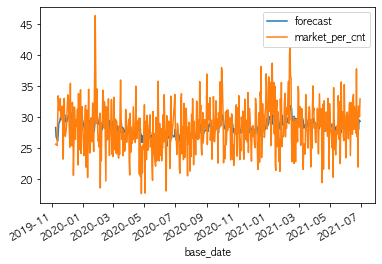

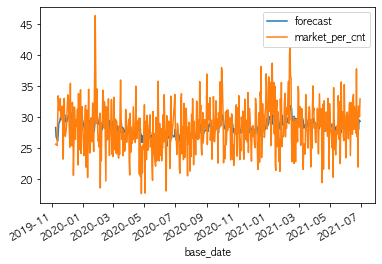

In [43]:
model_fit.plot_predict()

# delivery_per_cnt 예측

In [46]:
data['delivery_per_cnt_real'] = data['delivery_per_cnt']/100.

In [47]:
test_delivery_per_cnt=pd.DataFrame(columns=['emd_nm'])
for region in emd_list:
    data_delivery_per_cnt=data.loc[data['emd_nm']==region,['delivery_per_cnt_real']]
    print(region)
    
    model_arima= auto_arima(data_delivery_per_cnt,trace=True, error_action='ignore',suppress_warnings=True,stepwise=False,seasonal=True)
    auto=model_arima.fit(data_delivery_per_cnt)
    print(auto)
    arima_p=str(auto)[13]
    arima_p=int(arima_p)
    arima_q=str(auto)[16]
    arima_q=int(arima_q)
    arima_d=str(auto)[19]
    arima_d=int(arima_d)
    if arima_p < 1:
        arima_p = 1
    model=ARIMA(data_delivery_per_cnt,order=(arima_p,arima_q,arima_d))
    
    model_fit=model.fit(trand='nc',full_output=True,disp=1)
    fore=model_fit.forecast(steps=80)
    if region=='일도1동':
        forecast=pd.DataFrame(fore[0],columns=['delivery_per_cnt'],index=pd.date_range('2021-06-19',periods=len(fore[0])))
    else:
        forecast=pd.DataFrame(fore[0],columns=['delivery_per_cnt'],index=pd.date_range('2021-07-01',periods=len(fore[0])))
    forecast['emd_nm']=region
    test_delivery_per_cnt=pd.concat([test_delivery_per_cnt,forecast])

건입동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6887.281, BIC=-6876.979, Time=0.054 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7446.350, BIC=-7430.897, Time=0.163 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7472.007, BIC=-7451.405, Time=0.184 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7475.806, BIC=-7450.053, Time=0.356 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7437.554, BIC=-7406.650, Time=0.666 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7465.526, BIC=-7429.471, Time=0.568 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7078.287, BIC=-7062.835, Time=0.058 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7484.438, BIC=-7463.835, Time=0.345 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7479.088, BIC=-7453.334, Time=0.375 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7441.673, BIC=-7410.768, Time=0.380 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7107.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


남원읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7948.880, BIC=-7938.579, Time=0.064 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8639.470, BIC=-8624.017, Time=0.218 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8621.842, BIC=-8601.239, Time=0.233 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8644.933, BIC=-8619.180, Time=0.357 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8542.143, BIC=-8511.239, Time=0.629 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8624.620, BIC=-8588.565, Time=0.788 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-8227.103, BIC=-8211.650, Time=0.074 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8521.019, BIC=-8500.416, Time=0.134 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8645.448, BIC=-8619.695, Time=0.367 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8641.531, BIC=-8610.627, Time=0.351 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8617.2

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f= -3.39680D+00    |proj g|=  3.66023D-02

At iterate    4    f= -3.39680D+00    |proj g|=  2.63866D-01

At iterate    5    f= -3.39680D+00    |proj g|=  5.62072D-01

At iterate    6    f= -3.39680D+00    |proj g|=  1.04587D+00

At iterate    7    f= -3.39680D+00    |proj g|=  1.66357D+00

At iterate    8    f= -3.39681D+00    |proj g|=  2.20203D+00

At iterate    9    f= -3.39681D+00    |proj g|=  2.05081D+00

At iterate   10    f= -3.39681D+00    |proj g|=  1.04163D+00

At iterate   11    f= -3.39681D+00    |proj g|=  2.08058D-01

At iterate   12    f= -3.39681D+00    |proj g|=  4.55711D-03

At iterate   13    f= -3.39681D+00    |proj g|=  1.86393D-03

At iterate   14    f= -3.39681D+00    |proj g|=  1.86384D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7629.842, BIC=-7619.539, Time=0.058 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8004.648, BIC=-7989.194, Time=0.180 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8089.061, BIC=-8068.455, Time=0.282 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8108.287, BIC=-8082.529, Time=0.152 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8115.375, BIC=-8084.466, Time=0.844 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8154.735, BIC=-8118.675, Time=0.961 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7771.823, BIC=-7756.369, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8102.751, BIC=-8082.145, Time=0.289 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8069.109, BIC=-8043.351, Time=0.276 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8105.935, BIC=-8075.026, Time=0.222 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7564.683, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


대륜동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7155.400, BIC=-7145.099, Time=0.050 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7782.621, BIC=-7767.169, Time=0.156 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7772.836, BIC=-7752.233, Time=0.241 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7793.121, BIC=-7767.367, Time=0.292 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7670.583, BIC=-7639.678, Time=0.626 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7747.495, BIC=-7711.440, Time=0.523 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7437.633, BIC=-7422.181, Time=0.061 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7795.265, BIC=-7774.662, Time=0.364 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7785.059, BIC=-7759.306, Time=0.220 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7790.070, BIC=-7759.166, Time=0.194 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7780.7

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f= -3.08150D+00    |proj g|=  2.68825D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   2.688D-03  -3.081D+00
  F =  -3.0814950564779426     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
대정읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-8635.298, BIC=-8624.996, Time=0.037 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-9248.336, BIC=-9232.884, Time=0.151 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-9250.234, BIC=-9229.632, Time=0.228 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-9244.519, BIC=-9218.765, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f= -3.63552D+00    |proj g|=  2.42530D-03

At iterate    4    f= -3.63552D+00    |proj g|=  1.01819D-02

At iterate    5    f= -3.63552D+00    |proj g|=  2.34468D-02

At iterate    6    f= -3.63552D+00    |proj g|=  4.44553D-02

At iterate    7    f= -3.63552D+00    |proj g|=  7.86081D-02

At iterate    8    f= -3.63552D+00    |proj g|=  1.33399D-01

At iterate    9    f= -3.63552D+00    |proj g|=  2.21566D-01

At iterate   10    f= -3.63552D+00    |proj g|=  3.59487D-01

At iterate   11    f= -3.63552D+00    |proj g|=  5.65738D-01

At iterate   12    f= -3.63552D+00    |proj g|=  8.35240D-01

At iterate   13    f= -3.63552D+00    |proj g|=  1.06115D+00

At iterate   14    f= -3.63552D+00    |proj g|=  9.79633D-01

At iterate   15    f= -3.63552D+00    |proj g|=  5.05792D-01

At iterate   16    f= -3.63552D+00    |proj g|=  1.03795D-01

At iterate   17    f= -3.63552D+00    |proj g|=  1.98468D-03

At iterate   18    f= -3.63552D+00    |proj g|=  1.14904D-03

At iter

Fit ARIMA(4,1,1)x(0,0,0,1) [intercept=True]; AIC=-7831.535, BIC=-7795.480, Time=0.570 seconds
Fit ARIMA(5,1,0)x(0,0,0,1) [intercept=True]; AIC=-7734.990, BIC=-7698.935, Time=0.081 seconds
Total fit time: 7.587 seconds
ARIMA(order=(4, 1, 1), seasonal_order=(0, 0, 0, 1), suppress_warnings=True)
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.07776D+00    |proj g|=  3.75528D-01

At iterate    1    f= -3.07776D+00    |proj g|=  1.69282D-03

At iterate    2    f= -3.07776D+00    |proj g|=  1.69216D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

         

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


도두동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5925.465, BIC=-5915.162, Time=0.058 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6618.119, BIC=-6602.665, Time=0.112 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6620.823, BIC=-6600.217, Time=0.285 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6594.498, BIC=-6568.740, Time=0.340 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6616.747, BIC=-6585.839, Time=0.682 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6590.565, BIC=-6554.504, Time=0.565 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6253.873, BIC=-6238.419, Time=0.044 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6621.196, BIC=-6600.591, Time=0.251 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6614.814, BIC=-6589.057, Time=0.564 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6614.483, BIC=-6583.574, Time=0.238 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6615.2

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    5    f= -2.60171D+00    |proj g|=  7.28315D-03

At iterate    6    f= -2.60171D+00    |proj g|=  1.31956D-02

At iterate    7    f= -2.60171D+00    |proj g|=  2.26904D-02

At iterate    8    f= -2.60171D+00    |proj g|=  3.81725D-02

At iterate    9    f= -2.60171D+00    |proj g|=  6.30207D-02

At iterate   10    f= -2.60171D+00    |proj g|=  1.02963D-01

At iterate   11    f= -2.60171D+00    |proj g|=  1.66322D-01

At iterate   12    f= -2.60171D+00    |proj g|=  2.63670D-01

At iterate   13    f= -2.60171D+00    |proj g|=  4.00095D-01

At iterate   14    f= -2.60171D+00    |proj g|=  5.49043D-01

At iterate   15    f= -2.60171D+00    |proj g|=  5.96273D-01

At iterate   16    f= -2.60171D+00    |proj g|=  4.07816D-01

At iterate   17    f= -2.60171D+00    |proj g|=  1.30460D-01

At iterate   18    f= -2.60171D+00    |proj g|=  1.15258D-02

At iterate   19    f= -2.60171D+00    |proj g|=  9.81393D-04

At iterate   20    f= -2.60171D+00    |proj g|=  1.49569D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f= -3.24407D+00    |proj g|=  1.77760D-03

At iterate    2    f= -3.24407D+00    |proj g|=  1.77742D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   1.777D-03  -3.244D+00
  F =  -3.2440672545726685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
봉개동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6715.508, BIC=-6705.205, Time=0.054 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7363.948, BIC=-7348.494, Time=0.174 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7345.282, BIC=-7324.676, Time=0.138 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7360.982, BIC=-7335.224, Time=0.217 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7371.598, BIC=-7340.689, Time=0.599 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7375.916, BIC=-7339.856, Time=0.801 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6963.530, BIC=-6948.076, Time=0.058 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7379.704, BIC=-7359.098, Time=0.289 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7373.773, BIC=-7348.016, Time=0.324 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7375.457, BIC=-7344.548, Time=0.379 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7373.262, BIC=-7337.201, Time=0.724 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-7079.571, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate   12    f= -2.89489D+00    |proj g|=  4.31785D-01

At iterate   13    f= -2.89489D+00    |proj g|=  6.57477D-02

At iterate   14    f= -2.89489D+00    |proj g|=  7.88081D-04

At iterate   15    f= -2.89489D+00    |proj g|=  6.25633D-04

At iterate   16    f= -2.89489D+00    |proj g|=  9.12680D-02

At iterate   17    f= -2.89489D+00    |proj g|=  2.28253D-01

At iterate   18    f= -2.89489D+00    |proj g|=  1.71704D-01

At iterate   19    f= -2.89489D+00    |proj g|=  4.63644D-02

At iterate   20    f= -2.89489D+00    |proj g|=  3.99267D-03

At iterate   21    f= -2.89489D+00    |proj g|=  3.08469D-03

At iterate   22    f= -2.89489D+00    |proj g|=  2.34950D-03

At iterate   23    f= -2.89489D+00    |proj g|=  2.34901D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    3    f= -3.06565D+00    |proj g|=  3.75904D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     15      1     0     0   3.759D-03  -3.066D+00
  F =  -3.0656517874706704     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
삼도2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6657.208, BIC=-6646.905, Time=0.052 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7298.360, BIC=-7282.906, Time=0.186 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7307.475, BIC=-7286.869, Time=0.306 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7303.320, BIC=-7277.563,

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7362.077, BIC=-7351.774, Time=0.074 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7844.436, BIC=-7828.981, Time=0.206 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7890.478, BIC=-7869.872, Time=0.179 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7897.706, BIC=-7871.948, Time=0.407 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7825.948, BIC=-7795.039, Time=0.615 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7923.541, BIC=-7887.480, Time=1.070 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7532.389, BIC=-7516.934, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7896.575, BIC=-7875.969, Time=0.316 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7888.454, BIC=-7862.696, Time=0.339 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7894.585, BIC=-7863.676, Time=0.374 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7815.585, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    9    f= -3.13281D+00    |proj g|=  8.45117D-02

At iterate   10    f= -3.13281D+00    |proj g|=  1.37860D-01

At iterate   11    f= -3.13281D+00    |proj g|=  2.20496D-01

At iterate   12    f= -3.13281D+00    |proj g|=  3.36106D-01

At iterate   13    f= -3.13281D+00    |proj g|=  4.63956D-01

At iterate   14    f= -3.13281D+00    |proj g|=  5.09061D-01

At iterate   15    f= -3.13281D+00    |proj g|=  3.53886D-01

At iterate   16    f= -3.13281D+00    |proj g|=  1.15269D-01

At iterate   17    f= -3.13281D+00    |proj g|=  1.07207D-02

At iterate   18    f= -3.13281D+00    |proj g|=  8.79252D-04

At iterate   19    f= -3.13281D+00    |proj g|=  2.97717D-04

At iterate   20    f= -3.13281D+00    |proj g|=  8.98659D-04

At iterate   21    f= -3.13281D+00    |proj g|=  4.51825D-03

At iterate   22    f= -3.13281D+00    |proj g|=  9.07052D-03

At iterate   23    f= -3.13281D+00    |proj g|=  2.04353D-02

At iterate   24    f= -3.13281D+00    |proj g|=  3.47172D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -3.00753D+00    |proj g|=  2.55023D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     19      1     0     0   2.550D-03  -3.008D+00
  F =  -3.0075348728605582     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
성산읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7550.456, BIC=-7540.154, Time=0.035 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8191.725, BIC=-8176.273, Time=0.237 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8184.219, BIC=-8163.616, Time=0.200 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7584.665, BIC=-7558.911, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f= -3.23661D+00    |proj g|=  1.95053D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   1.951D-03  -3.237D+00
  F =  -3.2366135638083970     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
송산동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6085.923, BIC=-6075.622, Time=0.056 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6785.199, BIC=-6769.747, Time=0.185 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6788.393, BIC=-6767.791, Time=0.271 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6744.595, BIC=-6718.841, Time=0.166 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6792.802, BIC=-6761.898, Time=0.756 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6788.720, BIC=-6752.665, Time=0.548 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6422.082, BIC=-6406.630, Time=0.131 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6788.981, BIC=-6768.378, Time=0.298 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6781.211, BIC=-6755.457, Time=0.316 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6788.035, BIC=-6757.131, Time=0.311 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6789.699, BIC=-6753.644, Time=0.495 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-6497.001, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -2.66919D+00    |proj g|=  1.14588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   1.146D-03  -2.669D+00
  F =  -2.6691921901165965     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
아라동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7686.735, BIC=-7676.432, Time=0.057 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8196.866, BIC=-8181.412, Time=0.248 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8231.781, BIC=-8211.175, Time=0.118 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8239.742, BIC=-8213.985, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    2    f= -3.26756D+00    |proj g|=  1.53602D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     15      1     0     0   1.536D-03  -3.268D+00
  F =  -3.2675627584430598     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
안덕면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7649.669, BIC=-7639.368, Time=0.035 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8342.564, BIC=-8327.112, Time=0.237 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8329.243, BIC=-8308.640, Time=0.195 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8313.989, BIC=-8288.235, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


애월읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-8262.312, BIC=-8252.016, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8870.585, BIC=-8855.140, Time=0.306 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8894.081, BIC=-8873.488, Time=0.316 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8887.997, BIC=-8862.255, Time=0.409 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8915.014, BIC=-8884.124, Time=0.844 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8385.831, BIC=-8349.792, Time=0.750 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-8462.788, BIC=-8447.343, Time=0.055 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8792.932, BIC=-8772.338, Time=0.187 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8887.993, BIC=-8862.252, Time=0.380 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8848.788, BIC=-8817.898, Time=0.474 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8888.6

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f= -3.51638D+00    |proj g|=  4.04768D-02

At iterate    4    f= -3.51638D+00    |proj g|=  2.48676D-01

At iterate    5    f= -3.51638D+00    |proj g|=  5.41662D-01

At iterate    6    f= -3.51638D+00    |proj g|=  1.02564D+00

At iterate    7    f= -3.51638D+00    |proj g|=  1.72486D+00

At iterate    8    f= -3.51638D+00    |proj g|=  2.61150D+00

At iterate    9    f= -3.51638D+00    |proj g|=  3.24060D+00

At iterate   10    f= -3.51638D+00    |proj g|=  2.72607D+00

At iterate   11    f= -3.51638D+00    |proj g|=  1.15044D+00

At iterate   12    f= -3.51639D+00    |proj g|=  1.76587D-01

At iterate   13    f= -3.51639D+00    |proj g|=  1.49498D-03

At iterate   14    f= -3.51639D+00    |proj g|=  1.68643D-03

At iterate   15    f= -3.51640D+00    |proj g|=  6.04879D-01

At iterate   16    f= -3.51641D+00    |proj g|=  1.21544D-01

At iterate   17    f= -3.51641D+00    |proj g|=  1.76308D-02

At iterate   18    f= -3.51641D+00    |proj g|=  2.67932D-03

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7158.219, BIC=-7147.916, Time=0.036 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7660.529, BIC=-7645.075, Time=0.183 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7694.922, BIC=-7674.316, Time=0.172 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7708.046, BIC=-7682.288, Time=0.467 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7731.686, BIC=-7700.778, Time=0.564 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7754.778, BIC=-7718.718, Time=1.257 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7345.537, BIC=-7330.083, Time=0.126 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7709.094, BIC=-7688.488, Time=0.290 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7660.154, BIC=-7634.397, Time=0.057 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7710.993, BIC=-7680.084, Time=0.506 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7736.725, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     17      1     0     0   1.766D-03  -3.073D+00
  F =  -3.0728541304477113     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
영천동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6953.874, BIC=-6943.572, Time=0.044 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7648.923, BIC=-7633.471, Time=0.182 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7654.643, BIC=-7634.040, Time=0.353 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7618.928, BIC=-7593.174, Time=0.357 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7614.679, BIC=-7583.775, Time=0.846 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7660.307, BIC=-7624.252, Time=2.314 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7258.775, BIC=-7243.323, Time=0.053 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7654.500, BIC=-7633.897, Time=0.265 seconds
Fit ARIMA(1

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    1    f= -3.01208D+00    |proj g|=  4.29923D-04

At iterate    2    f= -3.01208D+00    |proj g|=  6.77502D-04

At iterate    3    f= -3.01208D+00    |proj g|=  2.77862D-03

At iterate    4    f= -3.01208D+00    |proj g|=  6.67946D-03

At iterate    5    f= -3.01208D+00    |proj g|=  1.26720D-02

At iterate    6    f= -3.01208D+00    |proj g|=  2.25822D-02

At iterate    7    f= -3.01208D+00    |proj g|=  3.84347D-02

At iterate    8    f= -3.01208D+00    |proj g|=  6.41598D-02

At iterate    9    f= -3.01208D+00    |proj g|=  1.05486D-01

At iterate   10    f= -3.01208D+00    |proj g|=  1.71469D-01

At iterate   11    f= -3.01208D+00    |proj g|=  2.74863D-01

At iterate   12    f= -3.01208D+00    |proj g|=  4.25837D-01

At iterate   13    f= -3.01208D+00    |proj g|=  6.14468D-01

At iterate   14    f= -3.01208D+00    |proj g|=  7.46152D-01

At iterate   15    f= -3.01208D+00    |proj g|=  6.28885D-01

At iterate   16    f= -3.01208D+00    |proj g|=  2.76091D-01

At iter


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


예래동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5777.465, BIC=-5767.164, Time=0.066 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6530.893, BIC=-6515.441, Time=0.308 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6489.038, BIC=-6468.435, Time=0.145 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6509.332, BIC=-6483.579, Time=0.218 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6534.713, BIC=-6503.809, Time=0.799 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6508.981, BIC=-6472.926, Time=0.824 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6094.850, BIC=-6079.398, Time=0.056 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6532.573, BIC=-6511.970, Time=0.409 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6531.801, BIC=-6506.047, Time=0.266 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6525.988, BIC=-6495.083, Time=0.705 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6499.0

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    3    f= -2.57088D+00    |proj g|=  5.16898D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3     20      1     0     0   5.169D-03  -2.571D+00
  F =  -2.5708782193353672     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
오라동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7516.364, BIC=-7506.061, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8129.405, BIC=-8113.951, Time=0.212 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8139.751, BIC=-8119.145, Time=0.125 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8144.017, BIC=-8118.259, 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    1    f= -3.20411D+00    |proj g|=  2.63731D-03

At iterate    2    f= -3.20411D+00    |proj g|=  2.63731D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2     19      1     0     0   2.637D-03  -3.204D+00
  F =  -3.2041146035735992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


외도동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7746.049, BIC=-7735.746, Time=0.091 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8337.340, BIC=-8321.886, Time=0.280 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8359.679, BIC=-8339.073, Time=0.244 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8220.847, BIC=-8195.090, Time=0.135 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8381.345, BIC=-8350.436, Time=0.633 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8375.051, BIC=-8338.991, Time=1.072 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7966.653, BIC=-7951.198, Time=0.094 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8358.771, BIC=-8338.165, Time=0.281 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8344.845, BIC=-8319.088, Time=0.332 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8316.493, BIC=-8285.584, Time=0.196 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8377.3

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


At iterate    1    f= -3.29381D+00    |proj g|=  1.98410D-03

At iterate    2    f= -3.29381D+00    |proj g|=  1.98401D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     16      1     0     0   1.984D-03  -3.294D+00
  F =  -3.2938086705717007     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
용담1동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6869.352, BIC=-6859.051, Time=0.033 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7504.907, BIC=-7489.455, Time=0.170 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7502.769, BIC=-7482.166, Time=0.189 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7510.131, BIC=-7484.378, Time=0.250 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7513.126, BIC=-7482.221, Time=0.900 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7256.377, BIC=-7220.322, Time=0.771 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7121.666, BIC=-7106.214, Time=0.052 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7517.267, BIC=-7496.664, Time=0.294 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7515.859, BIC=-7490.106, Time=0.379 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7506.822, BIC=-7475.918, Time=0.210 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7509.250, BIC=-7473.195, Time=0.407 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-7254.315, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate   12    f= -2.95110D+00    |proj g|=  3.46067D-02

At iterate   13    f= -2.95110D+00    |proj g|=  1.15645D-03

At iterate   14    f= -2.95110D+00    |proj g|=  3.66196D-04

At iterate   15    f= -2.95110D+00    |proj g|=  3.66152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     34      1     0     0   3.662D-04  -2.951D+00
  F =  -2.9511004865932344     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
용담2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7439.680, BIC=-7429.377, Time=0.030 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8065.745, BIC=-8050.290, Time=0.235 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8083.558, BIC=-8062.952, Time=0.328 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8055.082, BIC=-8029.325, Time=0.415 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8089.946, BIC=-8059.037, Time=0.765 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8096.944, BIC=-8060.883, Time=0.844 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7714.864, BIC=-7699.410, Time=0.083 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8085.457, BIC=-8064.851, Time=0.386 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8063.985, BIC=-8038.227, Time=0.379 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8085.860, BIC=-8054.951, Time=0.490 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8087.124, BIC=-8051.063, Time=0.385 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-7767.262, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    6    f= -3.18252D+00    |proj g|=  7.98534D-02

At iterate    7    f= -3.18252D+00    |proj g|=  1.40824D-01

At iterate    8    f= -3.18252D+00    |proj g|=  2.38360D-01

At iterate    9    f= -3.18252D+00    |proj g|=  3.90520D-01

At iterate   10    f= -3.18252D+00    |proj g|=  6.14195D-01

At iterate   11    f= -3.18252D+00    |proj g|=  8.91889D-01

At iterate   12    f= -3.18252D+00    |proj g|=  1.08333D+00

At iterate   13    f= -3.18252D+00    |proj g|=  9.10332D-01

At iterate   14    f= -3.18252D+00    |proj g|=  4.01384D-01

At iterate   15    f= -3.18252D+00    |proj g|=  6.40110D-02

At iterate   16    f= -3.18252D+00    |proj g|=  6.98686D-04

At iterate   17    f= -3.18252D+00    |proj g|=  6.64446D-04

At iterate   18    f= -3.18252D+00    |proj g|=  9.09475D-02

At iterate   19    f= -3.18252D+00    |proj g|=  2.27347D-01

At iterate   20    f= -3.18252D+00    |proj g|=  1.93407D-01

At iterate   21    f= -3.18252D+00    |proj g|=  5.79951D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    6    f= -2.77807D+00    |proj g|=  1.01461D-02

At iterate    7    f= -2.77807D+00    |proj g|=  1.76104D-02

At iterate    8    f= -2.77807D+00    |proj g|=  2.97587D-02

At iterate    9    f= -2.77807D+00    |proj g|=  4.94917D-02

At iterate   10    f= -2.77807D+00    |proj g|=  8.10540D-02

At iterate   11    f= -2.77807D+00    |proj g|=  1.31685D-01

At iterate   12    f= -2.77807D+00    |proj g|=  2.12049D-01

At iterate   13    f= -2.77807D+00    |proj g|=  3.32457D-01

At iterate   14    f= -2.77807D+00    |proj g|=  4.93887D-01

At iterate   15    f= -2.77807D+00    |proj g|=  6.44952D-01

At iterate   16    f= -2.77807D+00    |proj g|=  6.30528D-01

At iterate   17    f= -2.77807D+00    |proj g|=  3.38113D-01

At iterate   18    f= -2.77807D+00    |proj g|=  7.24751D-02

At iterate   19    f= -2.77807D+00    |proj g|=  2.91074D-03

At iterate   20    f= -2.77807D+00    |proj g|=  7.74847D-04

At iterate   21    f= -2.77807D+00    |proj g|=  1.74216D-04

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    4    f= -3.21246D+00    |proj g|=  1.86011D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      4     19      1     0     0   1.860D-03  -3.212D+00
  F =  -3.2124613751975679     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
이호동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6593.472, BIC=-6583.177, Time=0.035 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7355.928, BIC=-7340.486, Time=0.176 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7355.348, BIC=-7334.758, Time=0.290 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7343.428, BIC=-7317.691, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate   21    f= -2.89669D+00    |proj g|=  1.07474D-03

At iterate   22    f= -2.89669D+00    |proj g|=  3.36442D-04

At iterate   23    f= -2.89669D+00    |proj g|=  1.95355D-04

At iterate   24    f= -2.89669D+00    |proj g|=  2.69558D-03

At iterate   25    f= -2.89669D+00    |proj g|=  6.46088D-03

At iterate   26    f= -2.89669D+00    |proj g|=  1.13280D-02

At iterate   27    f= -2.89669D+00    |proj g|=  1.80441D-02

At iterate   28    f= -2.89669D+00    |proj g|=  3.02900D-02

At iterate   29    f= -2.89669D+00    |proj g|=  4.85122D-02

At iterate   30    f= -2.89669D+00    |proj g|=  7.93669D-02

At iterate   31    f= -2.89669D+00    |proj g|=  1.26879D-01

At iterate   32    f= -2.89669D+00    |proj g|=  2.00973D-01

At iterate   33    f= -2.89669D+00    |proj g|=  3.02117D-01

At iterate   34    f= -2.89669D+00    |proj g|=  4.37472D-01

At iterate   35    f= -2.89669D+00    |proj g|=  6.92008D-02

At iterate   36    f= -2.89669D+00    |proj g|=  6.02380D-01

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -2.59421D+00    |proj g|=  3.75380D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     16      1     0     0   3.754D-03  -2.594D+00
  F =  -2.5942110995547036     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
일도2동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7597.153, BIC=-7586.850, Time=0.033 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8049.263, BIC=-8033.809, Time=0.283 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8113.683, BIC=-8093.077, Time=0.189 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8125.880, BIC=-8100.122,

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           12

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.22474D+00    |proj g|=  4.50123D-01

At iterate    1    f= -3.22474D+00    |proj g|=  1.74309D-03

At iterate    2    f= -3.22474D+00    |proj g|=  1.74278D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     16      1     0     0   1.743D-03  -3.225D+00
  F =  -3.2247439002477396     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
정방동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5209.024, BIC=-5

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-6946.731, BIC=-6936.429, Time=0.167 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7597.479, BIC=-7582.027, Time=0.174 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7607.320, BIC=-7586.717, Time=0.330 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7480.199, BIC=-7454.445, Time=0.476 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-7557.559, BIC=-7526.655, Time=0.633 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-7616.181, BIC=-7580.126, Time=0.991 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7222.816, BIC=-7207.364, Time=0.054 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-7607.543, BIC=-7586.940, Time=0.311 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-7594.096, BIC=-7568.342, Time=0.299 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-7534.012, BIC=-7503.107, Time=0.400 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-7574.332, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.


At iterate    1    f= -2.99523D+00    |proj g|=  9.27280D-03

At iterate    2    f= -2.99523D+00    |proj g|=  8.73124D-04

At iterate    3    f= -2.99523D+00    |proj g|=  3.47087D-03

At iterate    4    f= -2.99523D+00    |proj g|=  9.61631D-03

At iterate    5    f= -2.99523D+00    |proj g|=  2.43563D-02

At iterate    6    f= -2.99523D+00    |proj g|=  4.53294D-02

At iterate    7    f= -2.99523D+00    |proj g|=  8.08546D-02

At iterate    8    f= -2.99523D+00    |proj g|=  1.37095D-01

At iterate    9    f= -2.99523D+00    |proj g|=  2.28111D-01

At iterate   10    f= -2.99523D+00    |proj g|=  3.70624D-01

At iterate   11    f= -2.99523D+00    |proj g|=  5.85952D-01

At iterate   12    f= -2.99523D+00    |proj g|=  8.72216D-01

At iterate   13    f= -2.99523D+00    |proj g|=  1.13345D+00

At iterate   14    f= -2.99523D+00    |proj g|=  1.09464D+00

At iterate   15    f= -2.99523D+00    |proj g|=  6.06157D-01

At iterate   16    f= -2.99523D+00    |proj g|=  1.38522D-01

At itera

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-5833.763, BIC=-5823.462, Time=0.144 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-6608.981, BIC=-6593.529, Time=0.164 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-6524.285, BIC=-6503.682, Time=0.221 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-6597.691, BIC=-6571.937, Time=0.176 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-6604.177, BIC=-6573.273, Time=0.492 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-6608.476, BIC=-6572.421, Time=1.087 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-6213.831, BIC=-6198.379, Time=0.064 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-6608.714, BIC=-6588.111, Time=0.296 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-6605.015, BIC=-6579.261, Time=0.331 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-6585.201, BIC=-6554.297, Time=0.159 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-6607.619, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    2    f= -2.59644D+00    |proj g|=  1.54610D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4      2     16      1     0     0   1.546D-03  -2.596D+00
  F =  -2.5964413015430412     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
표선면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7272.770, BIC=-7262.468, Time=0.042 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7928.704, BIC=-7913.252, Time=0.249 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7944.441, BIC=-7923.838, Time=0.263 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7844.608, BIC=-7818.854, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    2    f= -3.13399D+00    |proj g|=  1.69504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     18      1     0     0   1.695D-03  -3.134D+00
  F =  -3.1339877507102747     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
화북동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7729.071, BIC=-7718.768, Time=0.039 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-8171.937, BIC=-8156.482, Time=0.198 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-8237.812, BIC=-8217.206, Time=0.186 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-8131.601, BIC=-8105.844, Time=0.314 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-8272.780, BIC=-8241.871, Time=0.773 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-8276.285, BIC=-8240.225, Time=0.556 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-7867.915, BIC=-7852.461, Time=0.152 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-8236.163, BIC=-8215.557, Time=0.280 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-8229.839, BIC=-8204.082, Time=0.260 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-8177.889, BIC=-8146.980, Time=0.179 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-8265.614, BIC=-8229.554, Time=0.672 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-7916.149, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    3    f= -3.26303D+00    |proj g|=  2.57474D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      3      9      1     0     0   2.575D-03  -3.263D+00
  F =  -3.2630296181727143     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
효돈동
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-7118.349, BIC=-7108.048, Time=0.030 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-7789.513, BIC=-7774.061, Time=0.168 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-7767.001, BIC=-7746.399, Time=0.238 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-7796.799, BIC=-7771.045, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.



At iterate    4    f= -3.06450D+00    |proj g|=  1.66289D-01

At iterate    5    f= -3.06450D+00    |proj g|=  3.58278D-01

At iterate    6    f= -3.06450D+00    |proj g|=  4.56084D-01

At iterate    7    f= -3.06450D+00    |proj g|=  3.42748D-01

At iterate    8    f= -3.06450D+00    |proj g|=  1.18231D-01

At iterate    9    f= -3.06450D+00    |proj g|=  1.27403D-02

At iterate   10    f= -3.06450D+00    |proj g|=  4.42801D-04

At iterate   11    f= -3.06450D+00    |proj g|=  9.04166D-05

At iterate   12    f= -3.06450D+00    |proj g|=  5.48006D-05

At iterate   13    f= -3.06450D+00    |proj g|=  5.57332D-04

At iterate   14    f= -3.06450D+00    |proj g|=  1.91323D-03

At iterate   15    f= -3.06450D+00    |proj g|=  4.22036D-03

At iterate   16    f= -3.06450D+00    |proj g|=  7.03131D-03

At iterate   17    f= -3.06450D+00    |proj g|=  1.06690D-02

At iterate   18    f= -3.06450D+00    |proj g|=  1.44254D-02

At iterate   19    f= -3.06450D+00    |proj g|=  1.65065D-02

At iter

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.



At iterate    2    f= -3.53891D+00    |proj g|=  4.41052D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6      2     16      1     0     0   4.411D-03  -3.539D+00
  F =  -3.5389060353293669     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
조천읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3660.657, BIC=-3651.850, Time=0.016 seconds



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-4017.114, BIC=-4003.904, Time=0.125 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-4015.129, BIC=-3997.515, Time=0.165 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-4005.874, BIC=-3983.857, Time=0.201 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3998.704, BIC=-3972.283, Time=0.094 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-4001.796, BIC=-3970.971, Time=0.256 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3838.726, BIC=-3825.516, Time=0.030 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-4015.115, BIC=-3997.501, Time=0.133 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-4013.230, BIC=-3991.212, Time=0.187 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-4011.773, BIC=-3985.351, Time=0.145 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-4008.844, BIC=-3978.019, Time=0.363 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3881.128, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
 This problem is unconstrained.


Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3804.900, BIC=-3791.714, Time=0.186 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3802.895, BIC=-3785.314, Time=0.143 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3801.978, BIC=-3780.002, Time=0.175 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3800.294, BIC=-3773.922, Time=0.308 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-3763.015, BIC=-3732.248, Time=0.166 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3622.157, BIC=-3608.971, Time=0.040 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-3802.897, BIC=-3785.316, Time=0.190 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-3801.353, BIC=-3779.376, Time=0.187 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-3800.008, BIC=-3773.637, Time=0.183 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-3792.791, BIC=-3762.024, Time=0.242 seconds
Fit ARIMA(2,1,0)x(0,0,0,1) [intercept=True]; AIC=-3669.851, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



At iterate    5    f= -3.18097D+00    |proj g|=  5.19331D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5     23      1     0     0   5.193D-03  -3.181D+00
  F =  -3.1809743027518729     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
한림읍
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3312.899, BIC=-3304.112, Time=0.054 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3636.677, BIC=-3623.496, Time=0.153 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3631.252, BIC=-3613.678, Time=0.074 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3636.196, BIC=-3614.228, 

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/base/model.py:491: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warn('Inverting hessian failed, no bse or cov_params '


한경면
Fit ARIMA(0,1,0)x(0,0,0,1) [intercept=True]; AIC=-3297.931, BIC=-3289.151, Time=0.049 seconds
Fit ARIMA(0,1,1)x(0,0,0,1) [intercept=True]; AIC=-3613.987, BIC=-3600.816, Time=0.233 seconds
Fit ARIMA(0,1,2)x(0,0,0,1) [intercept=True]; AIC=-3610.390, BIC=-3592.829, Time=0.091 seconds
Fit ARIMA(0,1,3)x(0,0,0,1) [intercept=True]; AIC=-3612.645, BIC=-3590.694, Time=0.189 seconds
Fit ARIMA(0,1,4)x(0,0,0,1) [intercept=True]; AIC=-3613.514, BIC=-3587.173, Time=0.104 seconds
Fit ARIMA(0,1,5)x(0,0,0,1) [intercept=True]; AIC=-3612.325, BIC=-3581.594, Time=0.297 seconds
Fit ARIMA(1,1,0)x(0,0,0,1) [intercept=True]; AIC=-3412.625, BIC=-3399.454, Time=0.024 seconds
Fit ARIMA(1,1,1)x(0,0,0,1) [intercept=True]; AIC=-3582.230, BIC=-3564.669, Time=0.068 seconds
Fit ARIMA(1,1,2)x(0,0,0,1) [intercept=True]; AIC=-3615.043, BIC=-3593.092, Time=0.179 seconds
Fit ARIMA(1,1,3)x(0,0,0,1) [intercept=True]; AIC=-3611.125, BIC=-3584.784, Time=0.103 seconds
Fit ARIMA(1,1,4)x(0,0,0,1) [intercept=True]; AIC=-3610.2

/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/ant671/miniforge3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:217: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [48]:
test_delivery_per_cnt

,emd_nm,delivery_per_cnt
2021-07-01,건입동,0.109681
2021-07-02,건입동,0.117739
2021-07-03,건입동,0.115671
2021-07-04,건입동,0.112690
2021-07-05,건입동,0.109279
...,...,...
2021-09-14,한경면,0.040453
2021-09-15,한경면,0.040495
2021-09-16,한경면,0.040537
2021-09-17,한경면,0.040579


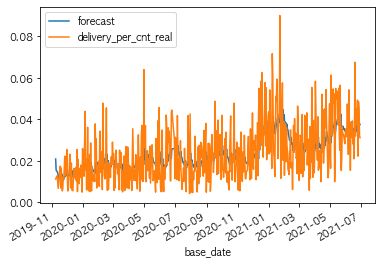

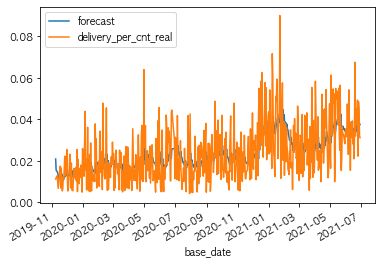

In [49]:
model_fit.plot_predict()

# merge 하기

In [50]:
test_df.reset_index(inplace=True)
test_frgn_ratio.reset_index(inplace=True)

In [56]:
test_df.rename(columns={'index':'base_date'},inplace=True)
test_frgn_ratio.rename(columns={'index':'base_date'},inplace=True)

In [52]:
merge=pd.merge(test_df,test_frgn_ratio,on=['base_date','emd_nm'])

In [68]:
test_youth_ratio.reset_index(inplace=True)
test_market_per_cnt.reset_index(inplace=True)

,base_date,emd_nm,market_per_cnt
0,2021-07-01,건입동,28.271897
1,2021-07-02,건입동,28.187226
2,2021-07-03,건입동,28.358456
3,2021-07-04,건입동,28.346420
4,2021-07-05,건입동,28.253238
...,...,...,...
3355,2021-09-14,한경면,29.283332
3356,2021-09-15,한경면,29.283816
3357,2021-09-16,한경면,29.284300
3358,2021-09-17,한경면,29.284784


In [69]:
test_youth_ratio.rename(columns={'index':'base_date'},inplace=True)
test_market_per_cnt.rename(columns={'index':'base_date'},inplace=True)

In [57]:
test_delivery_per_cnt.reset_index(inplace=True)
test_delivery_per_cnt.rename(columns={'index':'base_date'},inplace=True)

In [71]:
merge=pd.merge(merge,test_youth_ratio,on=['base_date','emd_nm'])
merge=pd.merge(merge,test_market_per_cnt,on=['base_date','emd_nm'])
merge=pd.merge(merge,test_delivery_per_cnt,on=['base_date','emd_nm'])

In [72]:
merge=merge.loc[(merge['base_date']>='2021-07-01')&(merge['base_date']<='2021-08-31')]

In [73]:
merge=merge.sort_values(by=['base_date','emd_nm'])

In [76]:
merge.rename(columns={'visit_ratio_pred':'visit_ratio'},inplace=True)

In [77]:
merge.to_csv("arimatest_bolim.csv")